In [2]:
import tables
import matplotlib.pyplot as plt
import numpy as np
import h5py

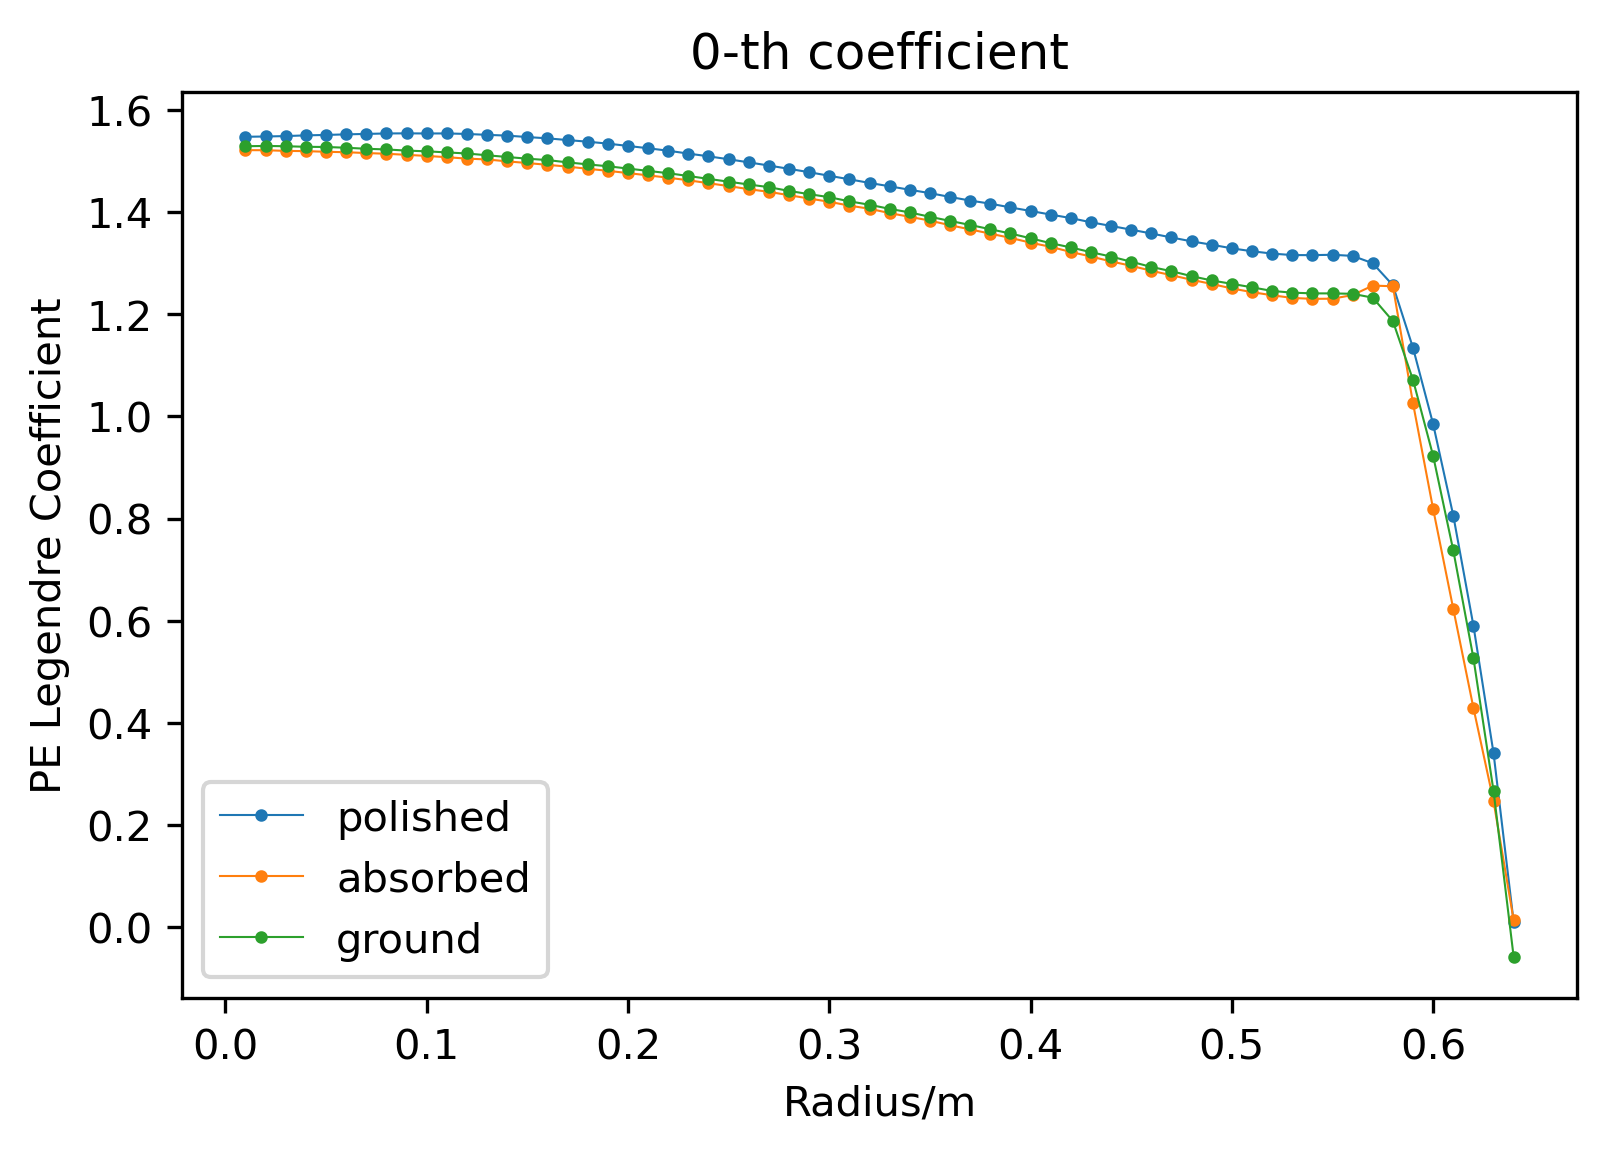

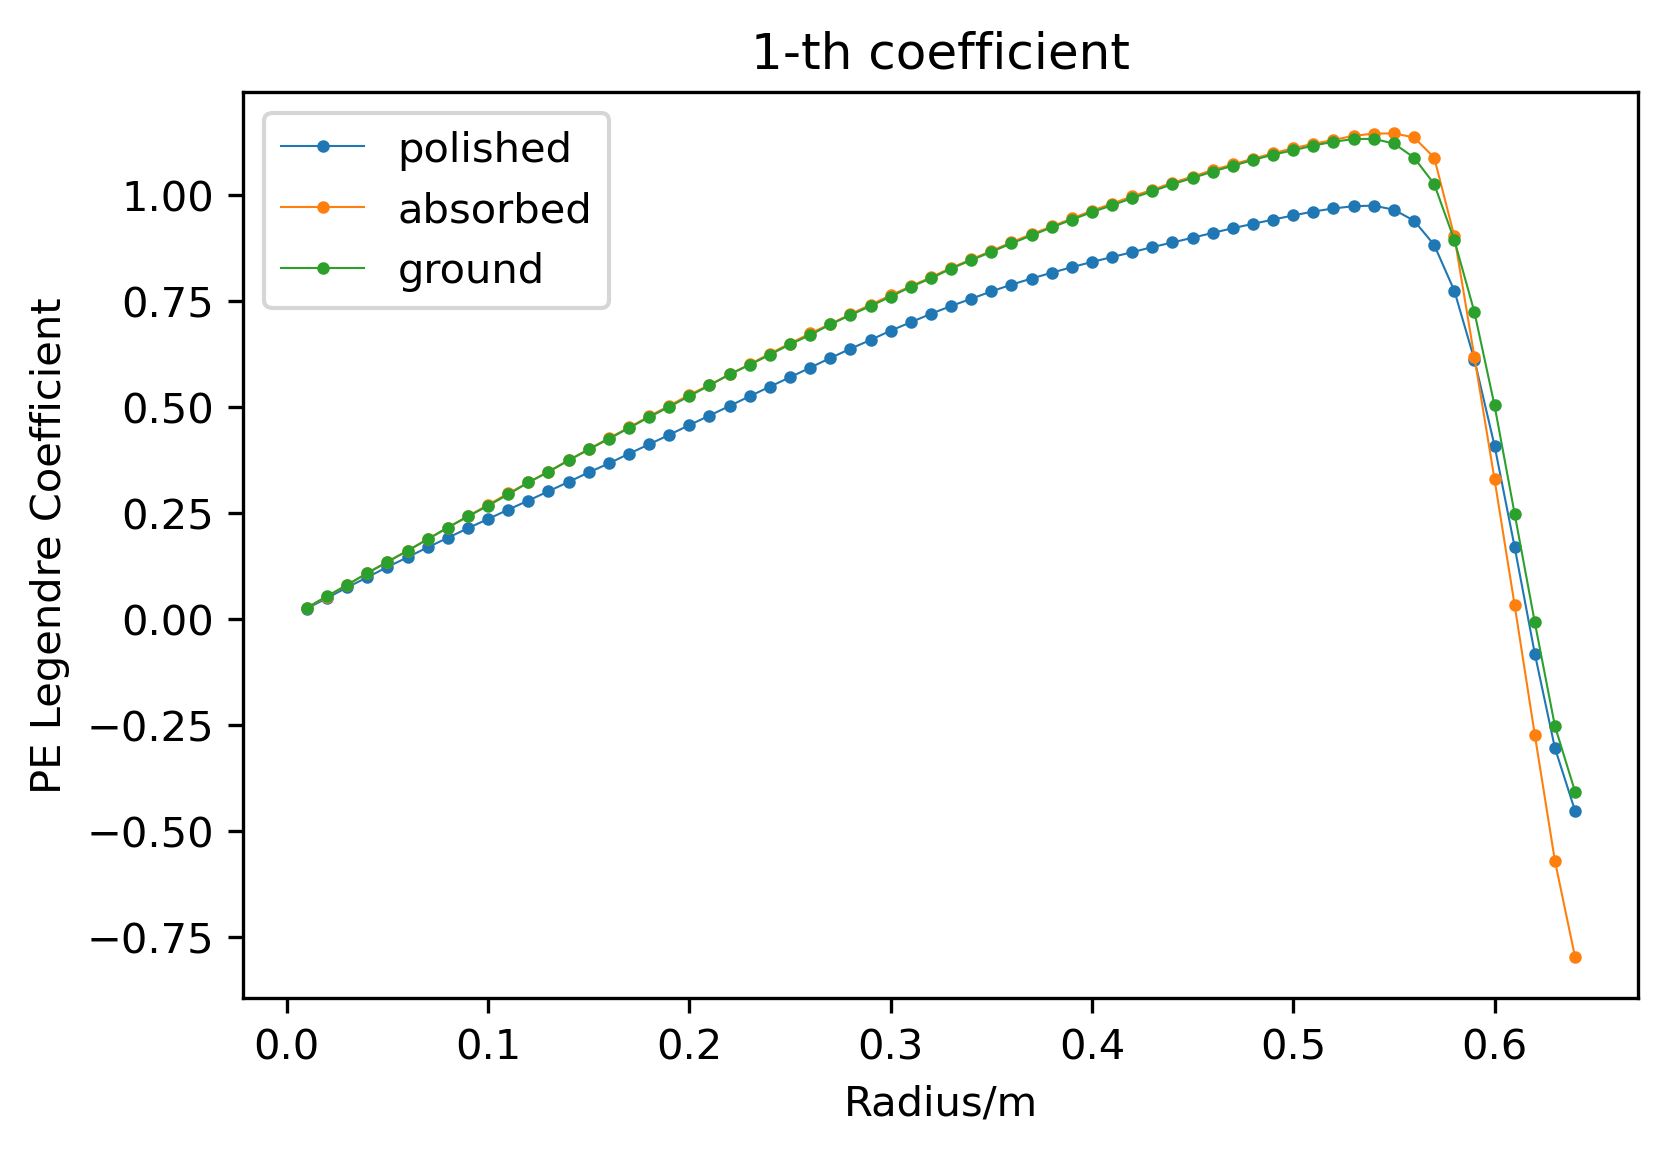

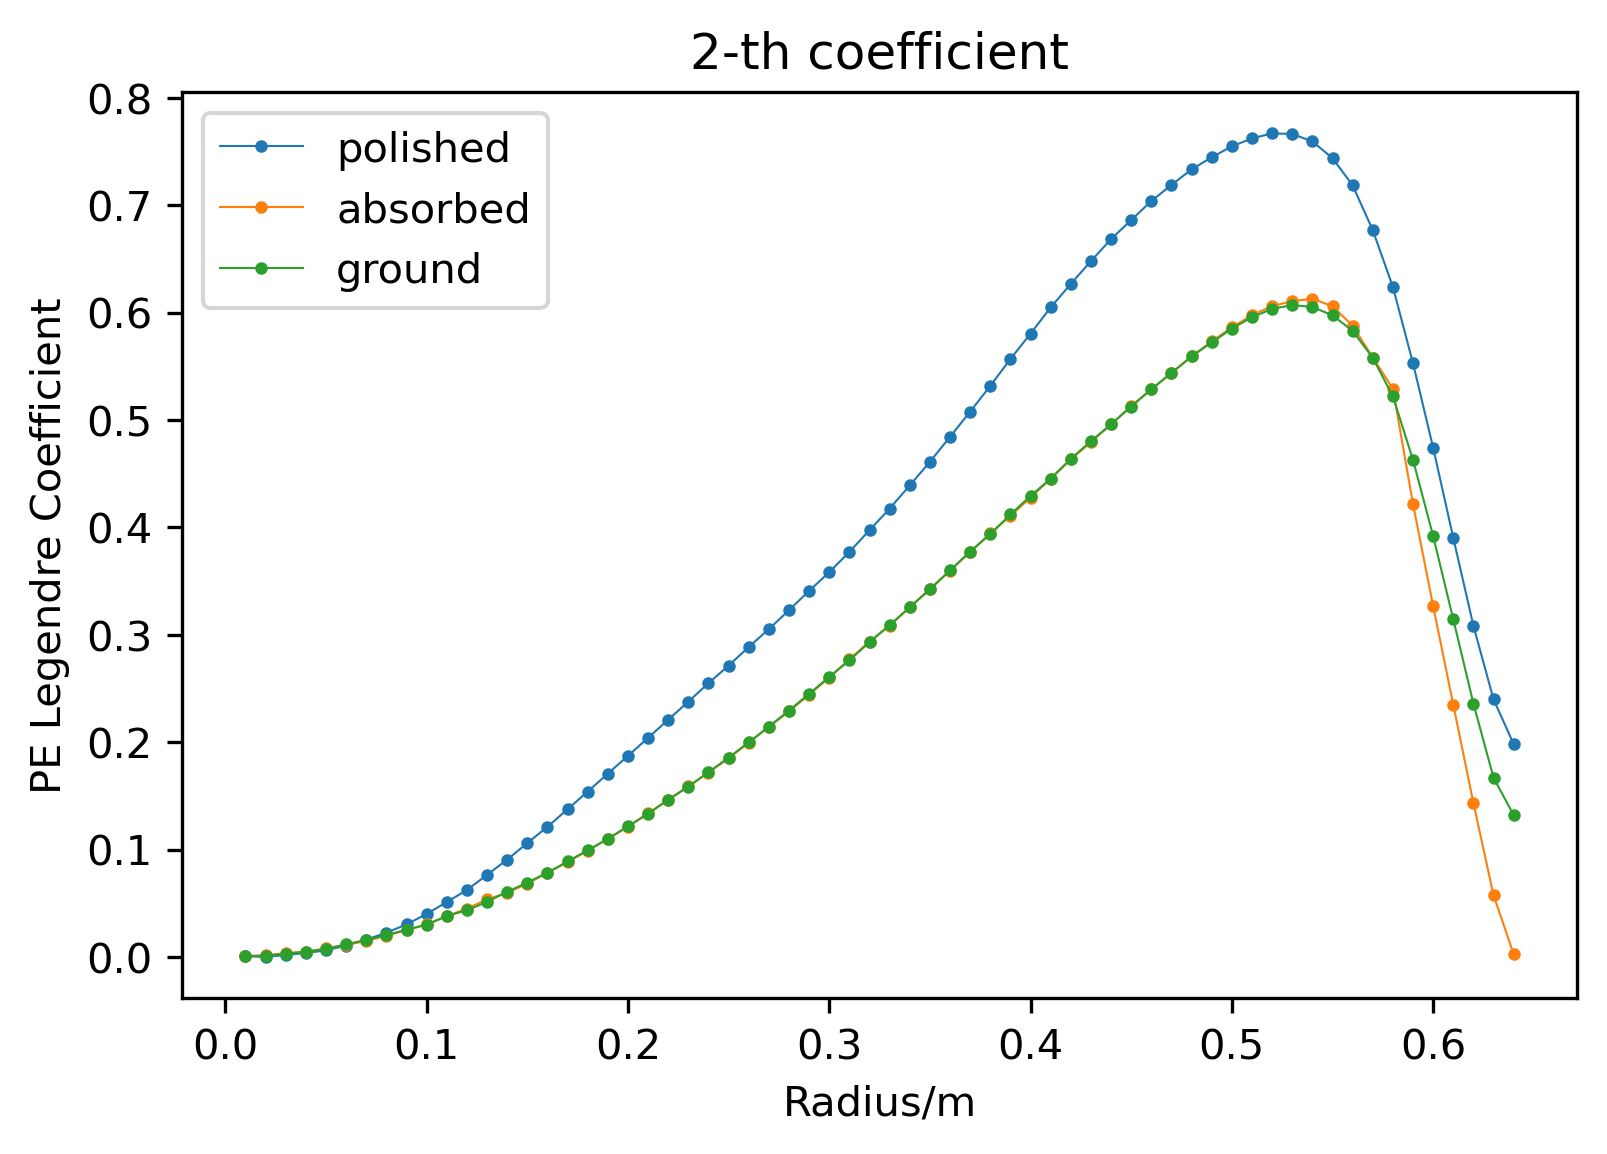

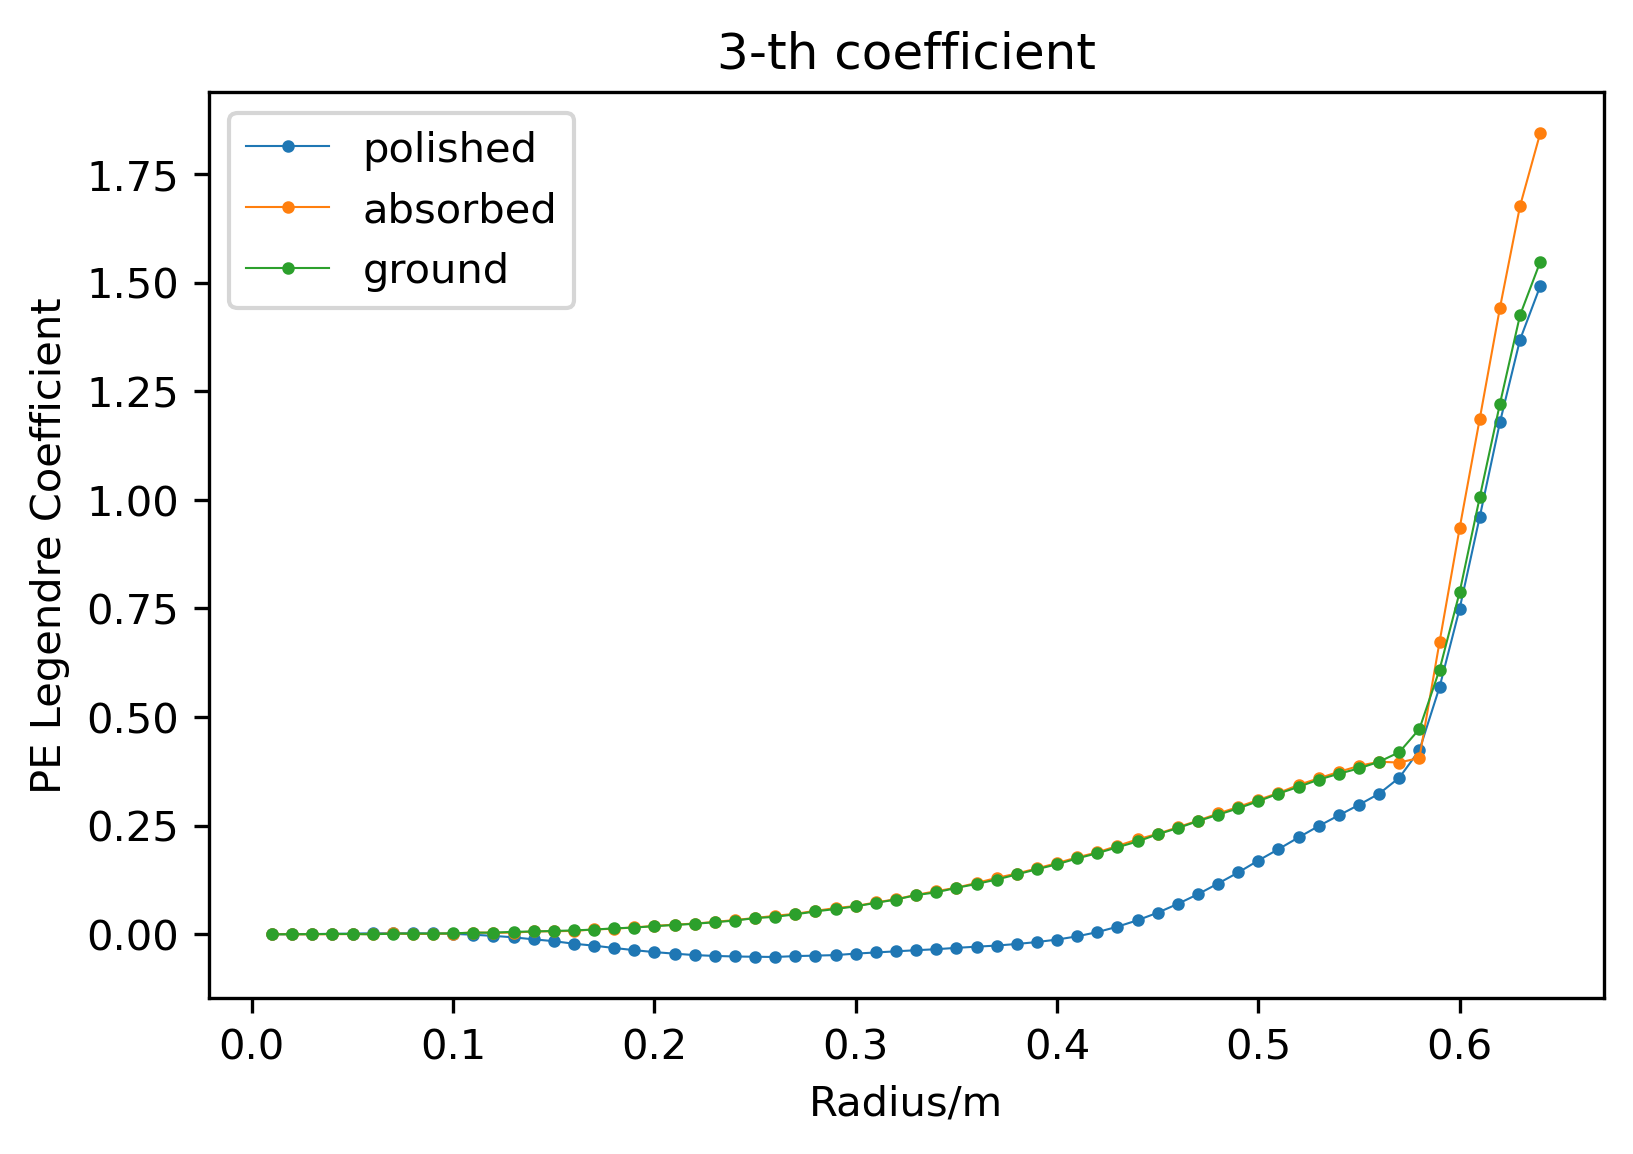

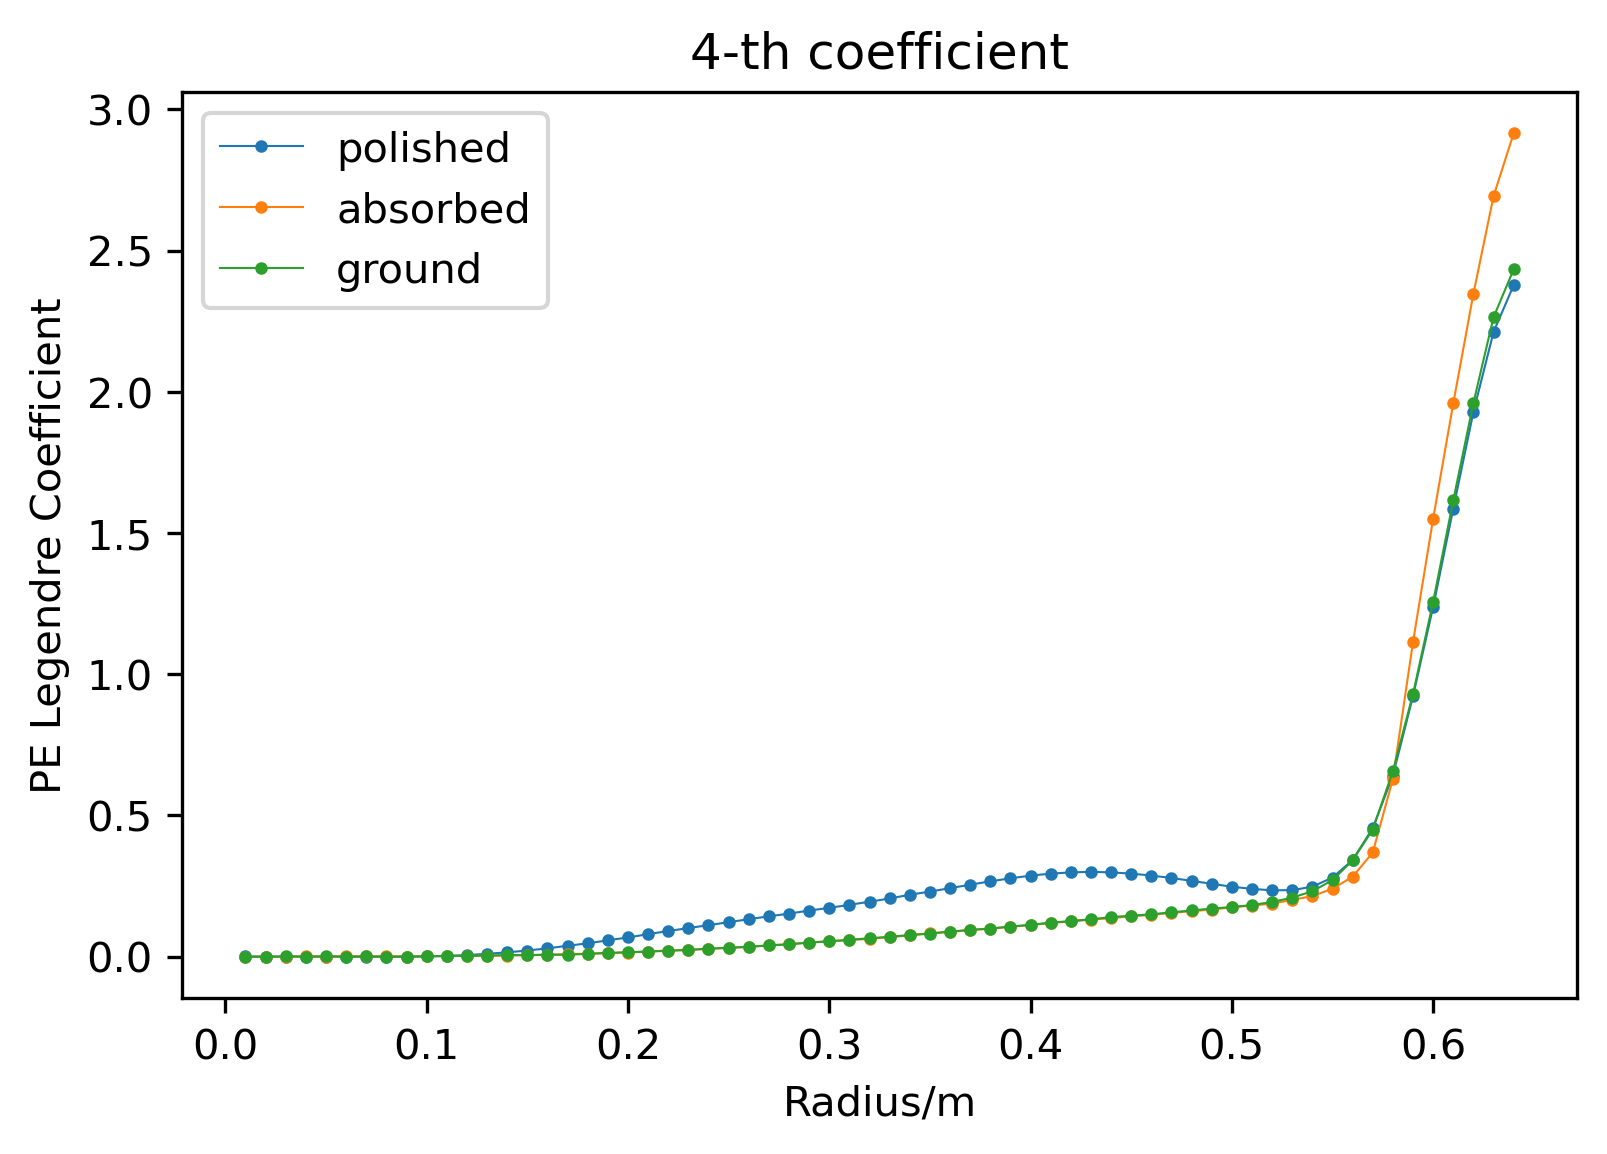

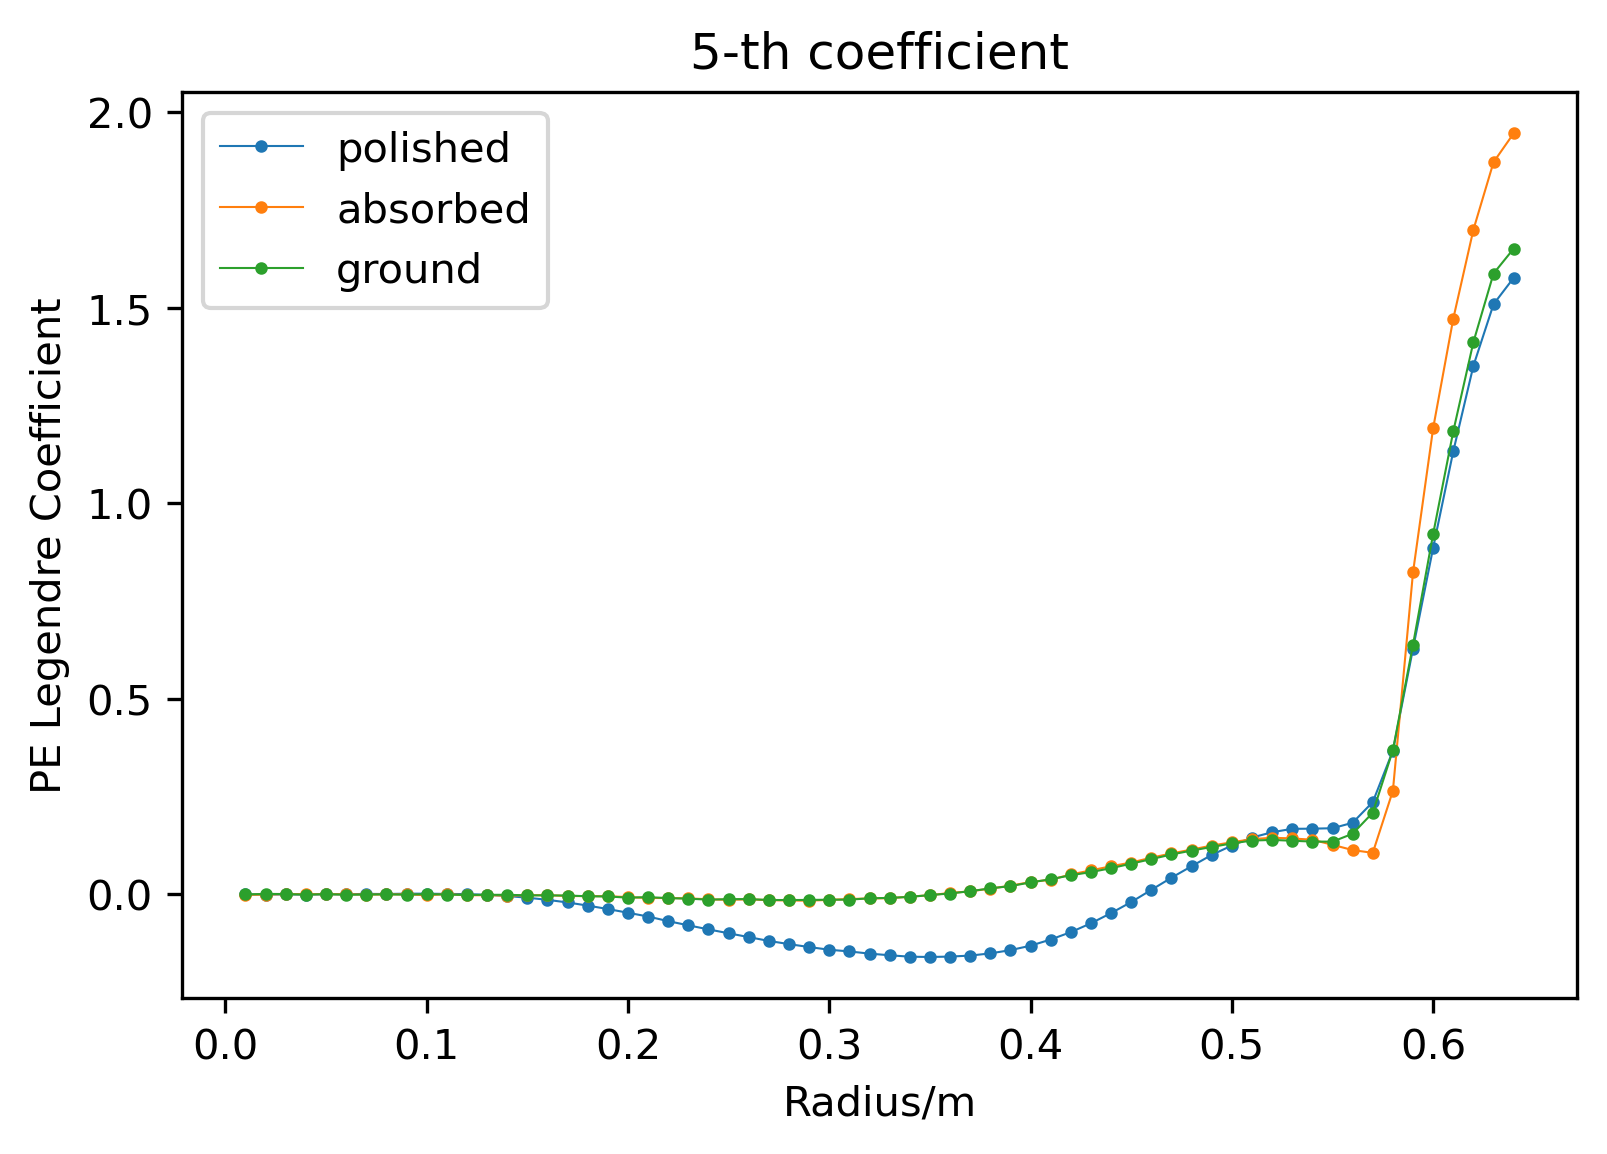

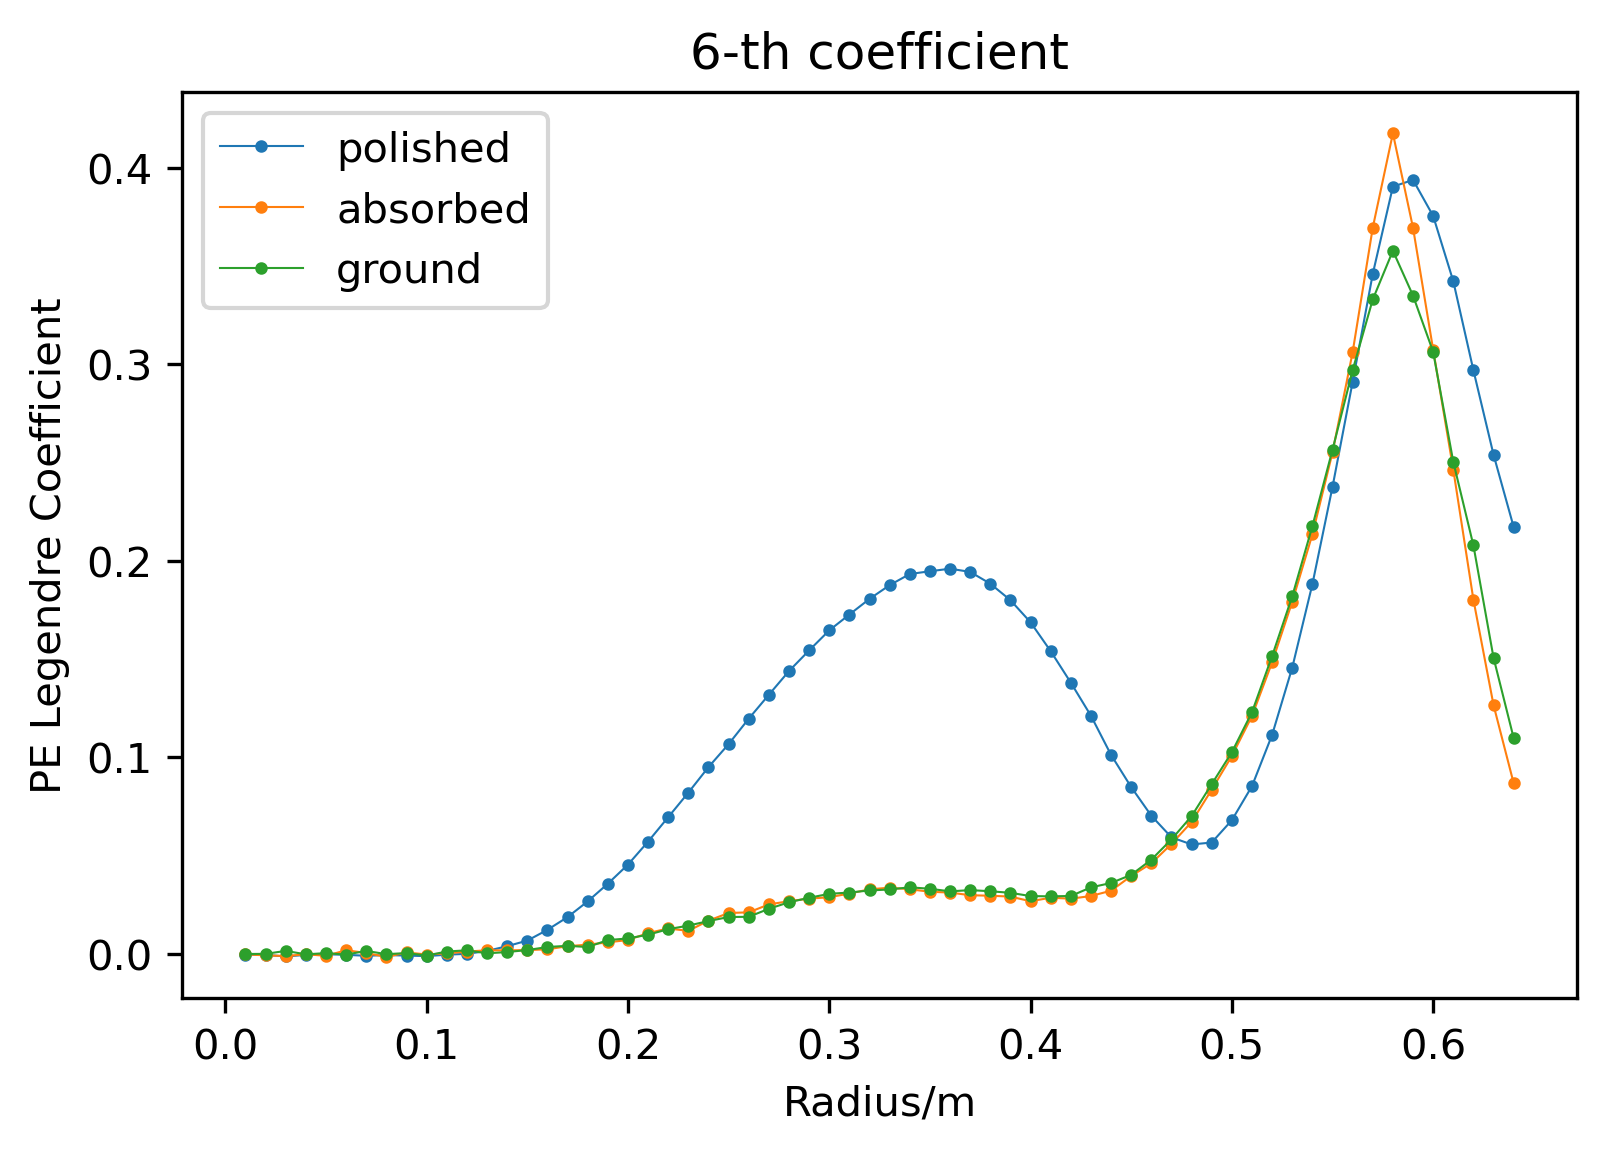

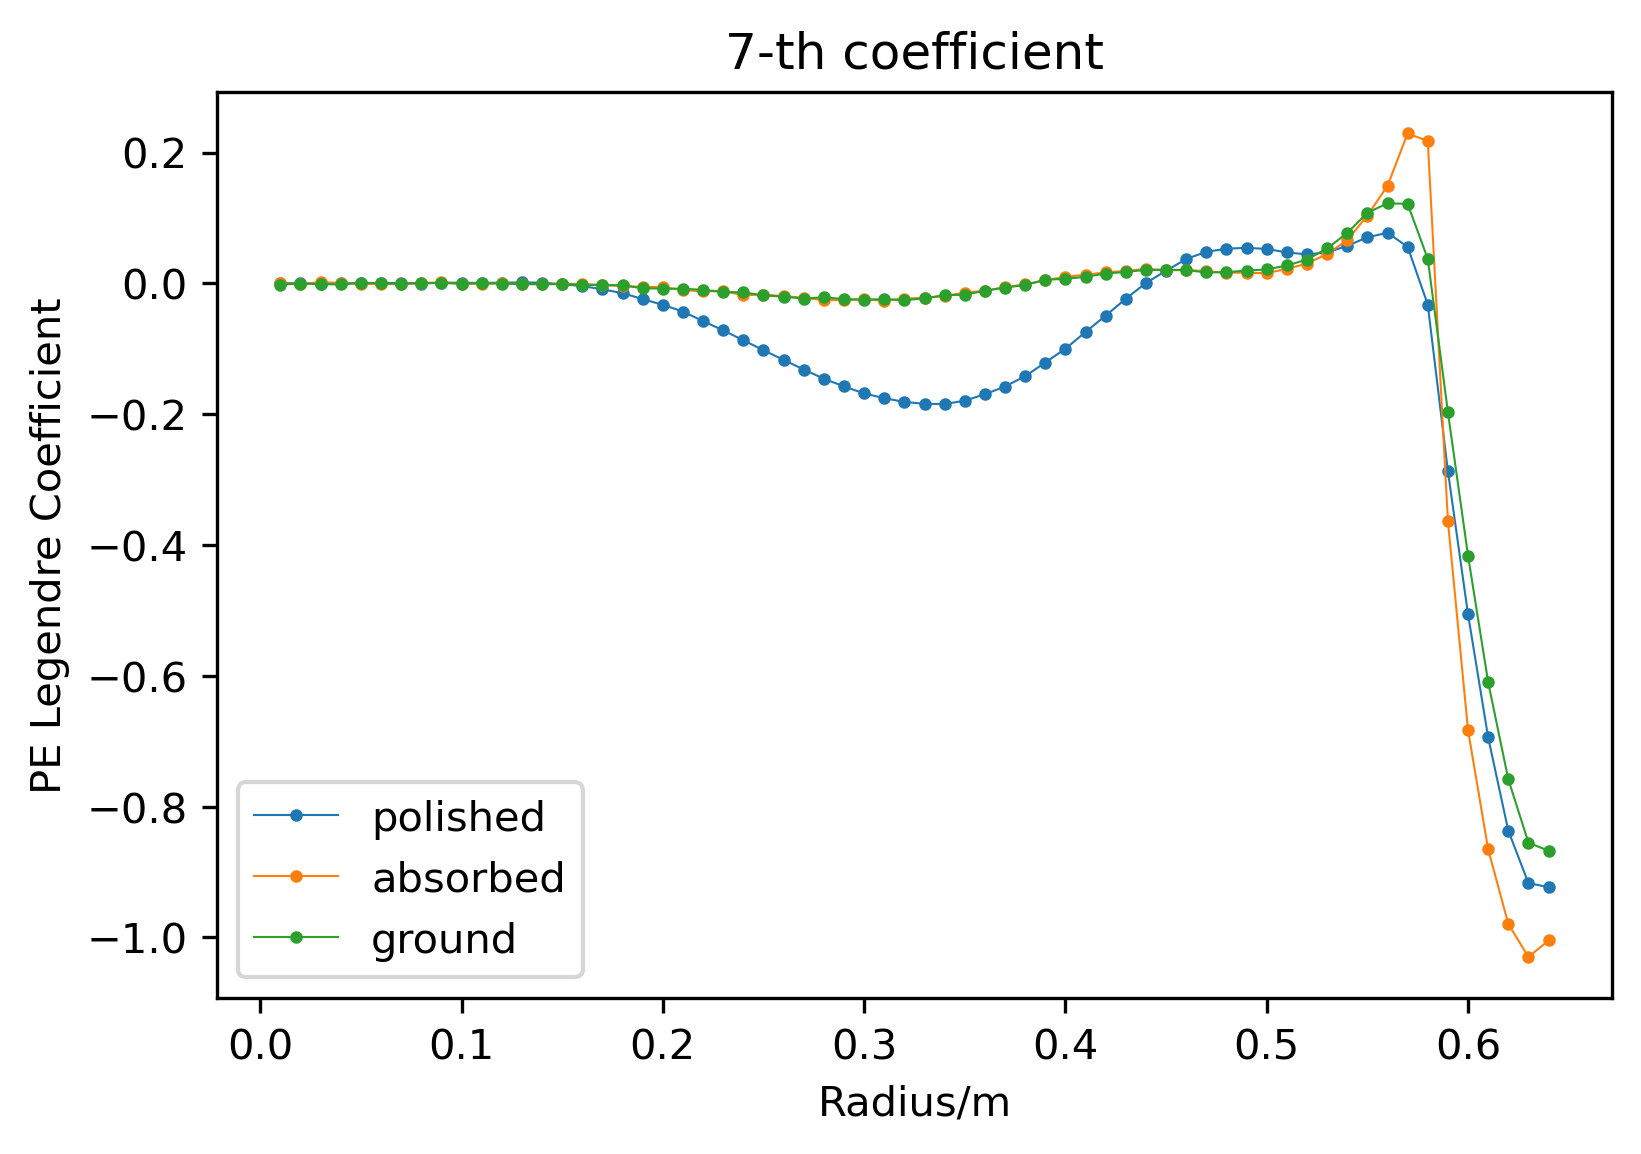

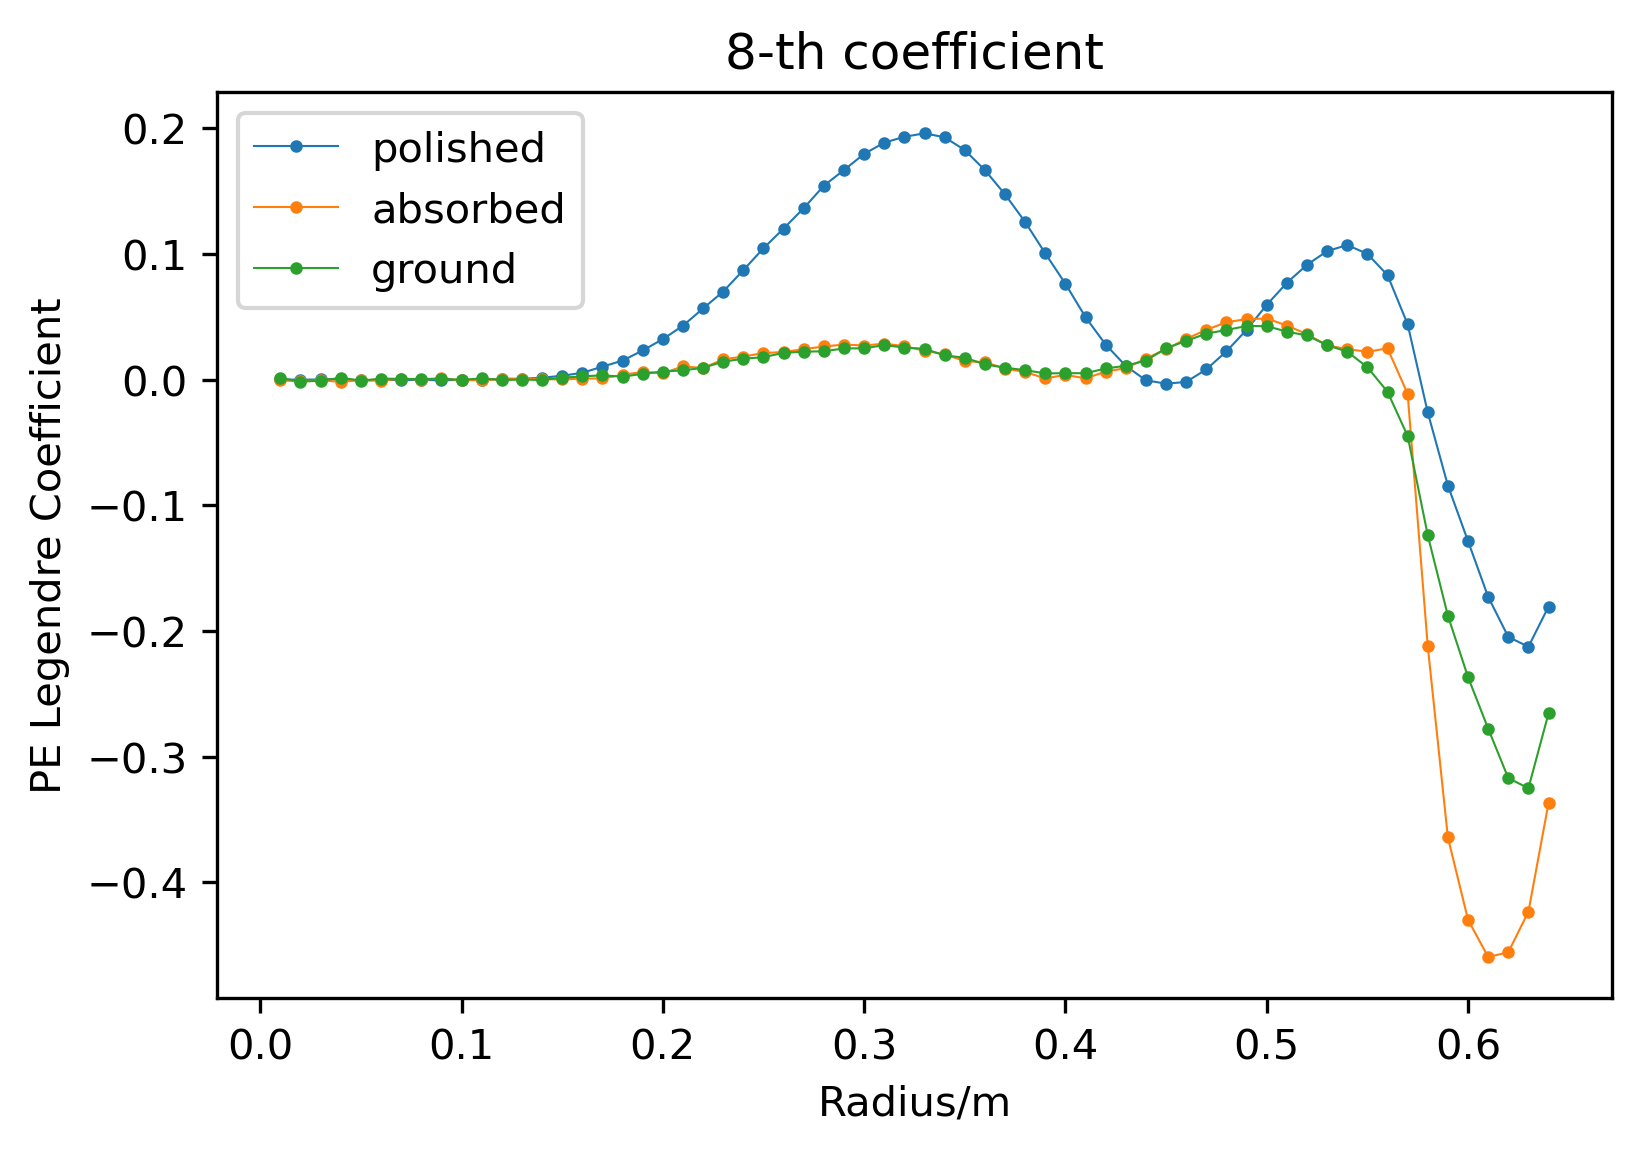

In [82]:
def LoadDataPE_TW(path, radius, order):
    data = []
    error = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    std = 'std' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    error = eval('np.array(h.root.'+ std + '[:])')
    h.close()
    return data, error

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    error_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff, error= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff))
        error_pe = np.hstack((error_pe, error))
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    error_pe = np.reshape(error_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe, error

order = 10
rd1, coeff_pe1, error_pe1 = main_photon('coeff_pe_1t_8.0MeV_shell/',order)
rd2, coeff_pe2, error_pe2 = main_photon('coeff_pe_1t_reflection0.00_30/',order)
rd3, coeff_pe3, error_pe3 = main_photon('coeff_pe_1t_reflection0.05_8MeV_30/',order)
for i in np.arange(order-1):
    if(i==0):
        plt.figure(num=i+1, dpi=300)
        plt.plot(rd1, coeff_pe1[i] - np.log(4) - np.log(20000/4285),'-o',linewidth=0.5, markersize=2, label='polished')
        plt.plot(rd2, coeff_pe2[i] - np.log(20000/4285),'-o',linewidth=0.5, markersize=2, label='absorbed')
        plt.plot(rd3, coeff_pe3[i] - np.log(4) - np.log(20000/4285),'-o',linewidth=0.5, markersize=2, label='ground')
        #plt.errorbar(rd1, coeff_pe1[i] - np.log(4) - np.log(20000/4285),yerr=error_pe1[i],linewidth=0.5, markersize=2, label='polished')
        #plt.errorbar(rd2, coeff_pe2[i] - np.log(20000/4285),yerr=error_pe2[i],linewidth=0.5, markersize=2, label='absorbed')
        #plt.errorbar(rd3, coeff_pe3[i],yerr=error_pe3[i],linewidth=0.5, markersize=2, label='ground')
    else:
        plt.figure(num=i+1, dpi=300)
        plt.plot(rd1, coeff_pe1[i],'-o',linewidth=0.5, markersize=2, label='polished')
        plt.plot(rd2, coeff_pe2[i],'-o',linewidth=0.5, markersize=2, label='absorbed')
        plt.plot(rd3, coeff_pe3[i],'-o',linewidth=0.5, markersize=2, label='ground')
        #plt.errorbar(rd1, coeff_pe1[i],yerr=error_pe1[i],linewidth=0.5, markersize=2, label='polished')
        #plt.errorbar(rd2, coeff_pe2[i],yerr=error_pe2[i],linewidth=0.5, markersize=2, label='absorbed')
        #plt.errorbar(rd3, coeff_pe3[i],yerr=error_pe3[i],linewidth=0.5, markersize=2, label='ground')

    plt.legend()
    plt.xlabel('Radius/m')
    plt.ylabel('PE Legendre Coefficient')
    plt.title('%d-th coefficient' % i)
    plt.savefig('Coeff%d.png' % i)
    plt.show()

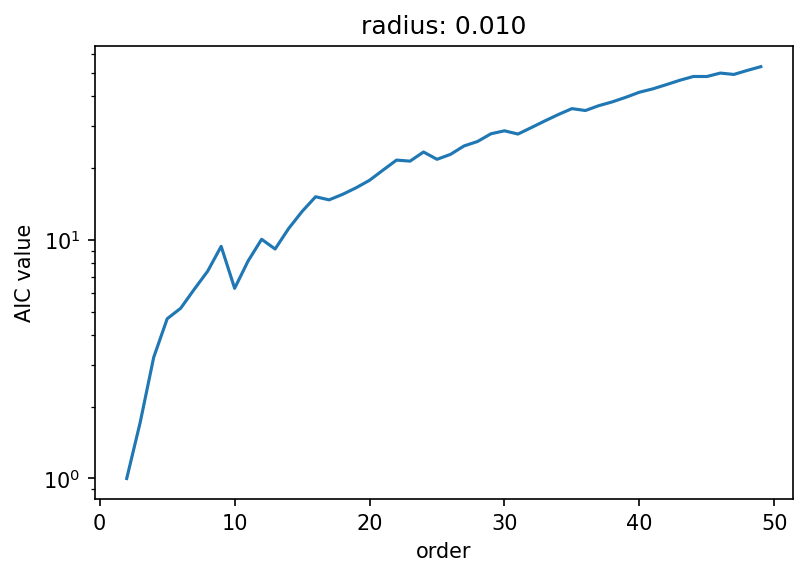

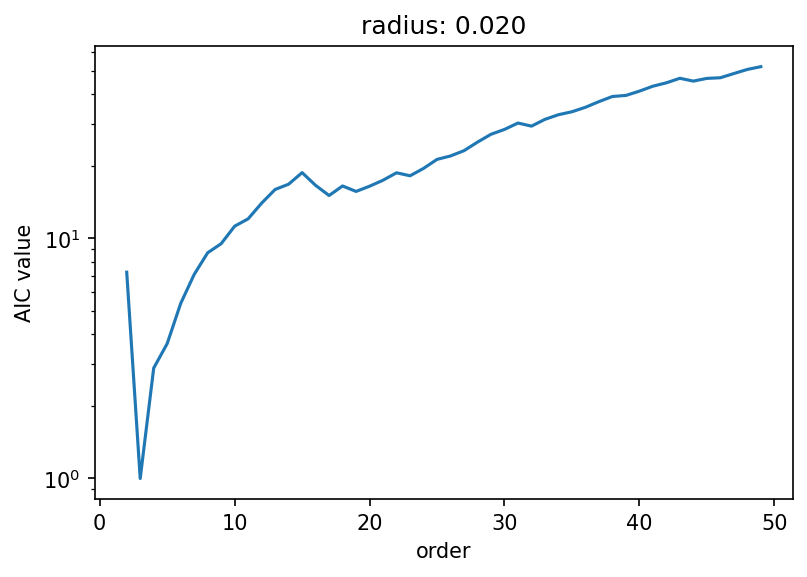

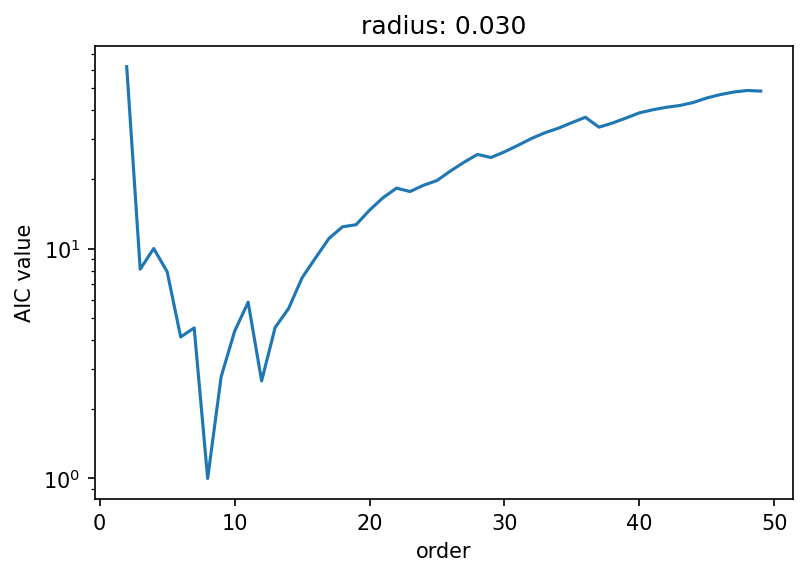

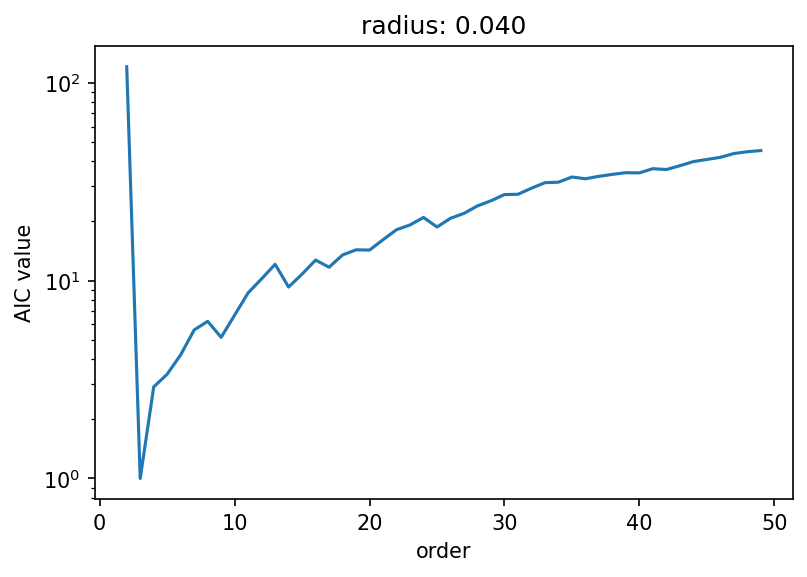

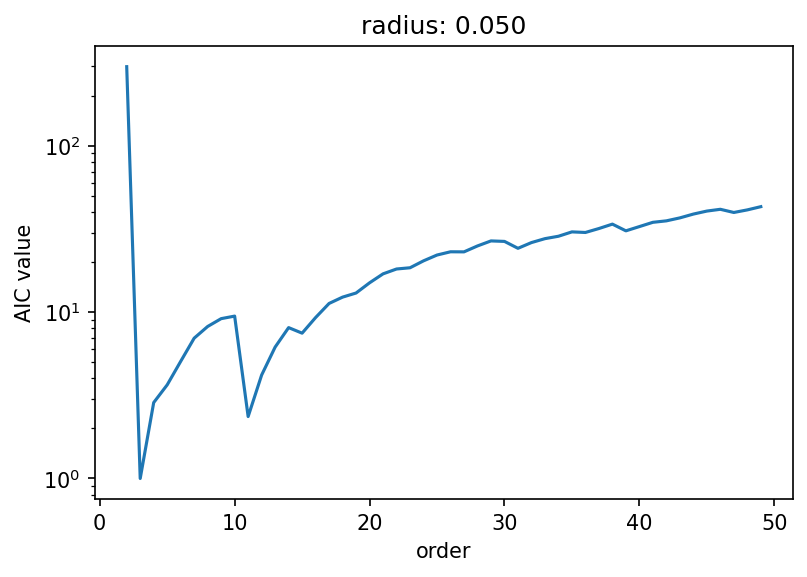

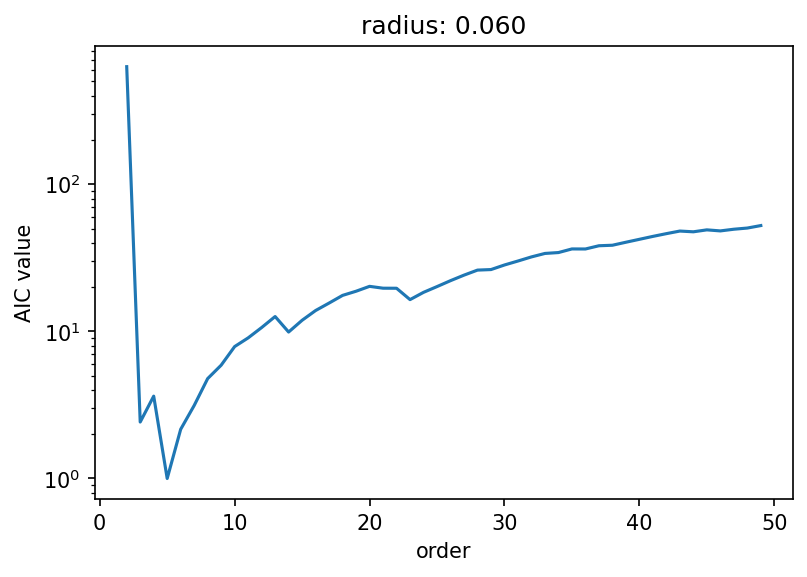

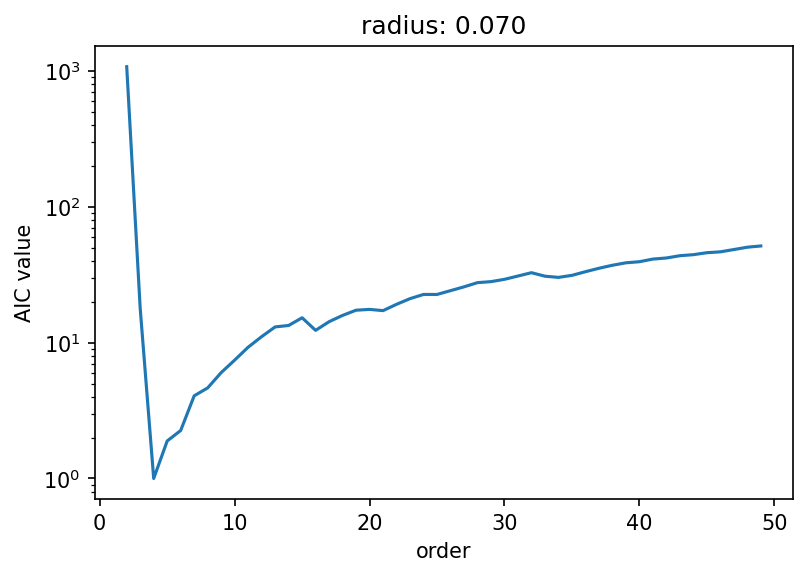

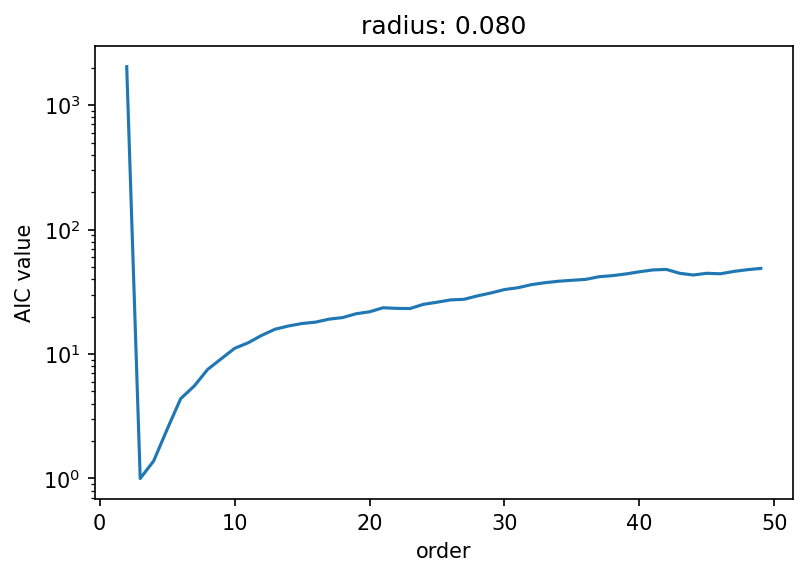

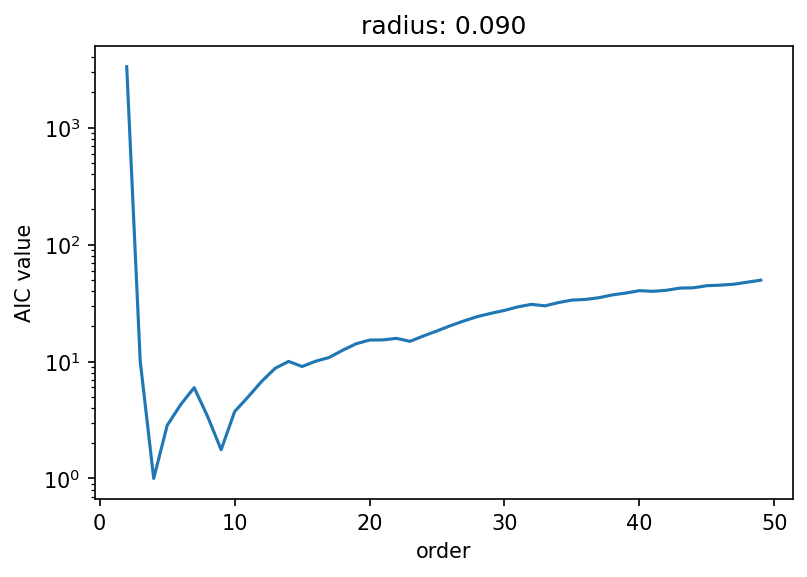

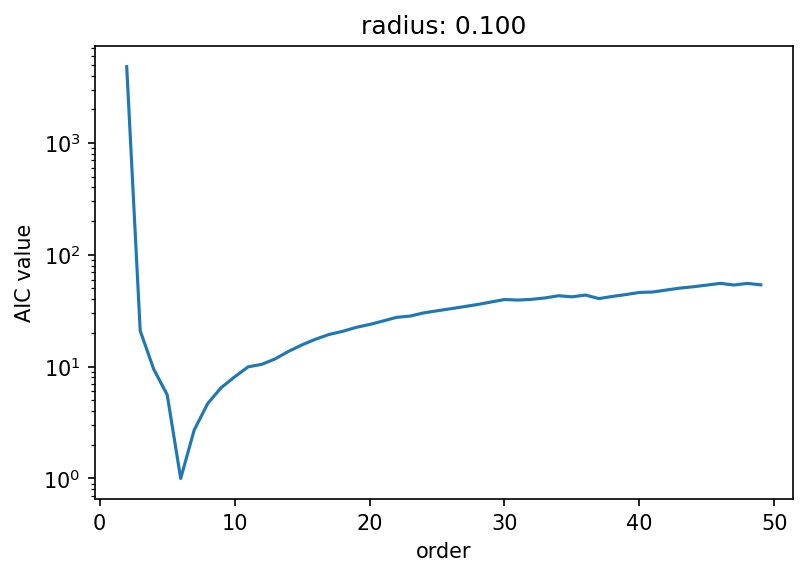

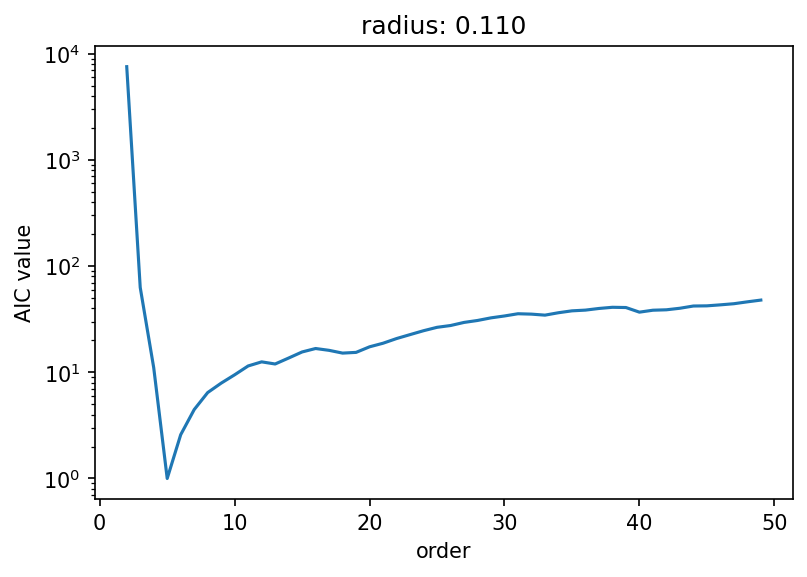

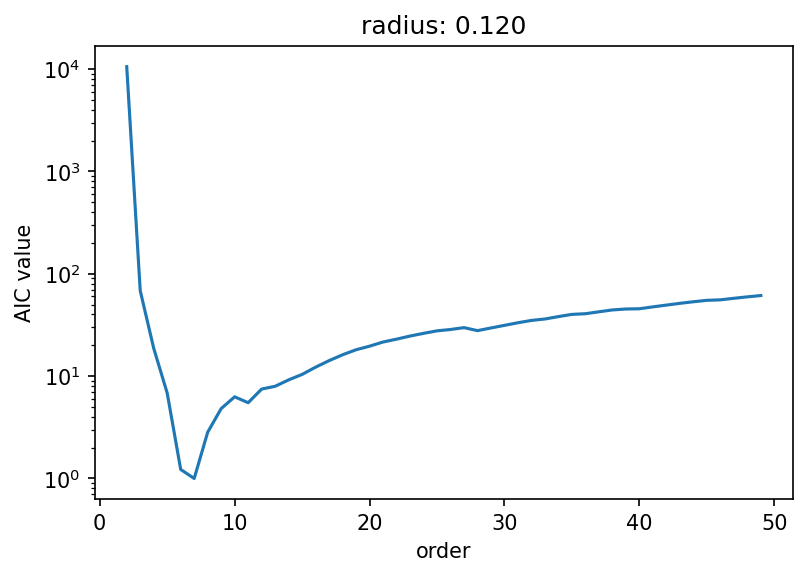

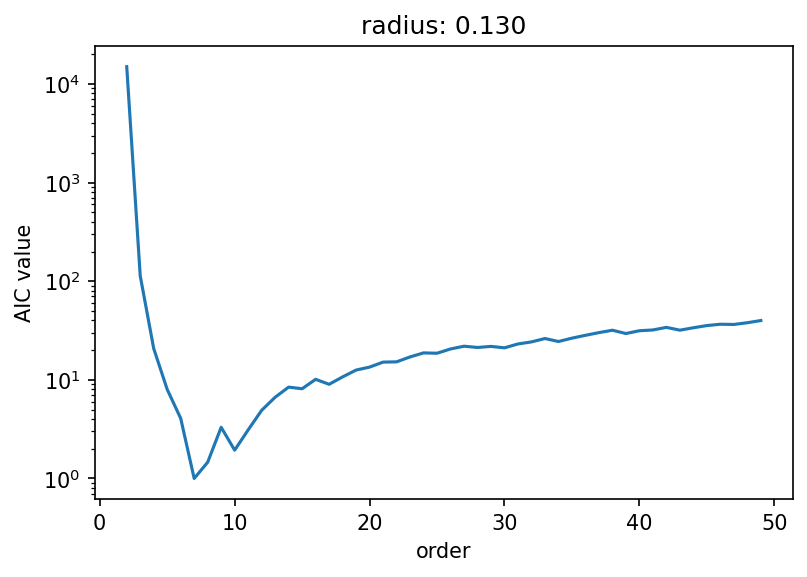

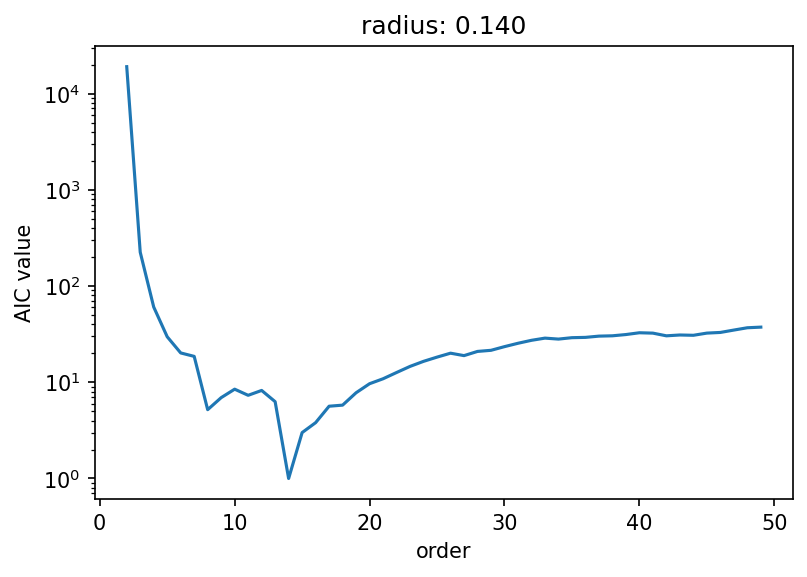

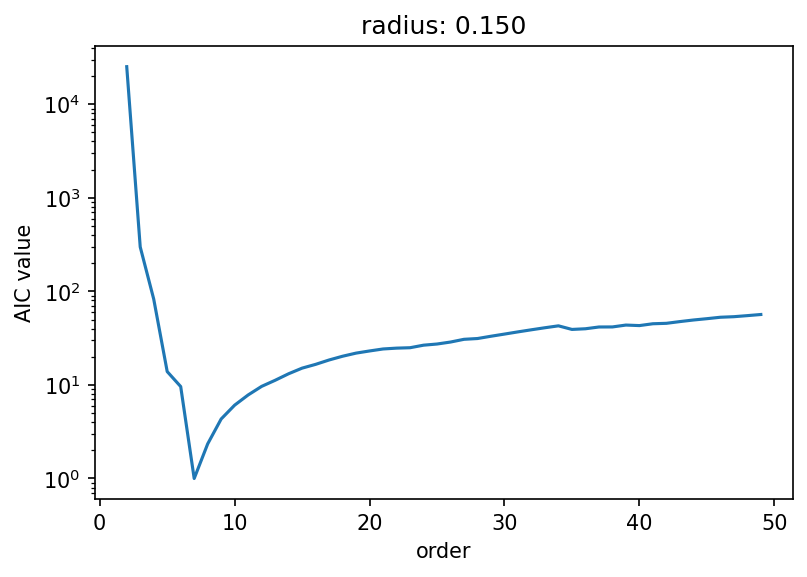

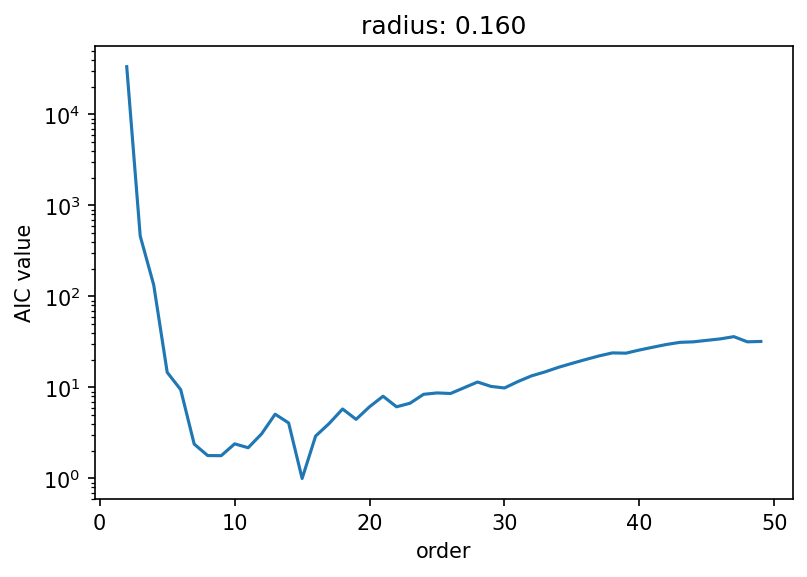

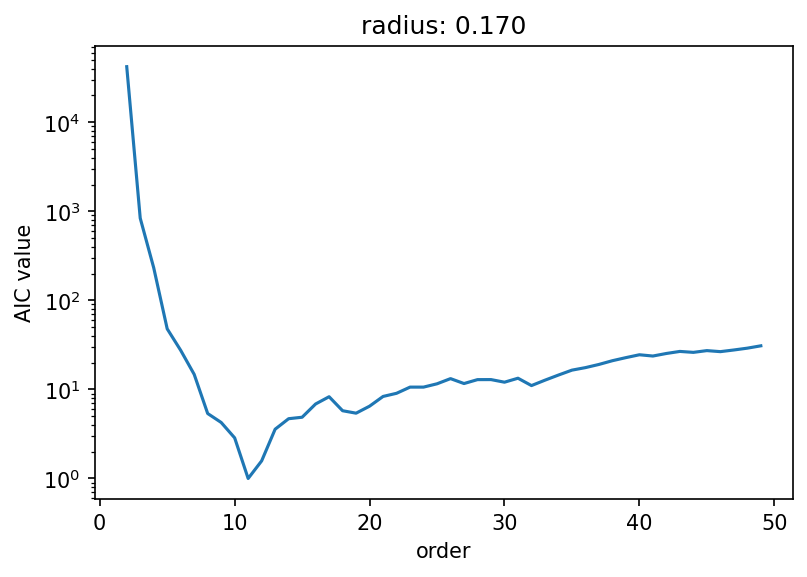

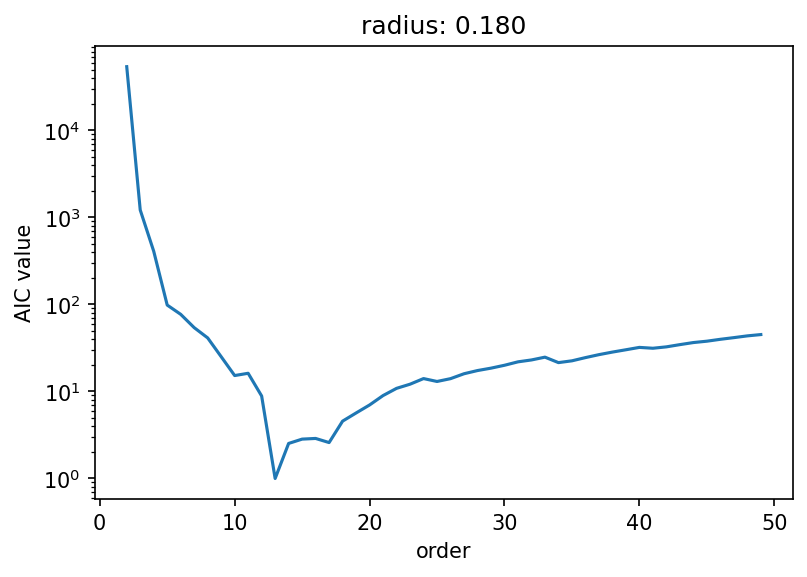

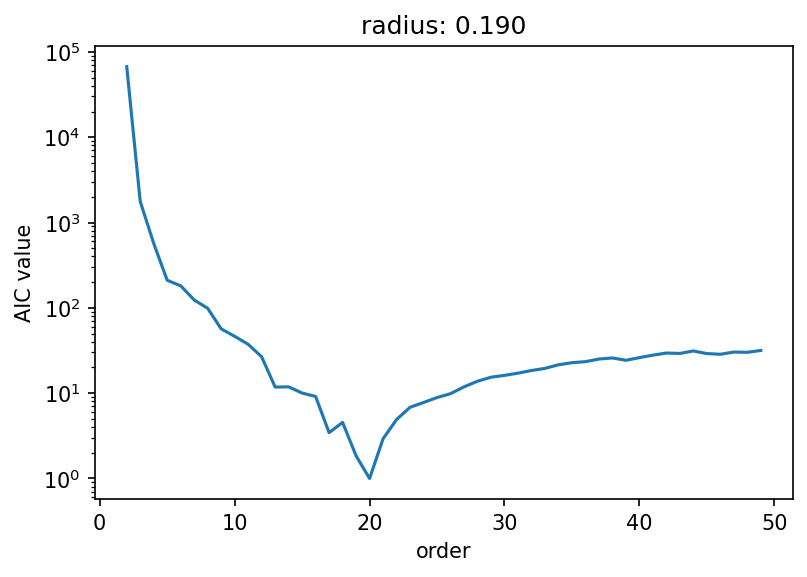

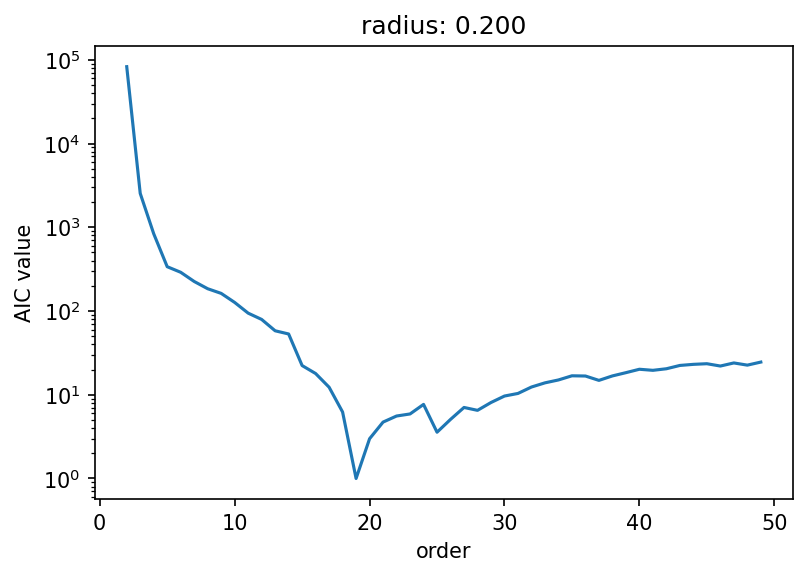

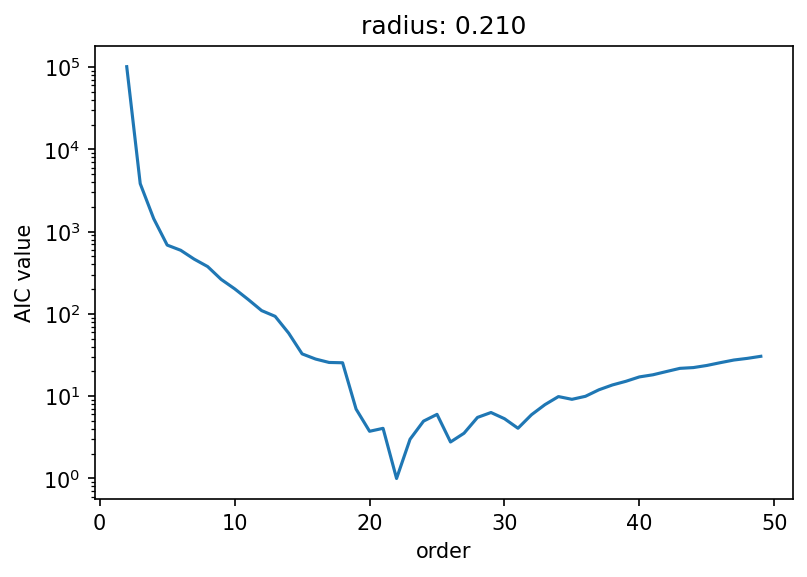

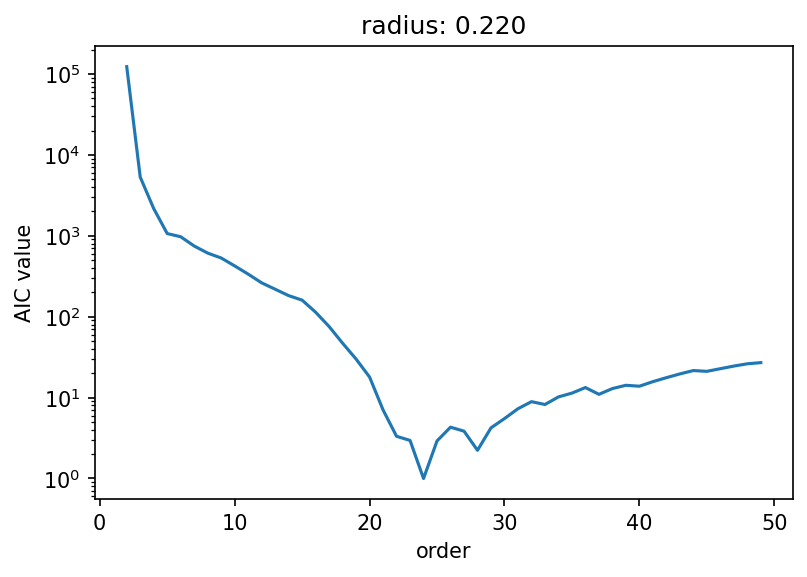

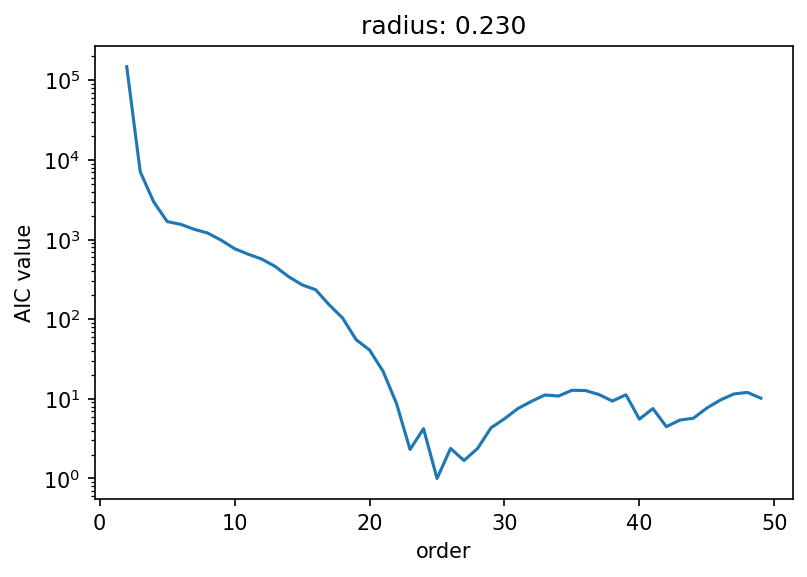

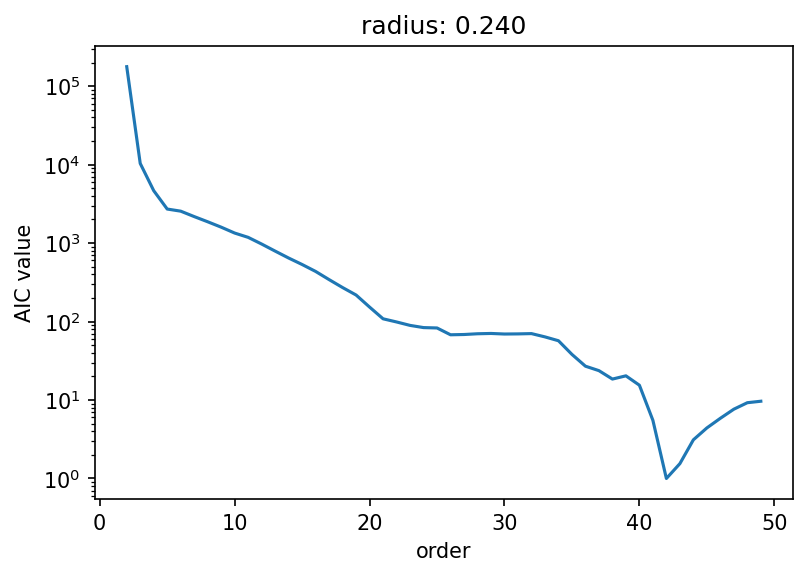

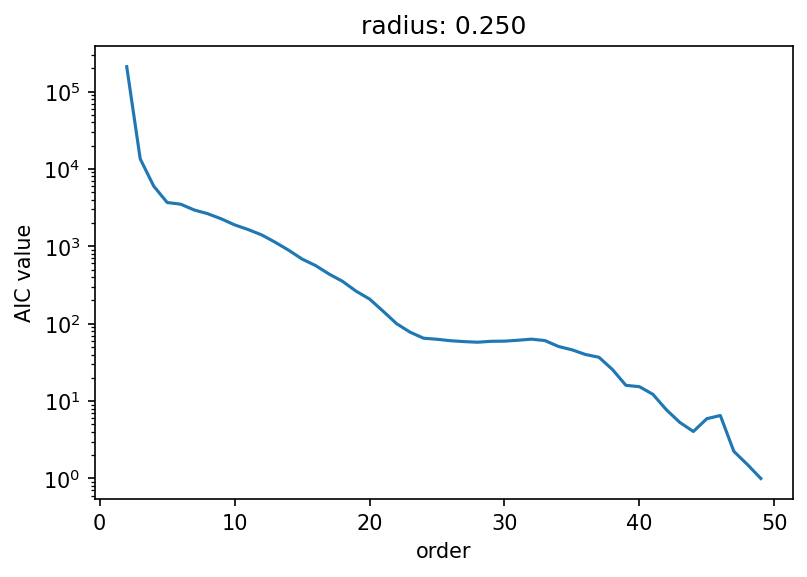

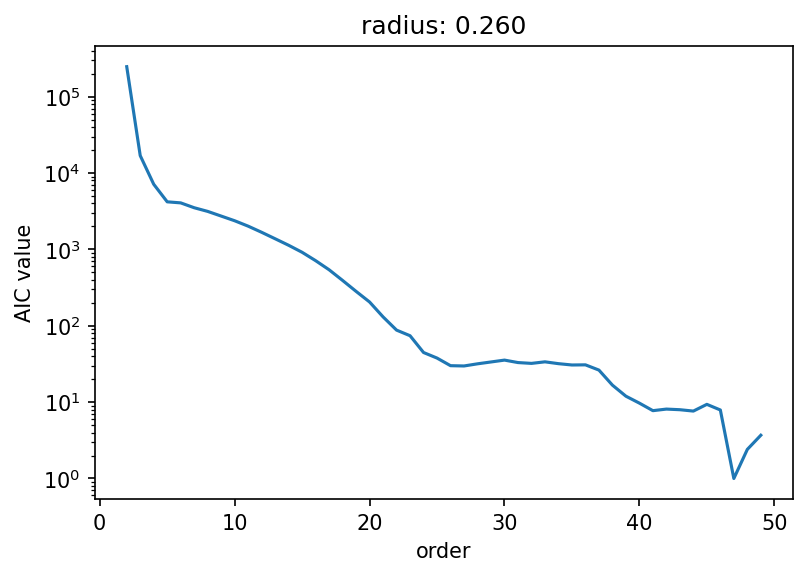

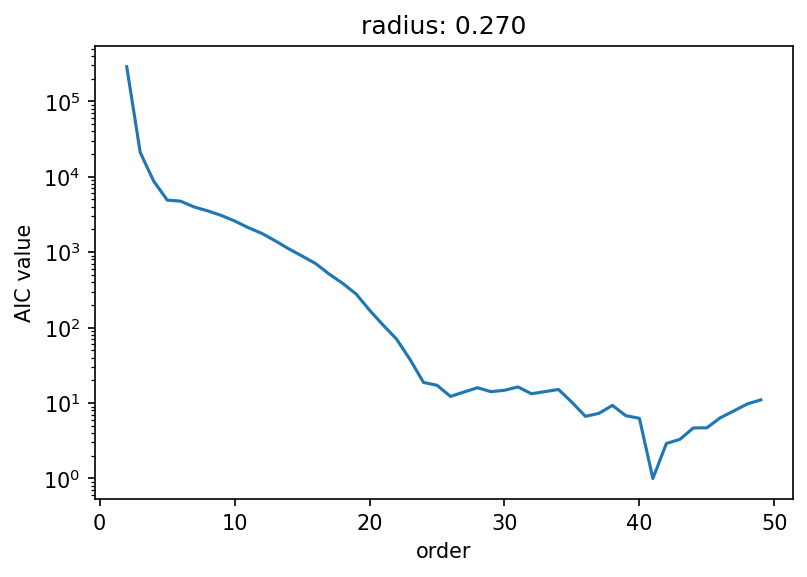

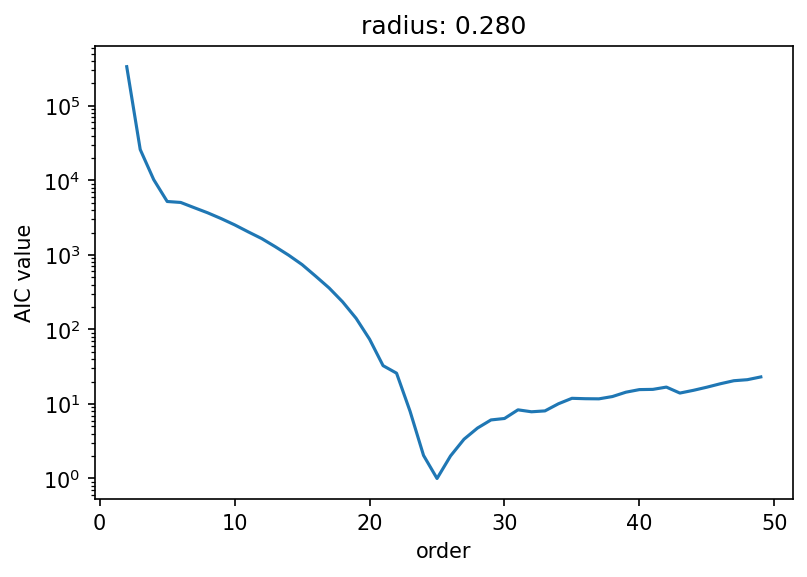

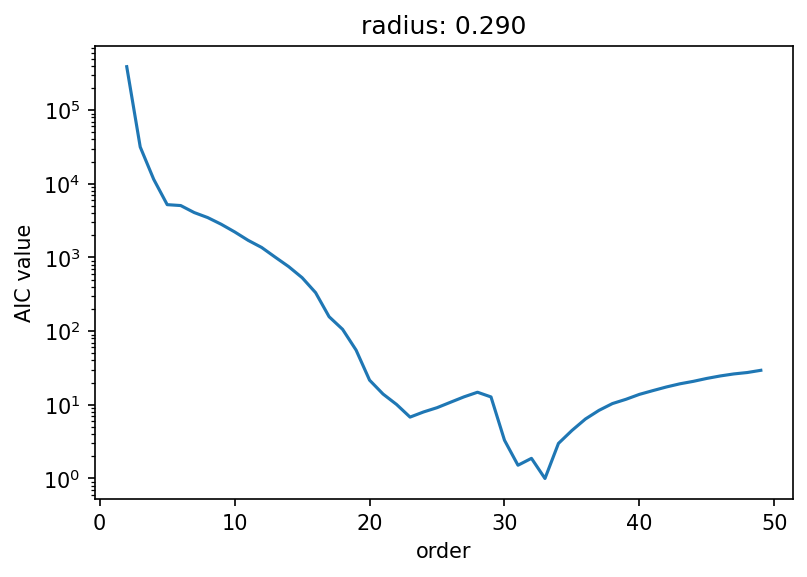

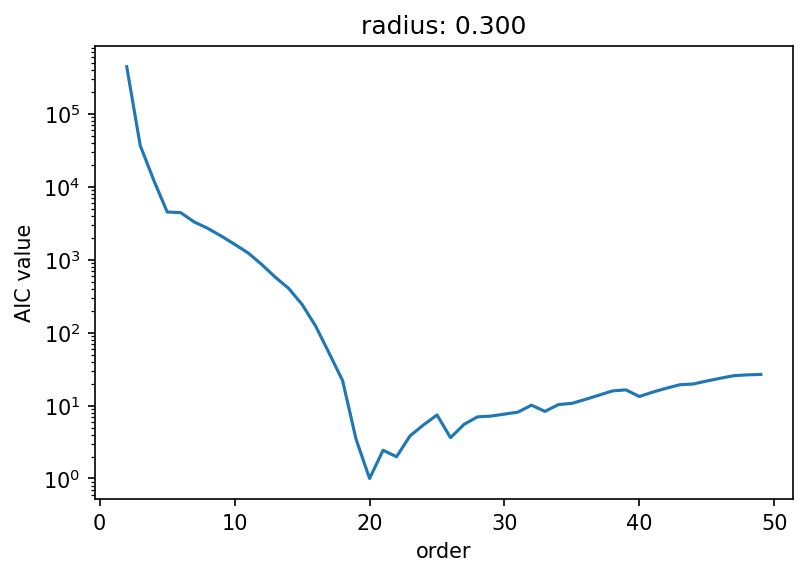

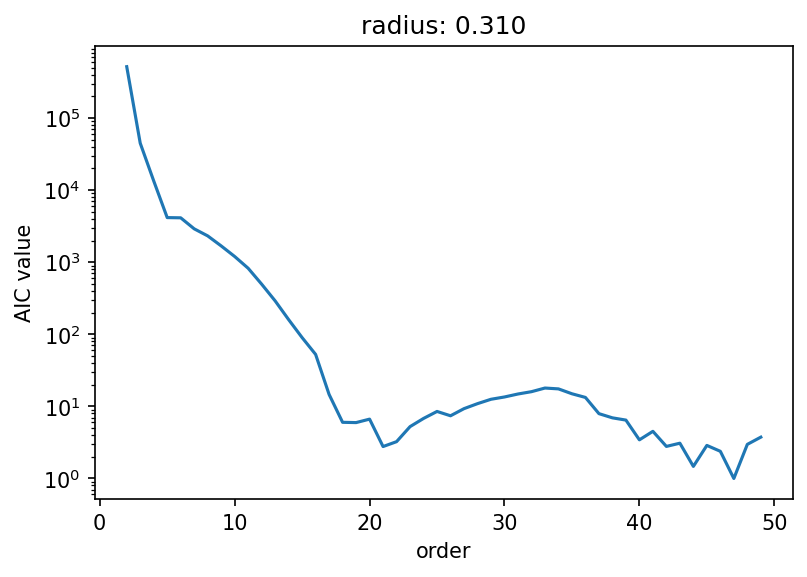

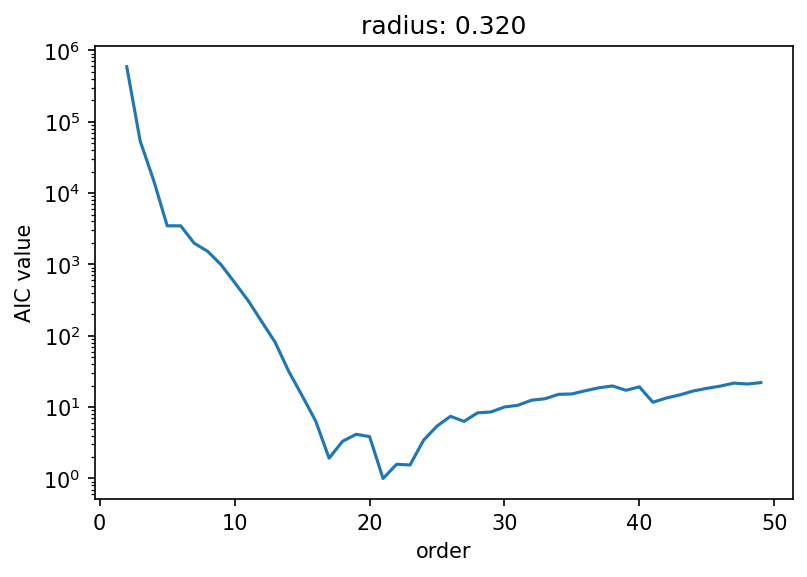

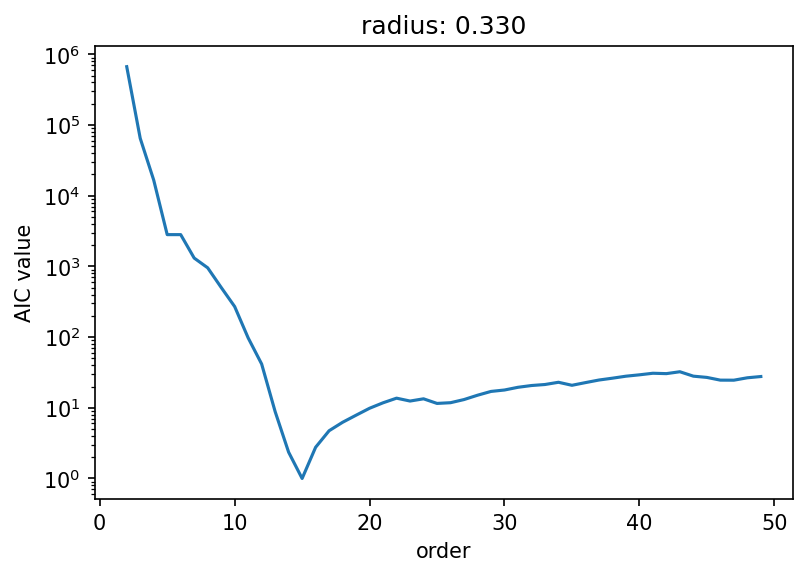

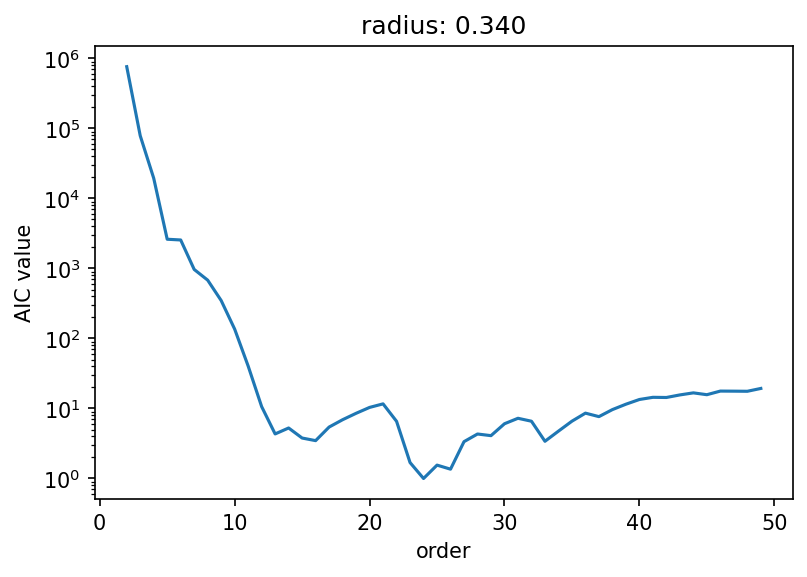

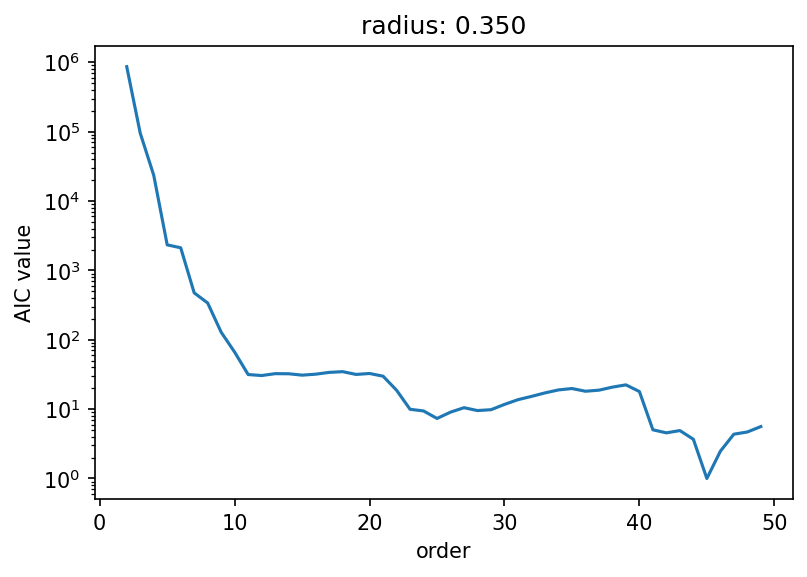

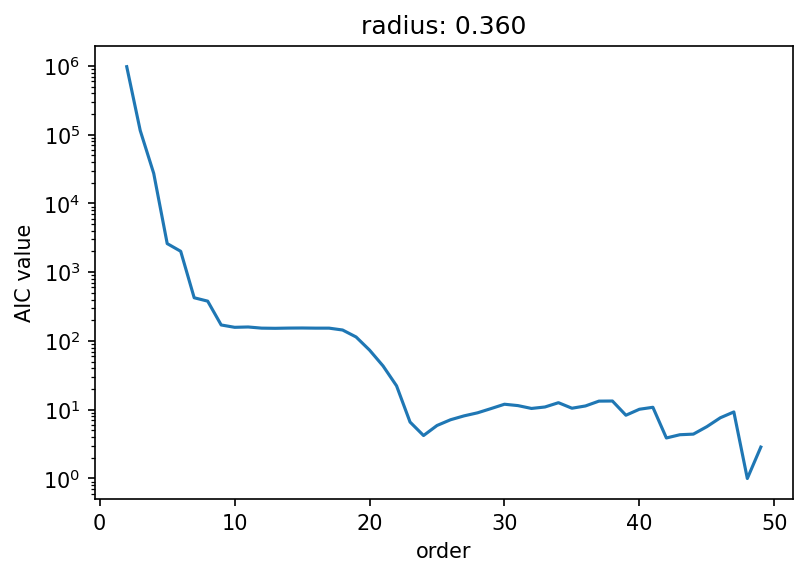

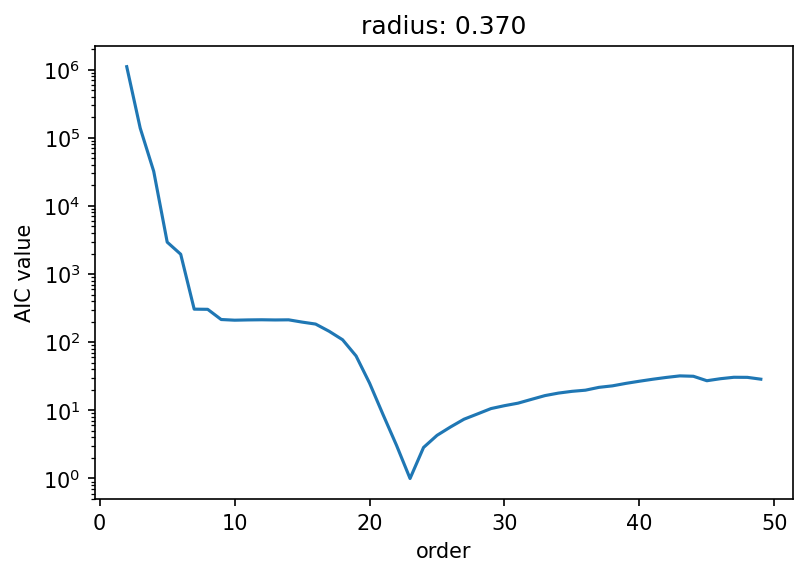

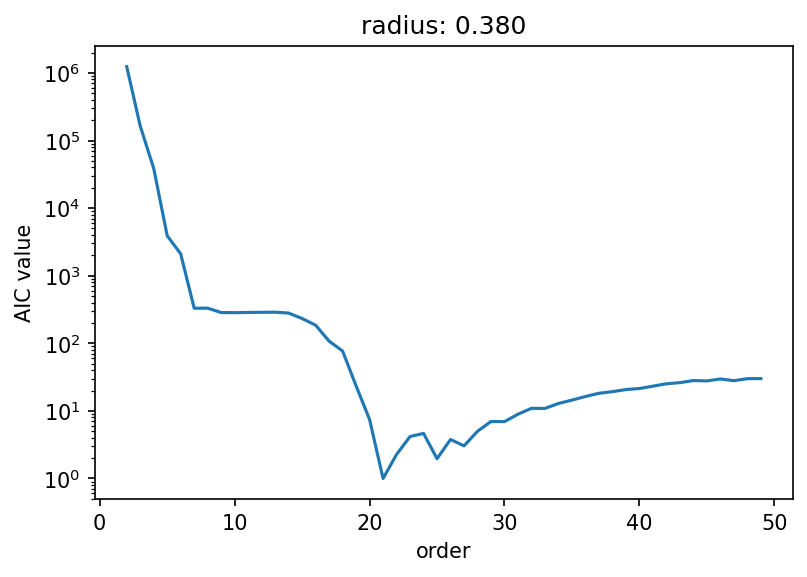

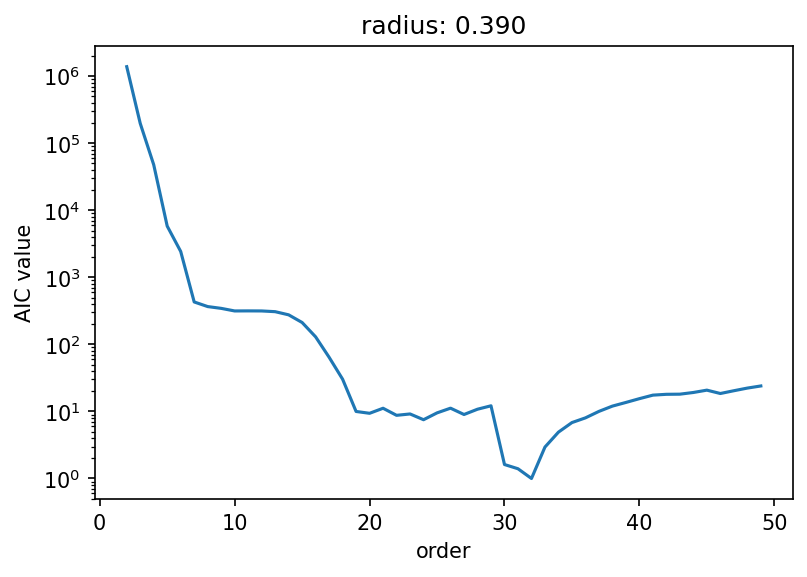

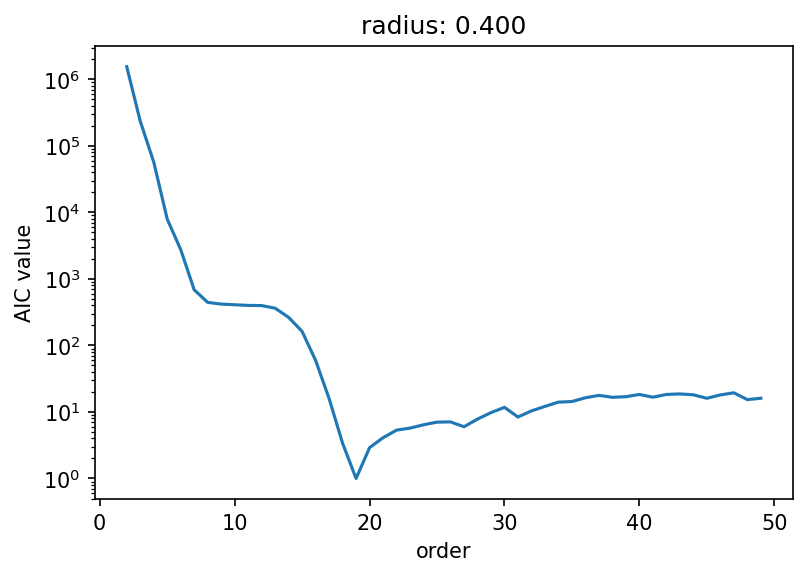

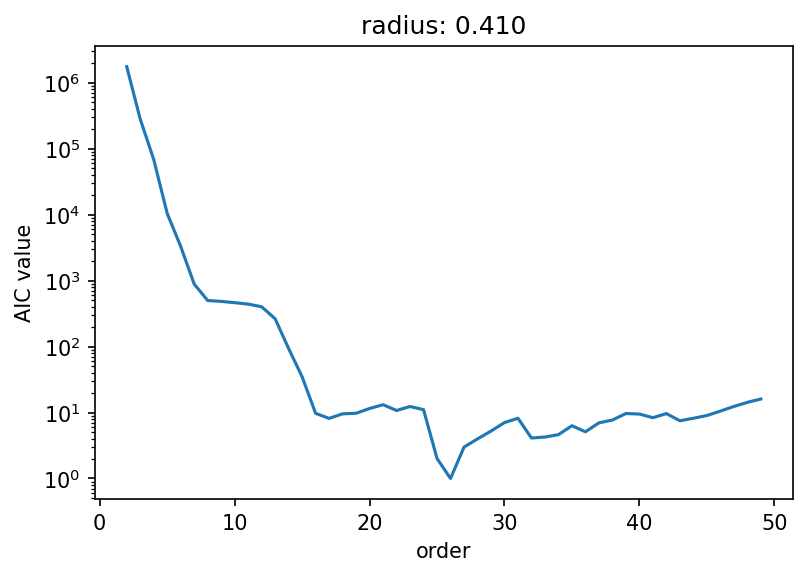

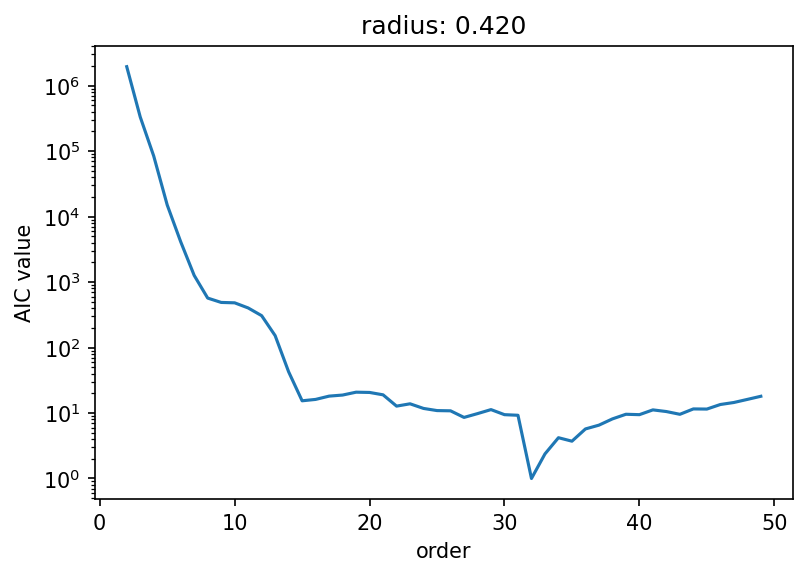

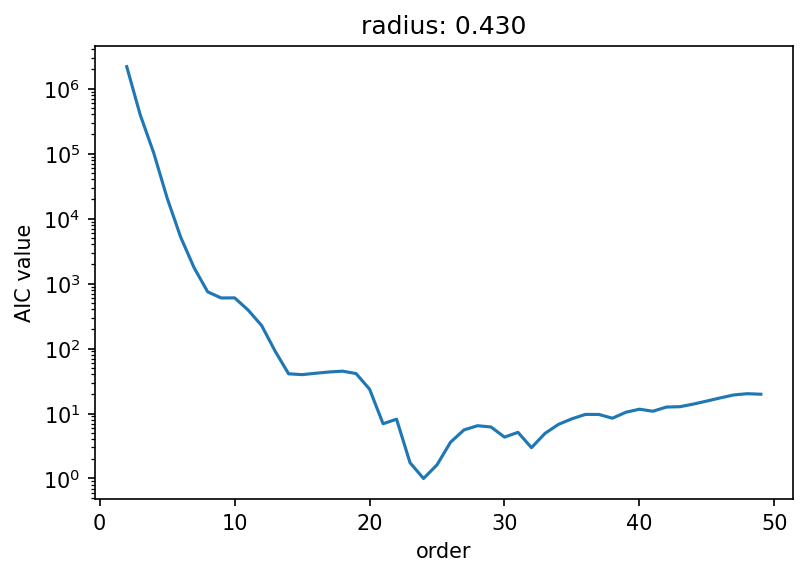

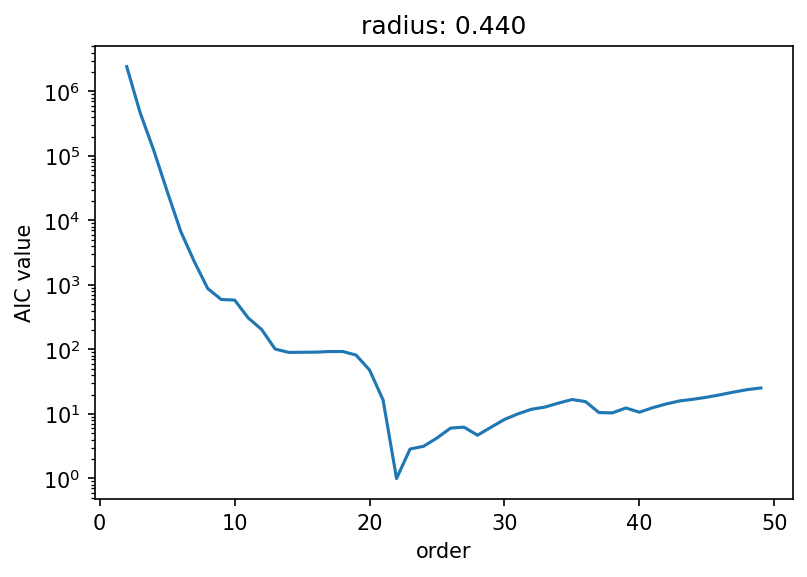

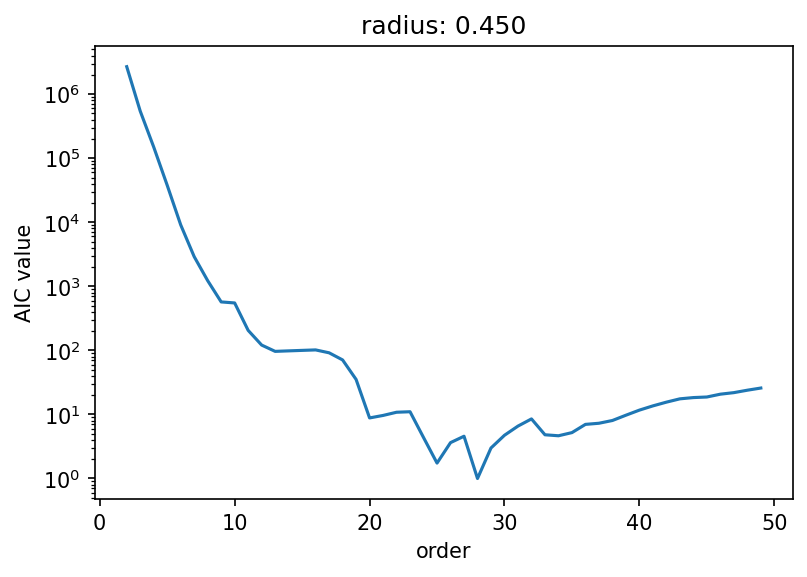

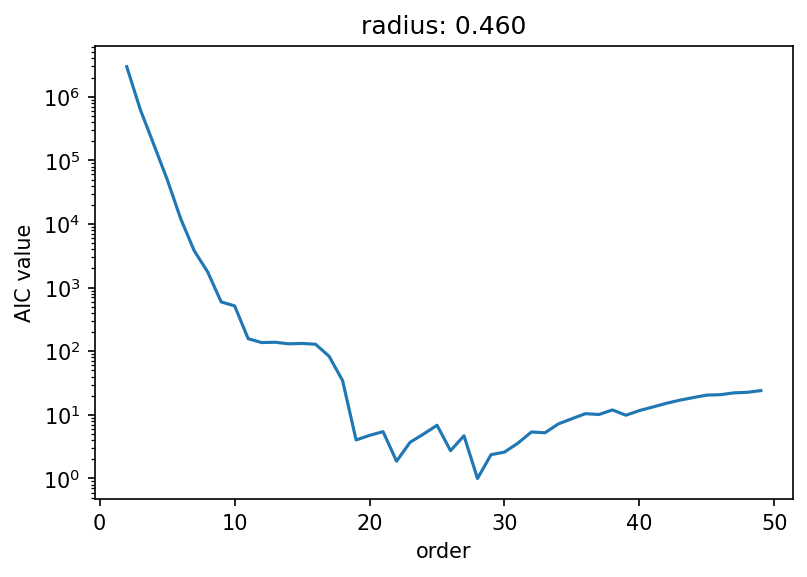

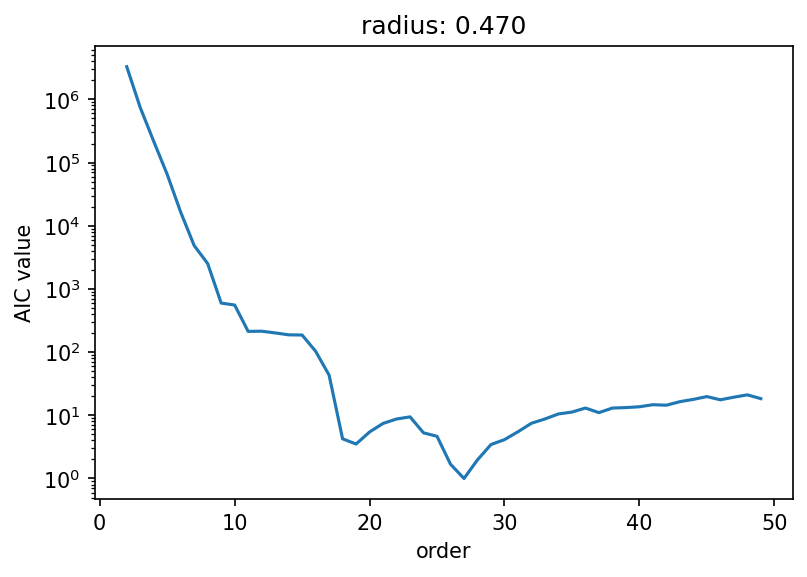

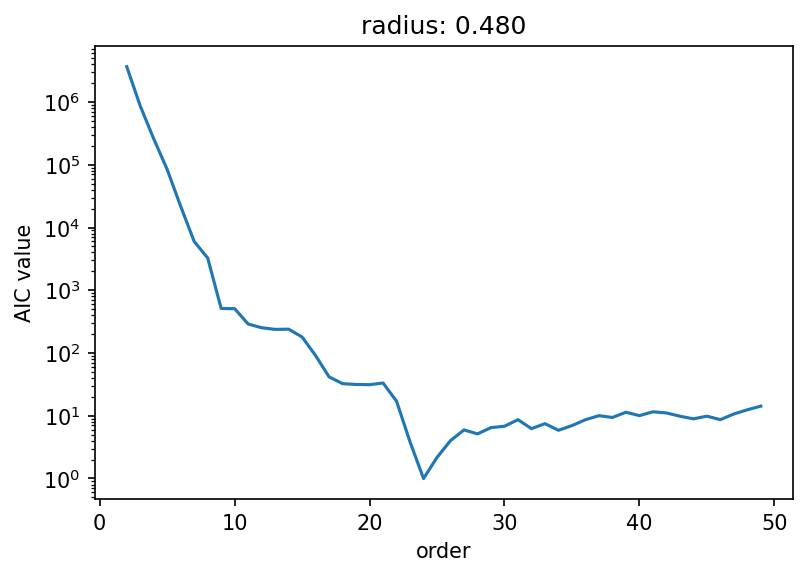

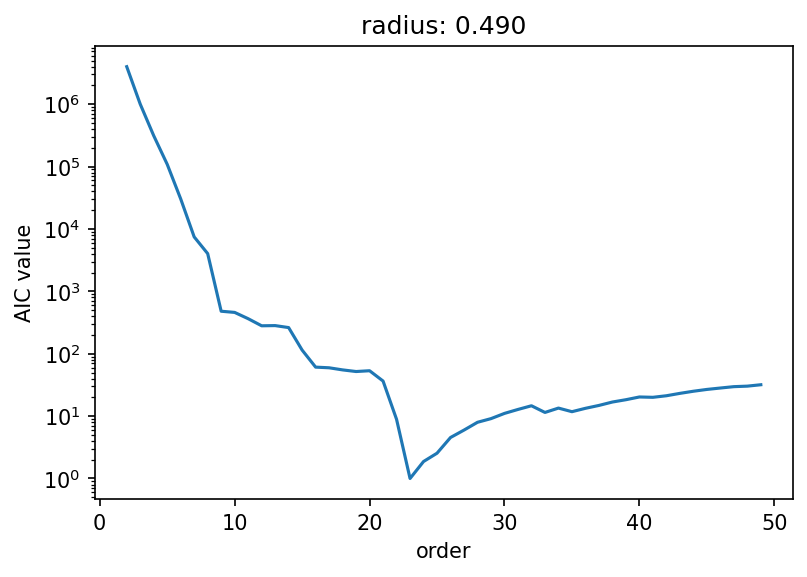

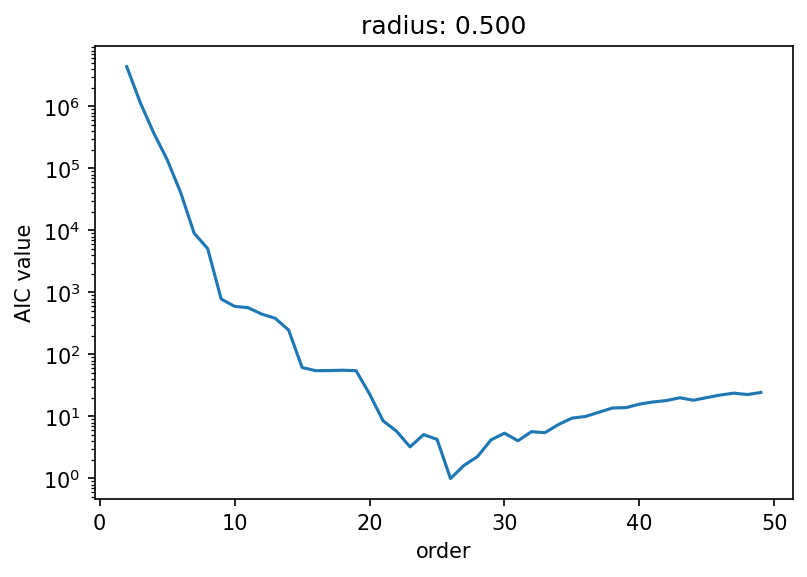

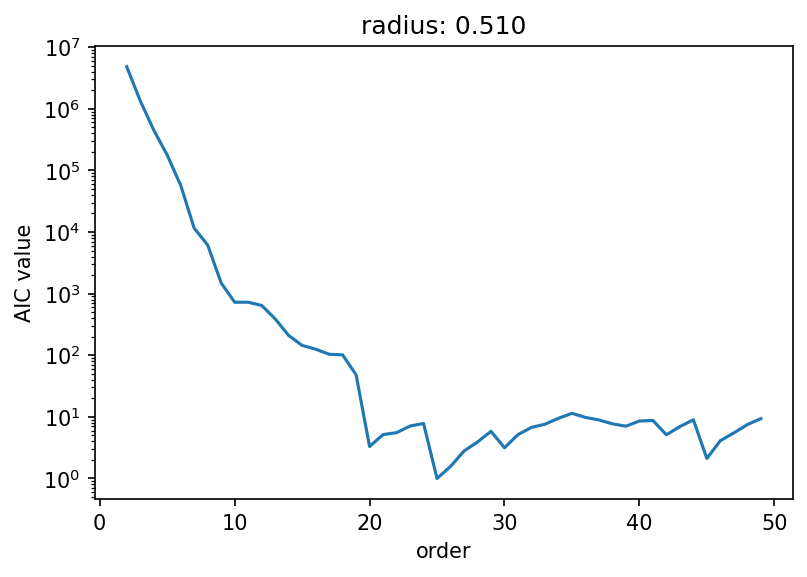

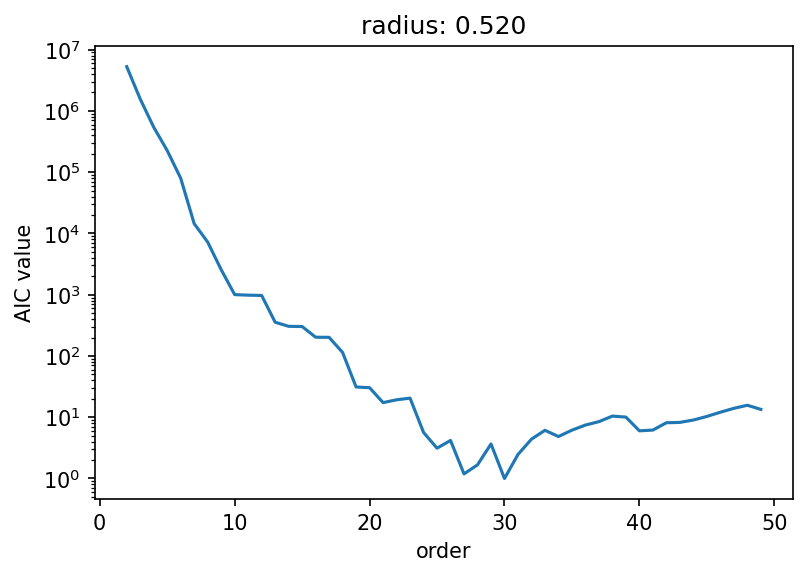

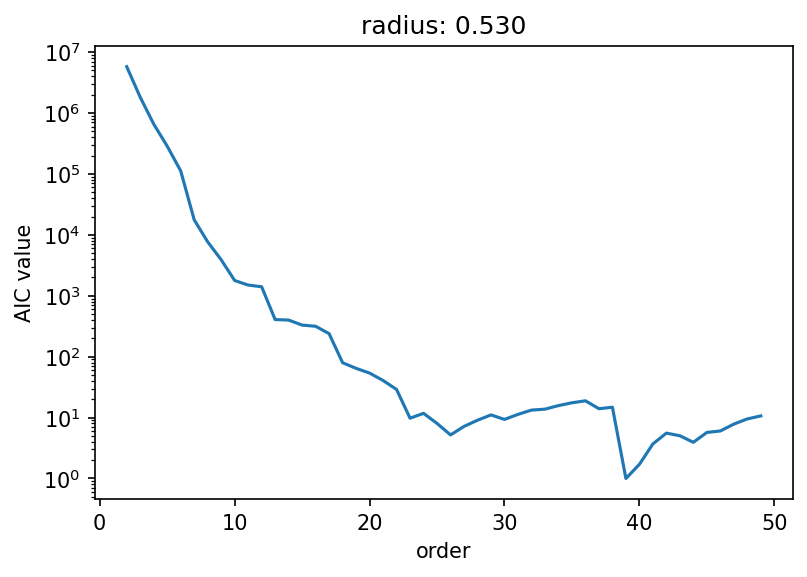

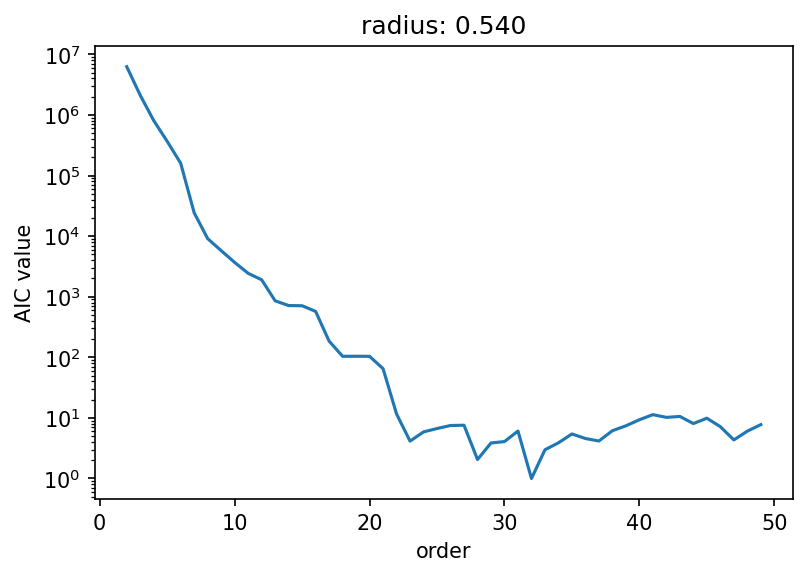

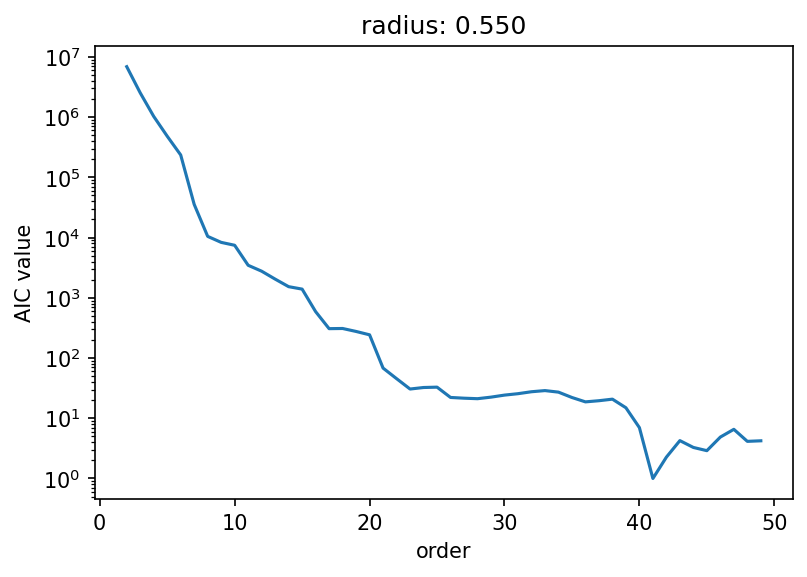

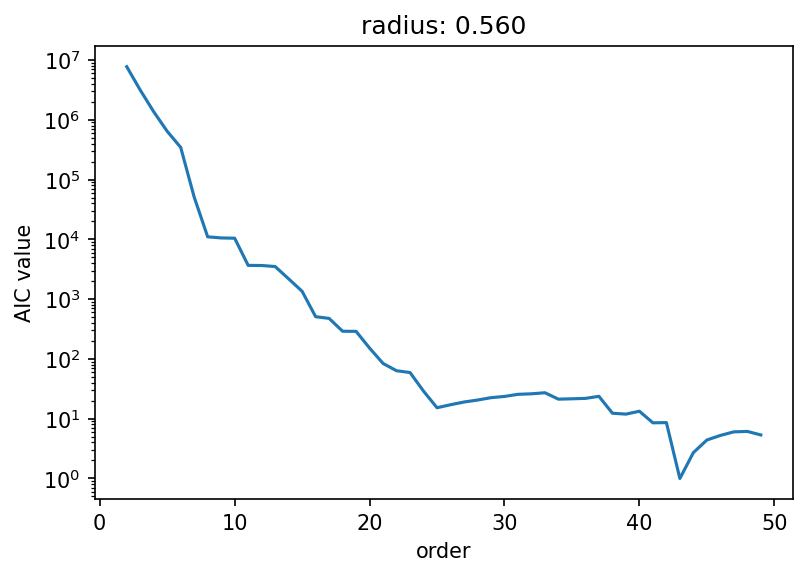

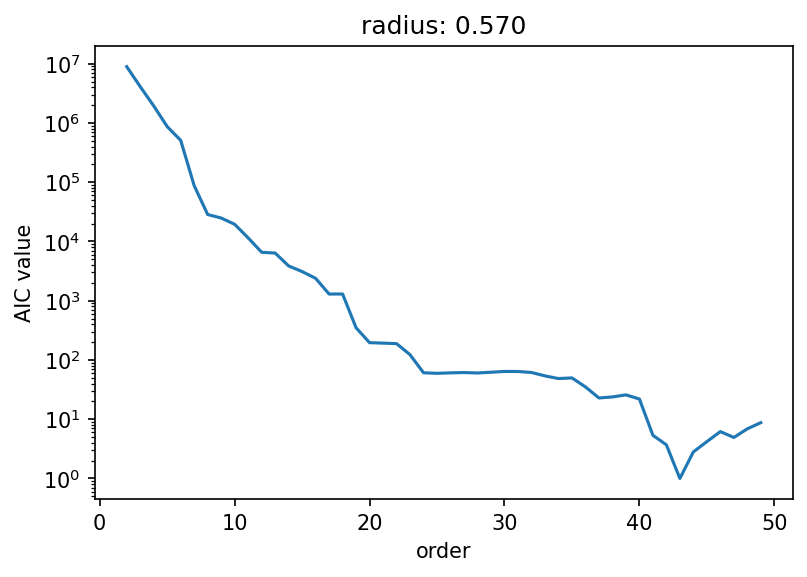

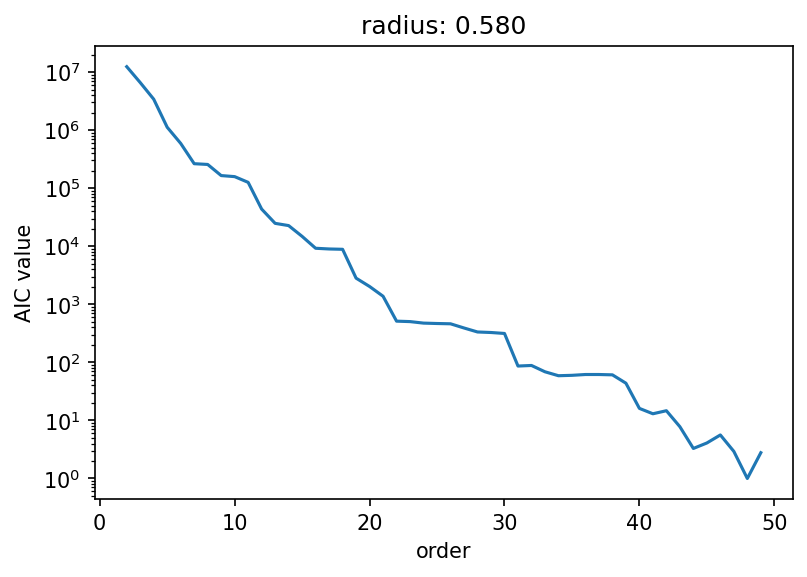

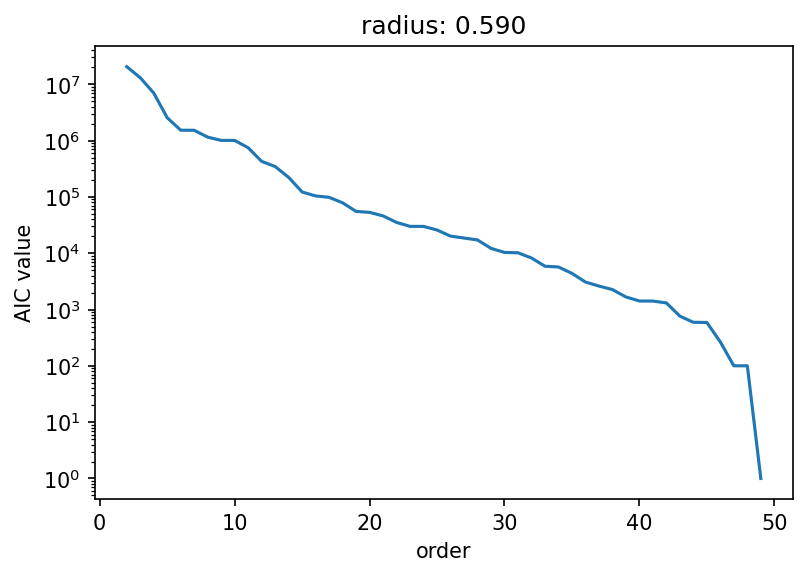

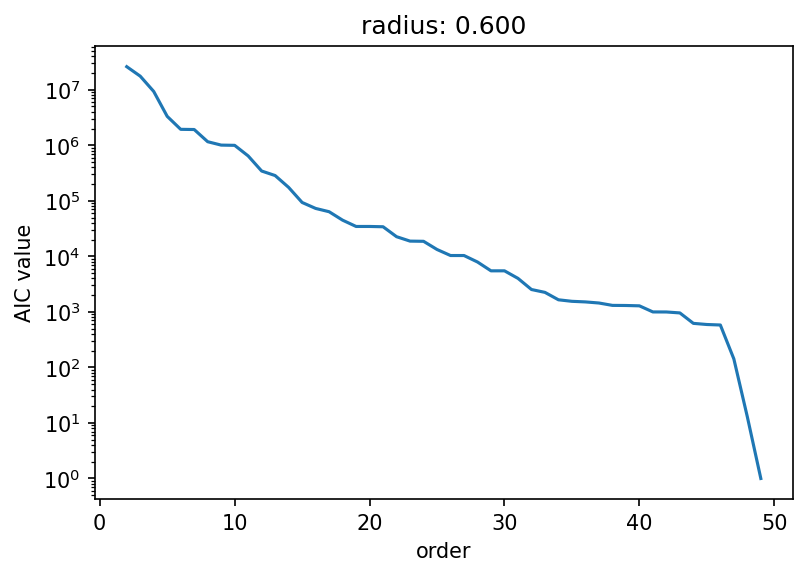

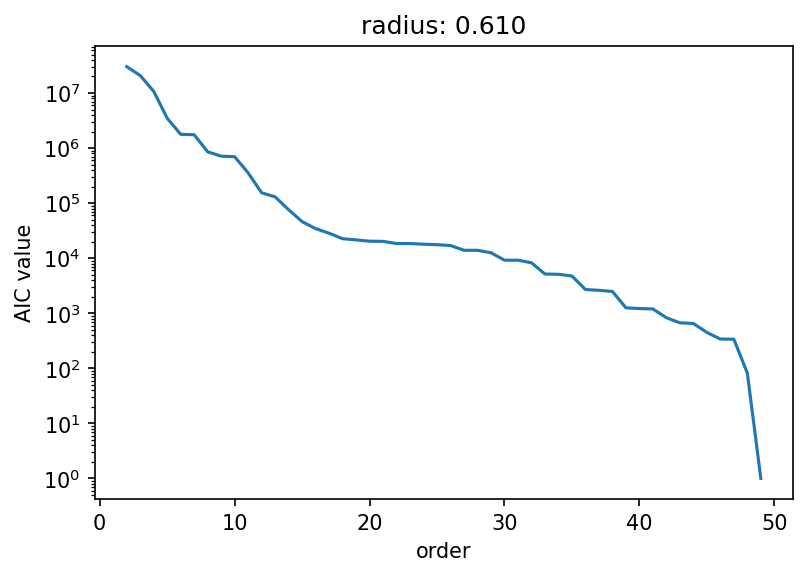

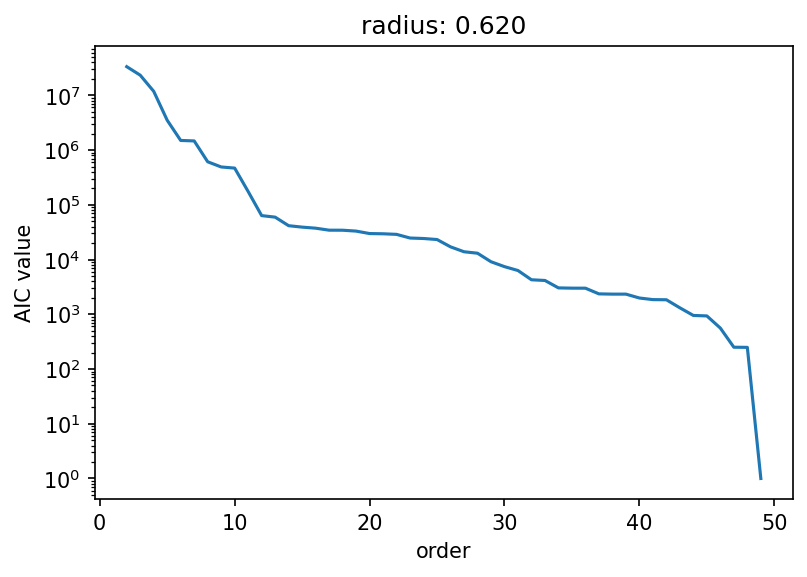

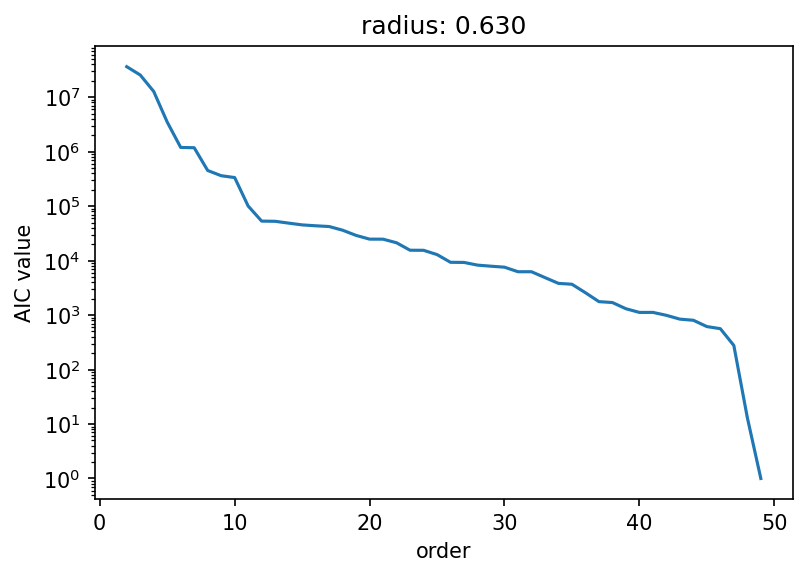

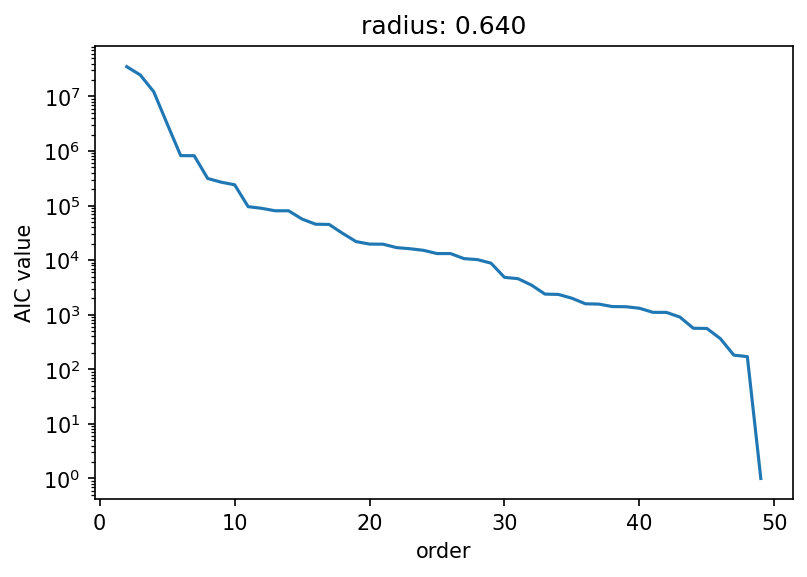

In [8]:
import tables
path = './coeff_pe_1t_reflection0.00_50/'
radiuss = np.arange(0.01,0.65,0.01)
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,50)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    plt.figure(index+1, dpi=150)
    plt.plot(orders, data - np.min(data) + 1)
    plt.semilogy()
    plt.xlabel('order')
    plt.ylabel('AIC value')
    plt.title('radius: %.3f' % radius)
    #plt.savefig('fig/radius_%.3f.png' % radius)
    plt.show()

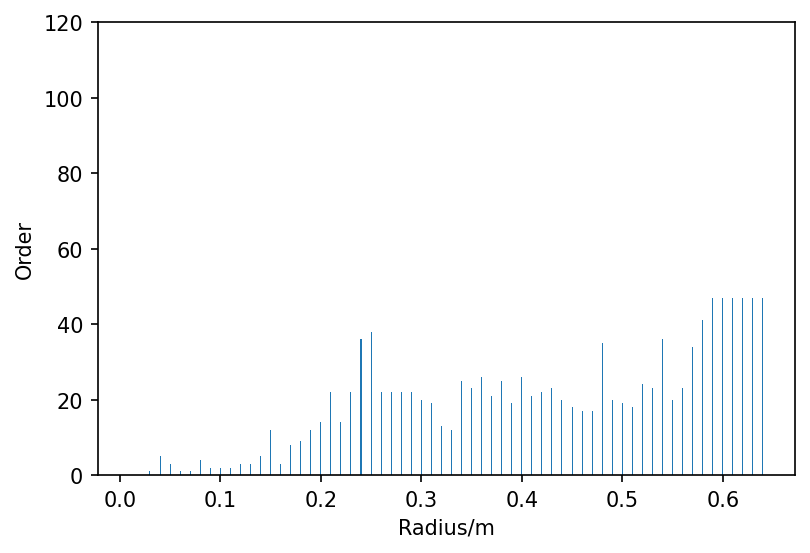

In [6]:
import tables
path = './coeff_pe_1t_reflection0.05_50/'
radiuss = np.arange(0.01,0.65,0.01)
data1 =[]
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,50)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    data = np.array(data)
    data1.append(np.where(data==np.min(data))[0][0])

plt.figure(index+1, dpi=150)
plt.bar(radiuss, np.array(data1),width=0.001)
#plt.semilogy()
#plt.savefig('fig/radius_%.3f.png' % radius)
plt.xlabel('Radius/m')
plt.ylabel('Order')
plt.ylim(0,120)
plt.savefig('order1.png')
plt.show()

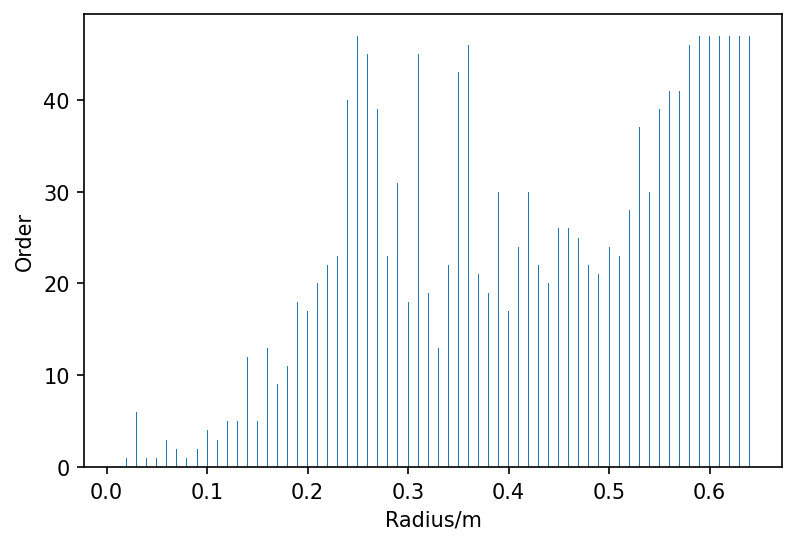

In [7]:
import tables
path = './coeff_pe_1t_reflection0.00_50/'
radiuss = np.arange(0.01,0.65,0.01)
data1 =[]
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,50)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    data = np.array(data)
    data1.append(np.where(data==np.min(data))[0][0])

plt.figure(index+1, dpi=150)
plt.bar(radiuss, np.array(data1),width=0.001)
#plt.semilogy()
#plt.savefig('fig/radius_%.3f.png' % radius)
plt.xlabel('Radius/m')
plt.ylabel('Order')
plt.savefig('order2.png')
plt.show()

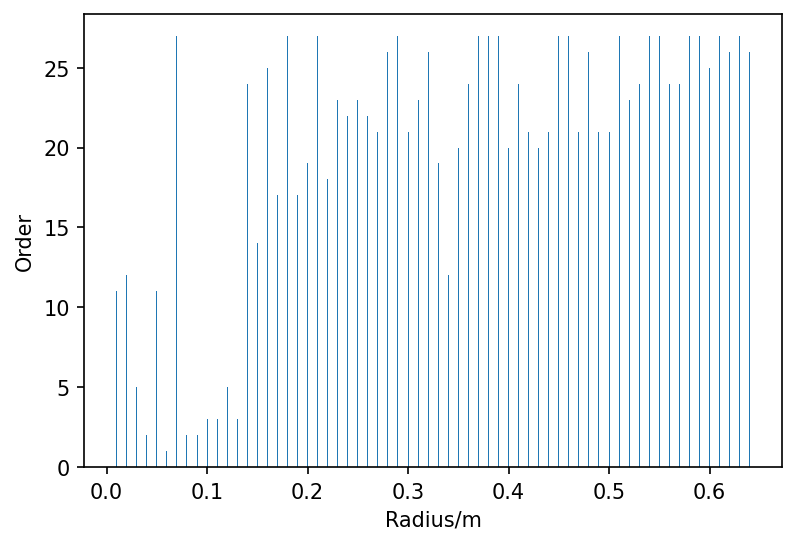

In [5]:
import tables
path = './coeff_pe_1t_reflection0.05_8MeV_30/'
radiuss = np.arange(0.01,0.65,0.01)
data1 =[]
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,30)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    data = np.array(data)
    data1.append(np.where(data==np.min(data))[0][0])

plt.figure(index+1, dpi=150)
plt.bar(radiuss, np.array(data1),width=0.001)
#plt.semilogy()
#plt.savefig('fig/radius_%.3f.png' % radius)
plt.xlabel('Radius/m')
plt.ylabel('Order')
plt.savefig('order2.png')
plt.show()

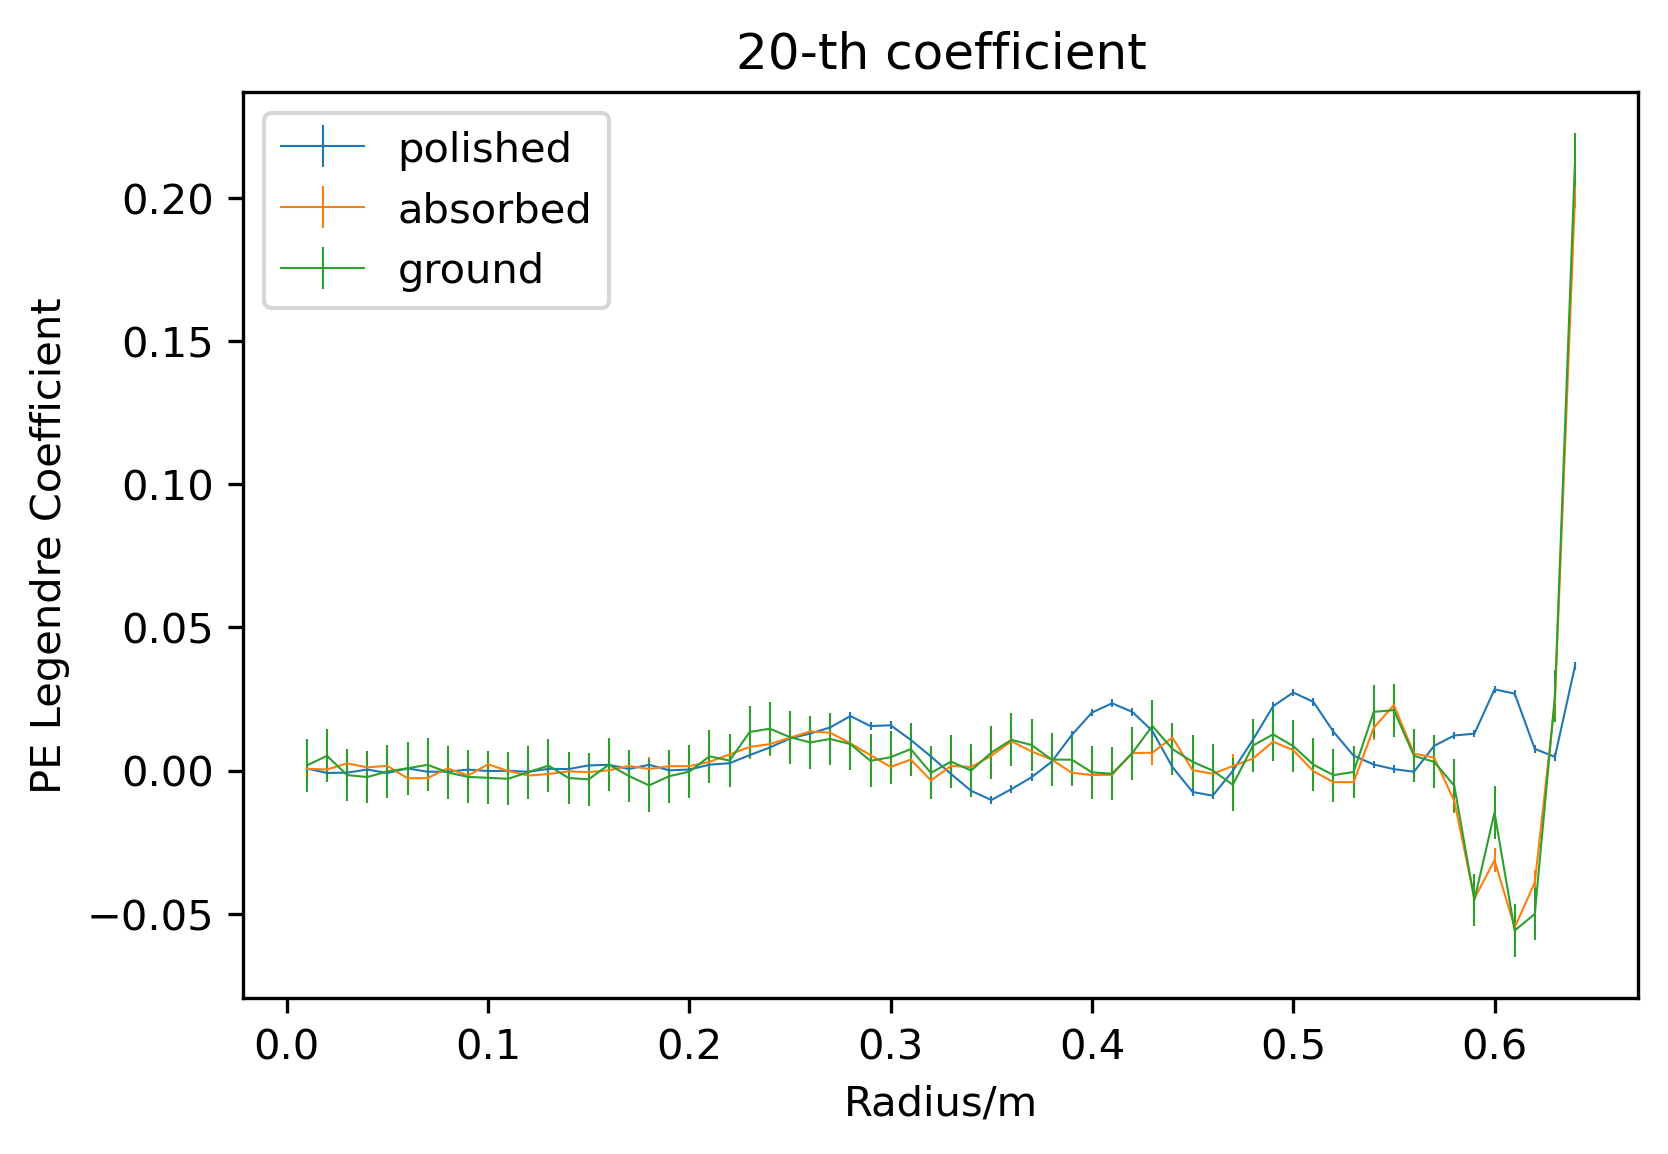

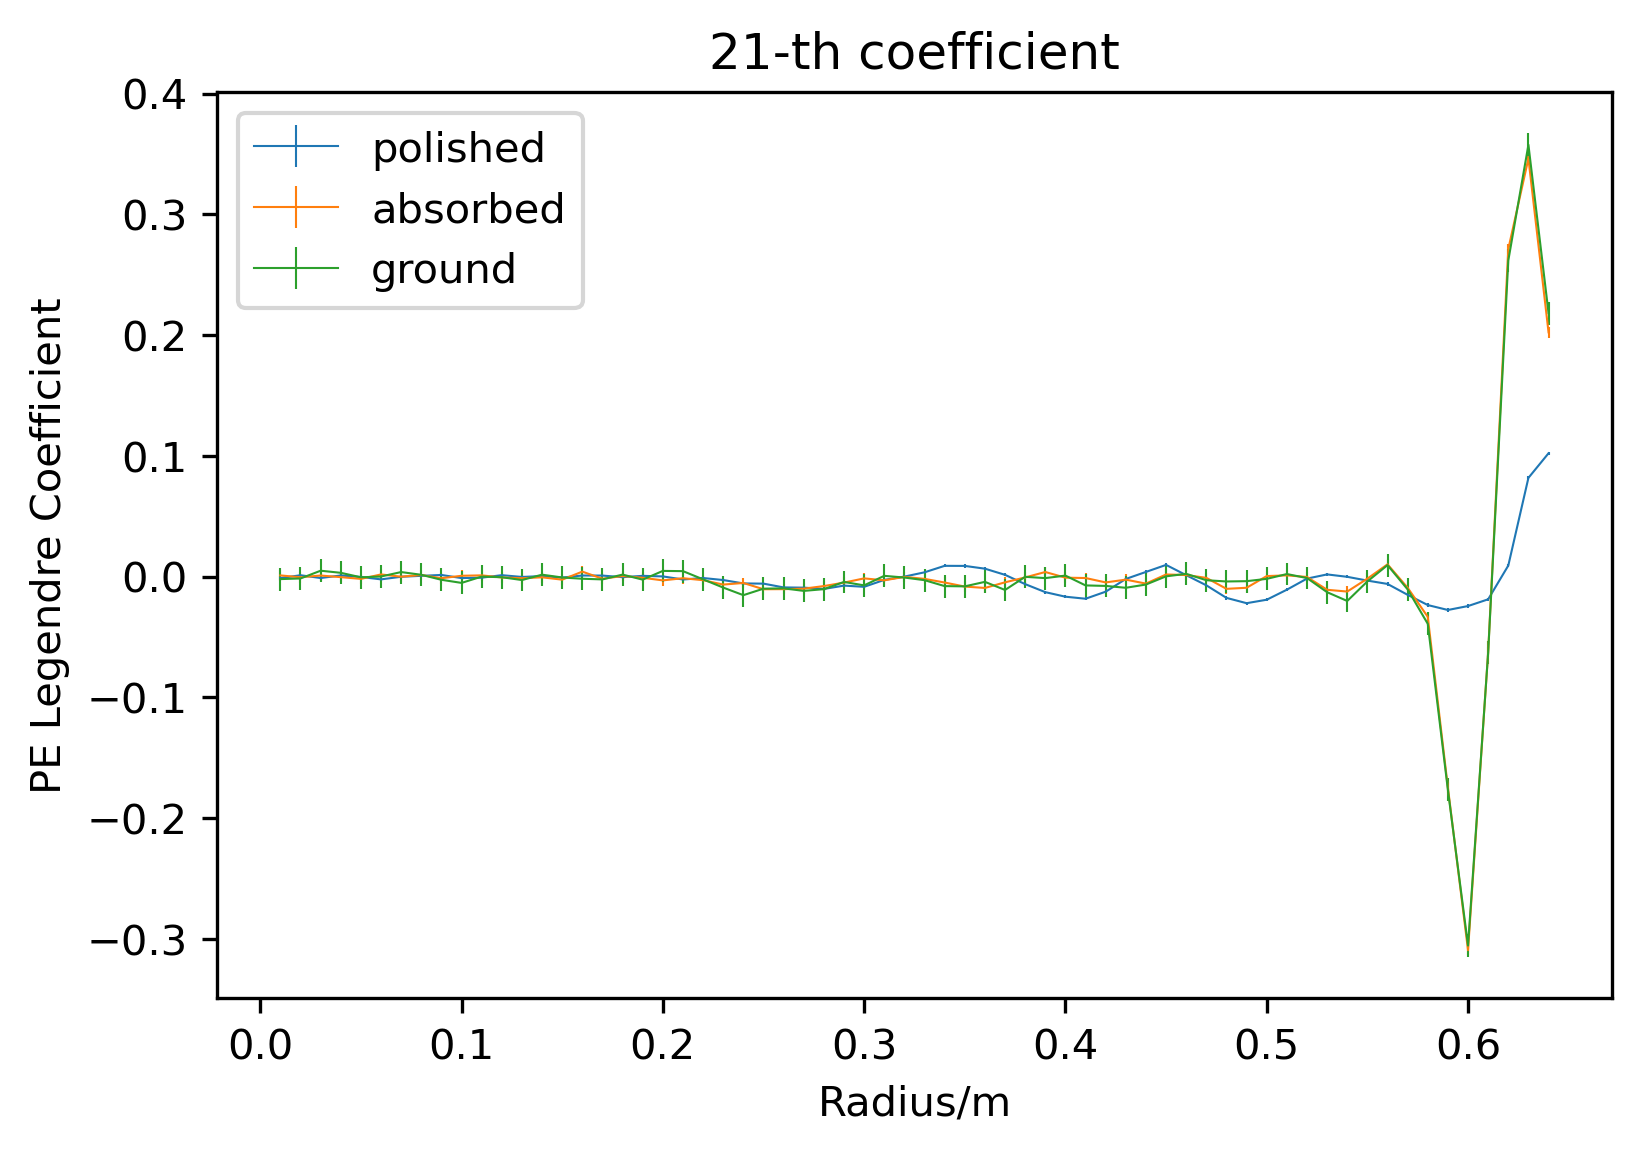

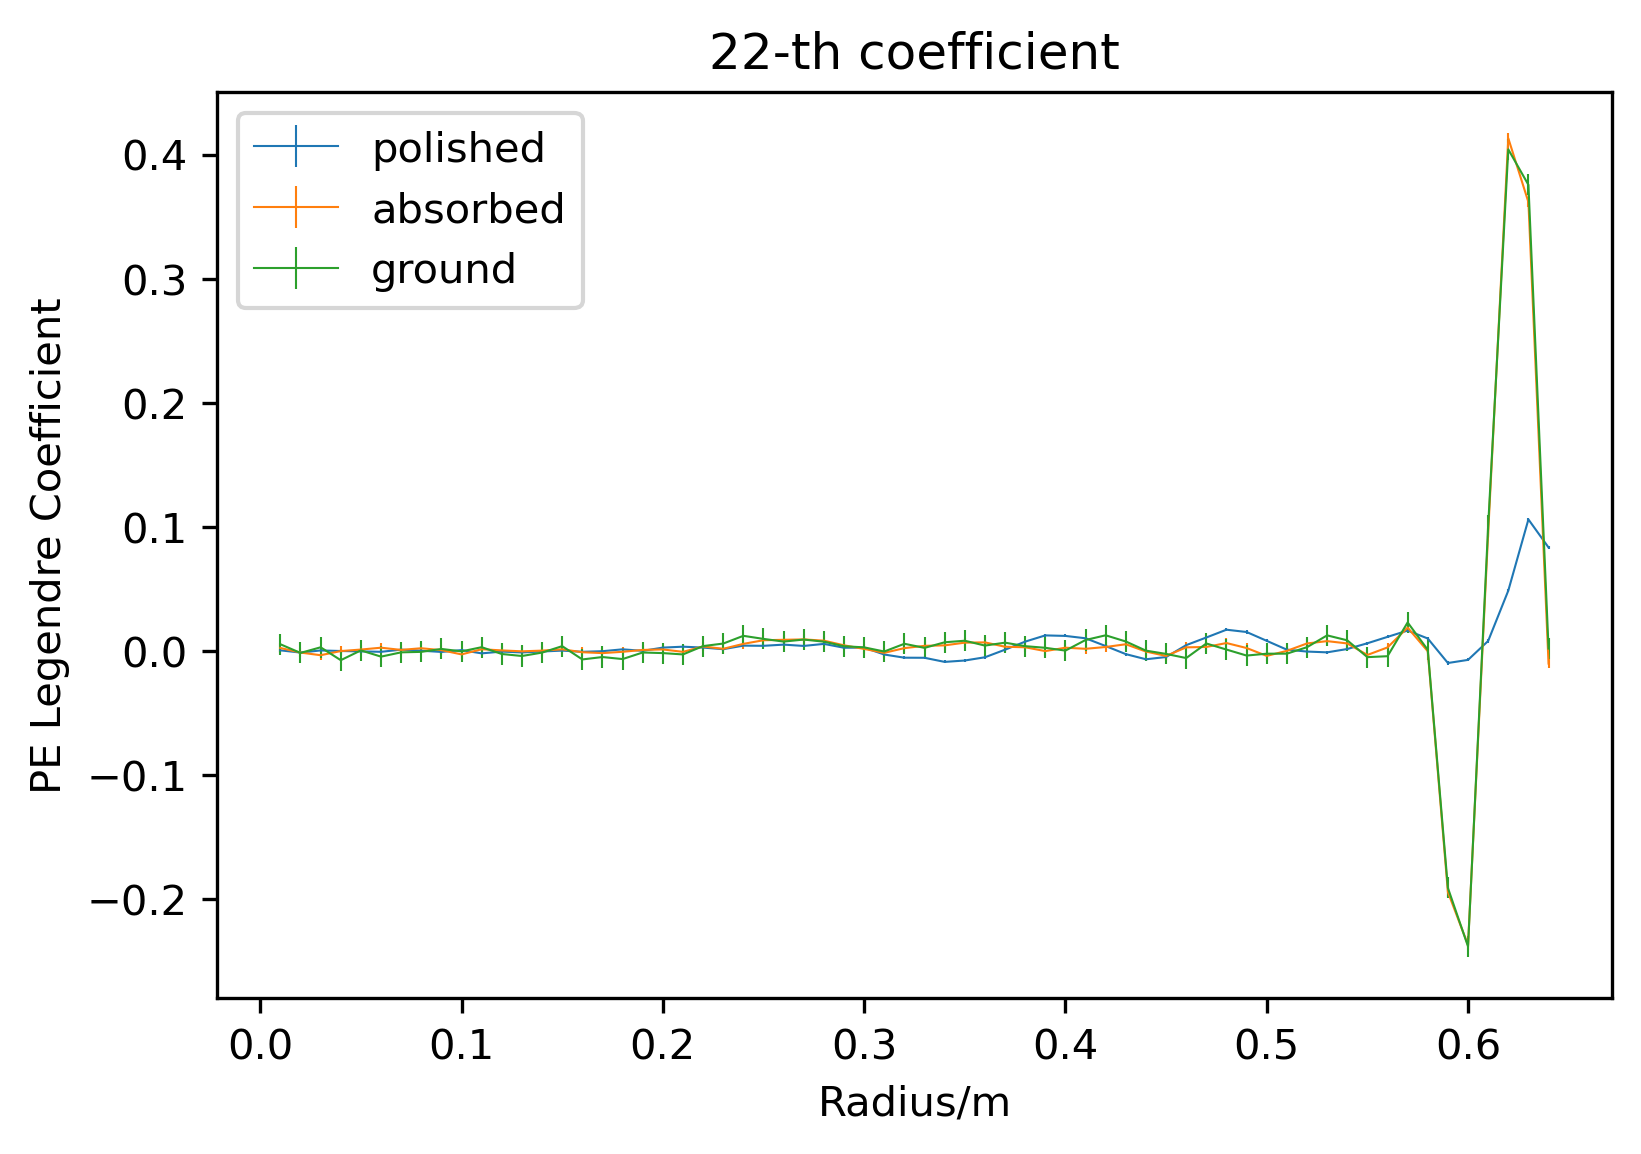

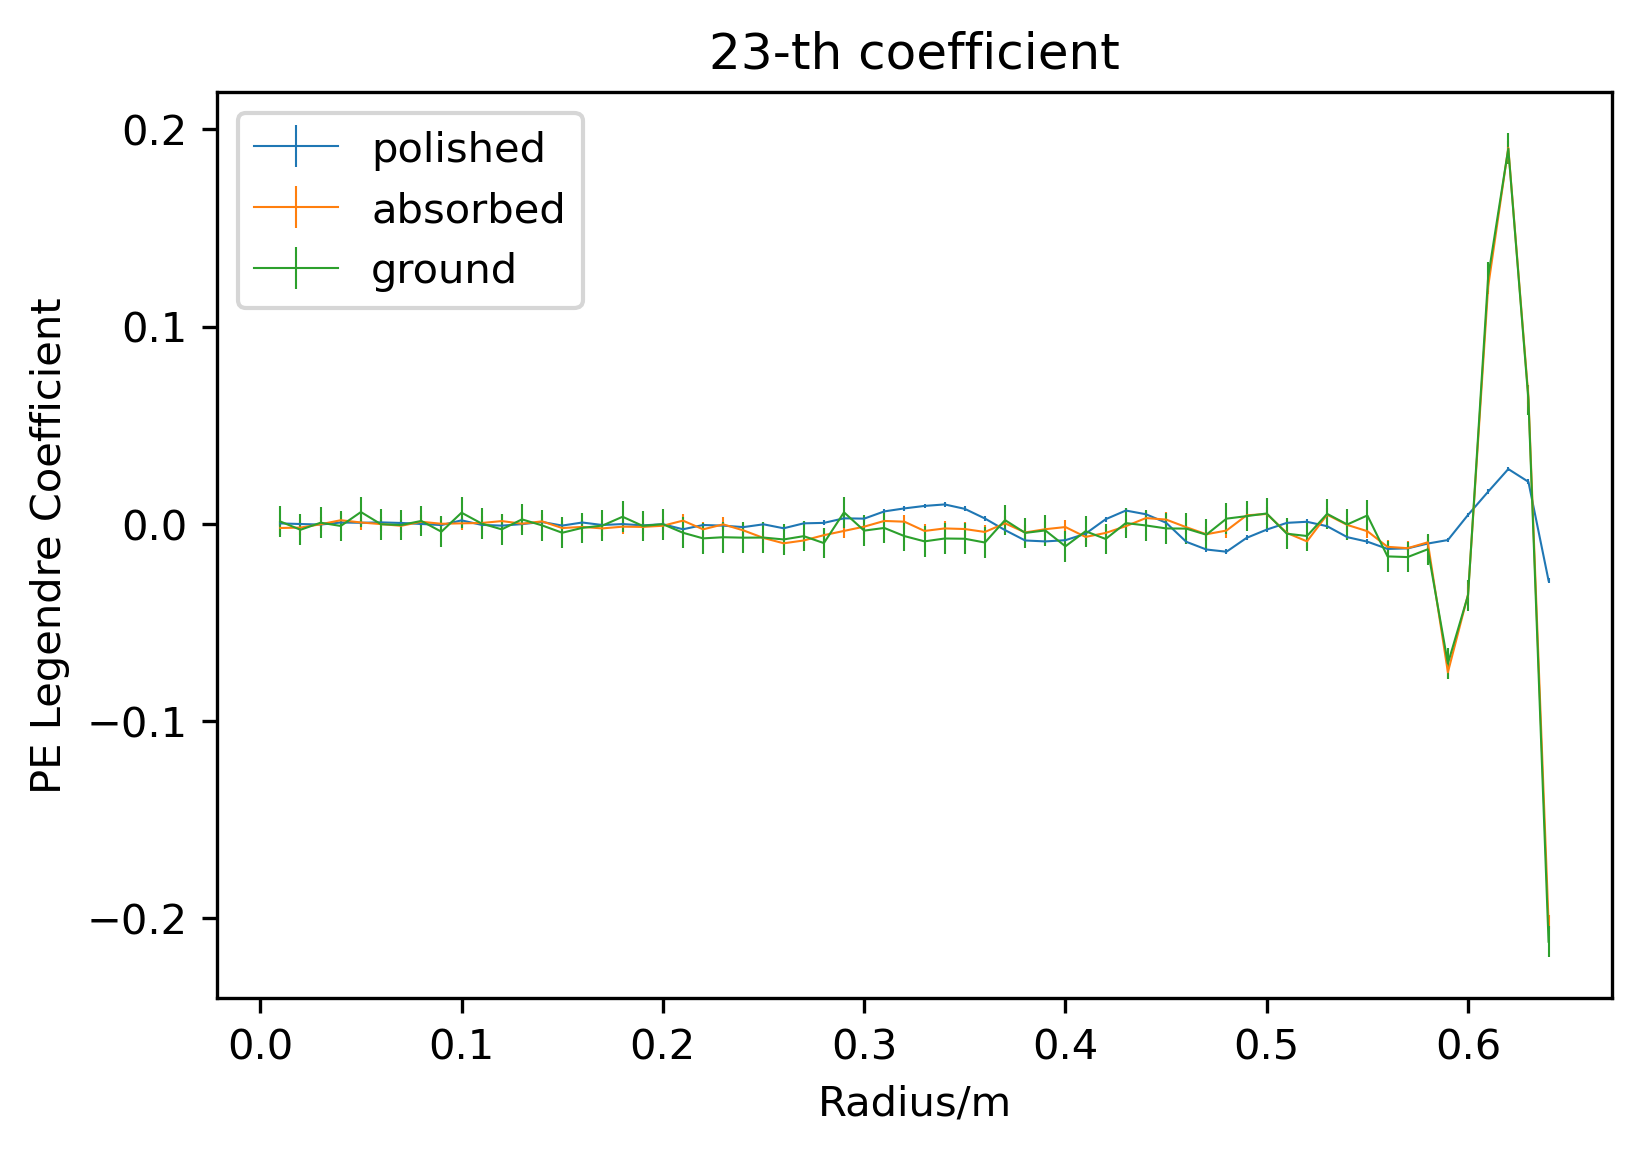

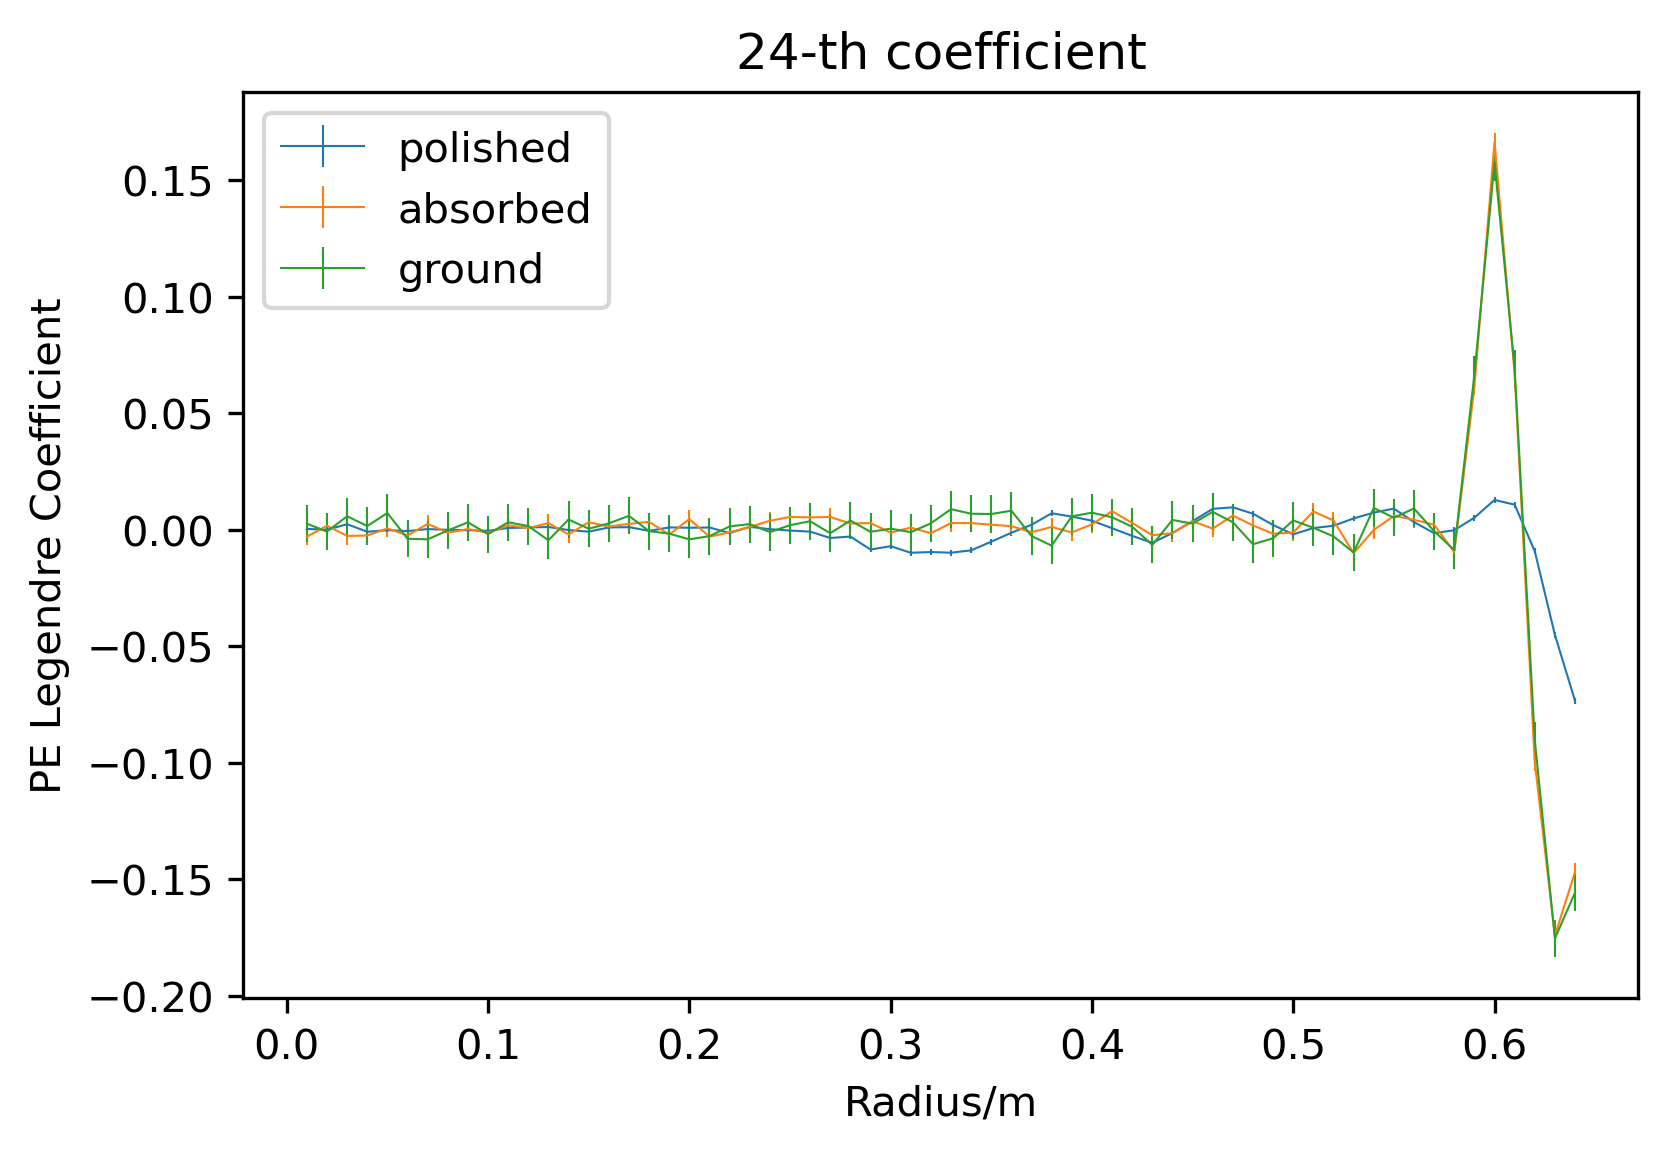

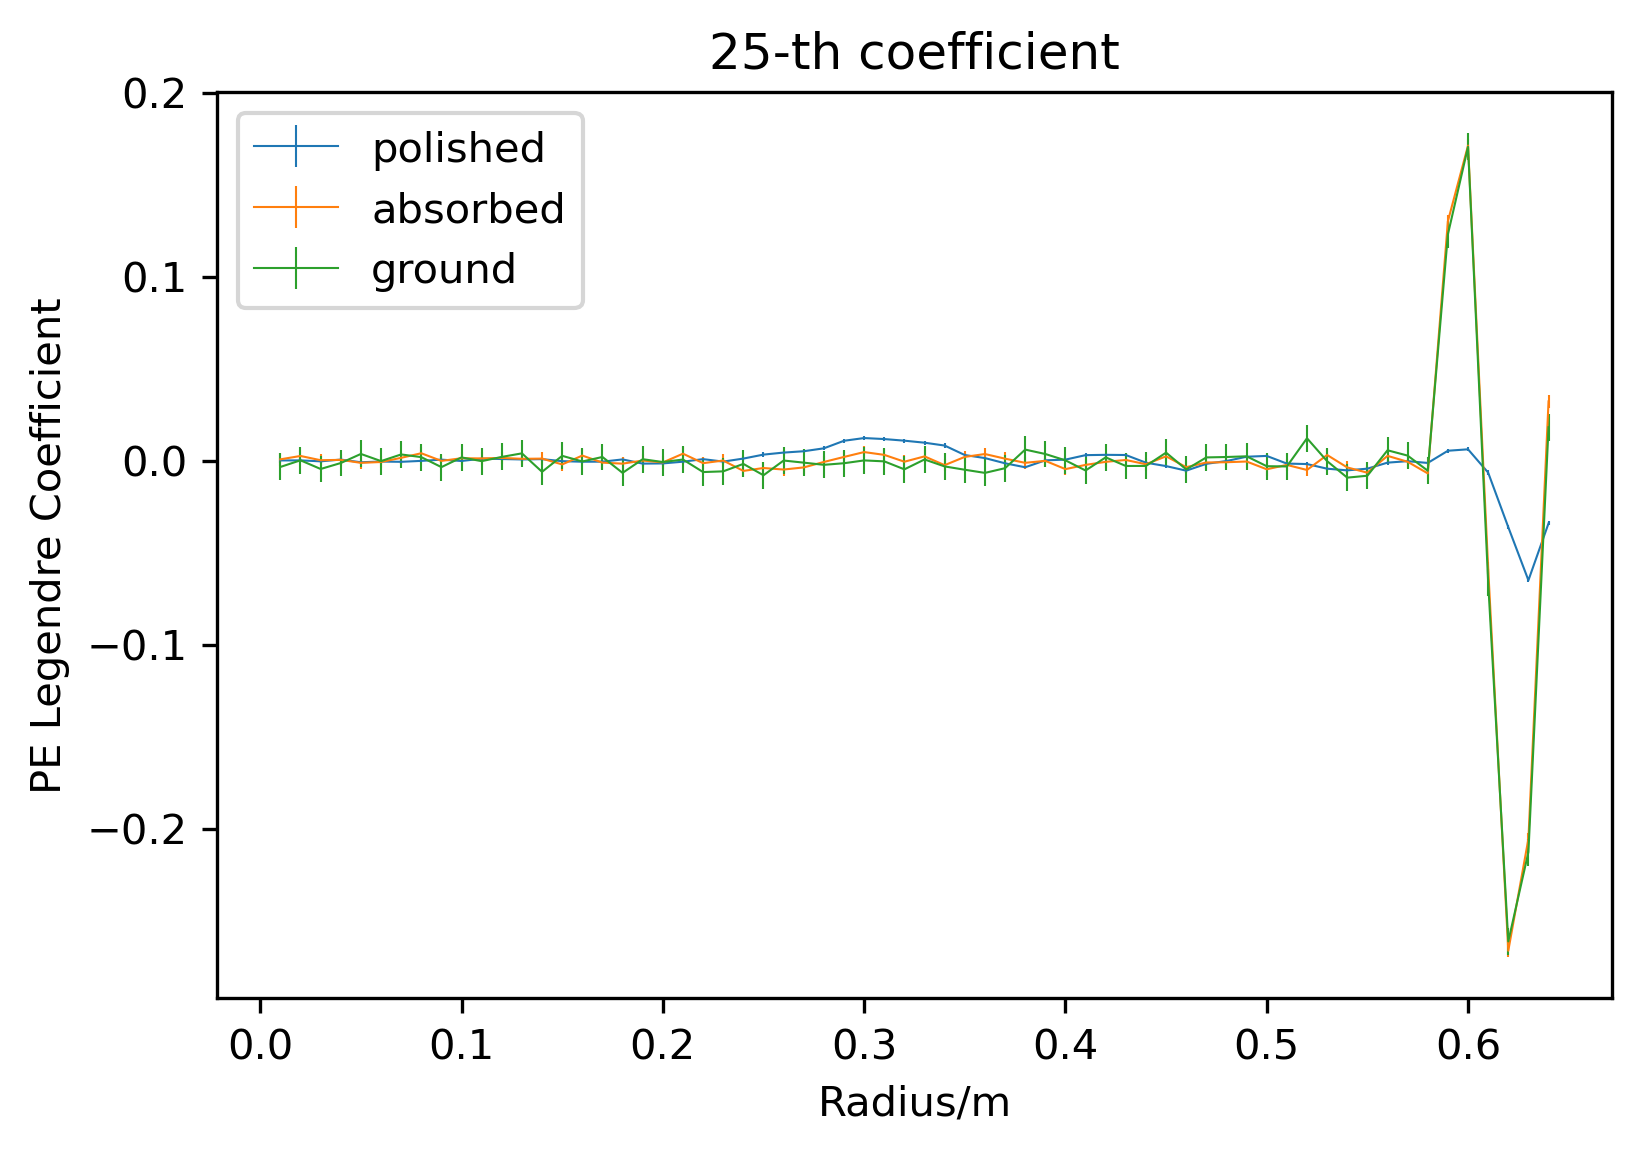

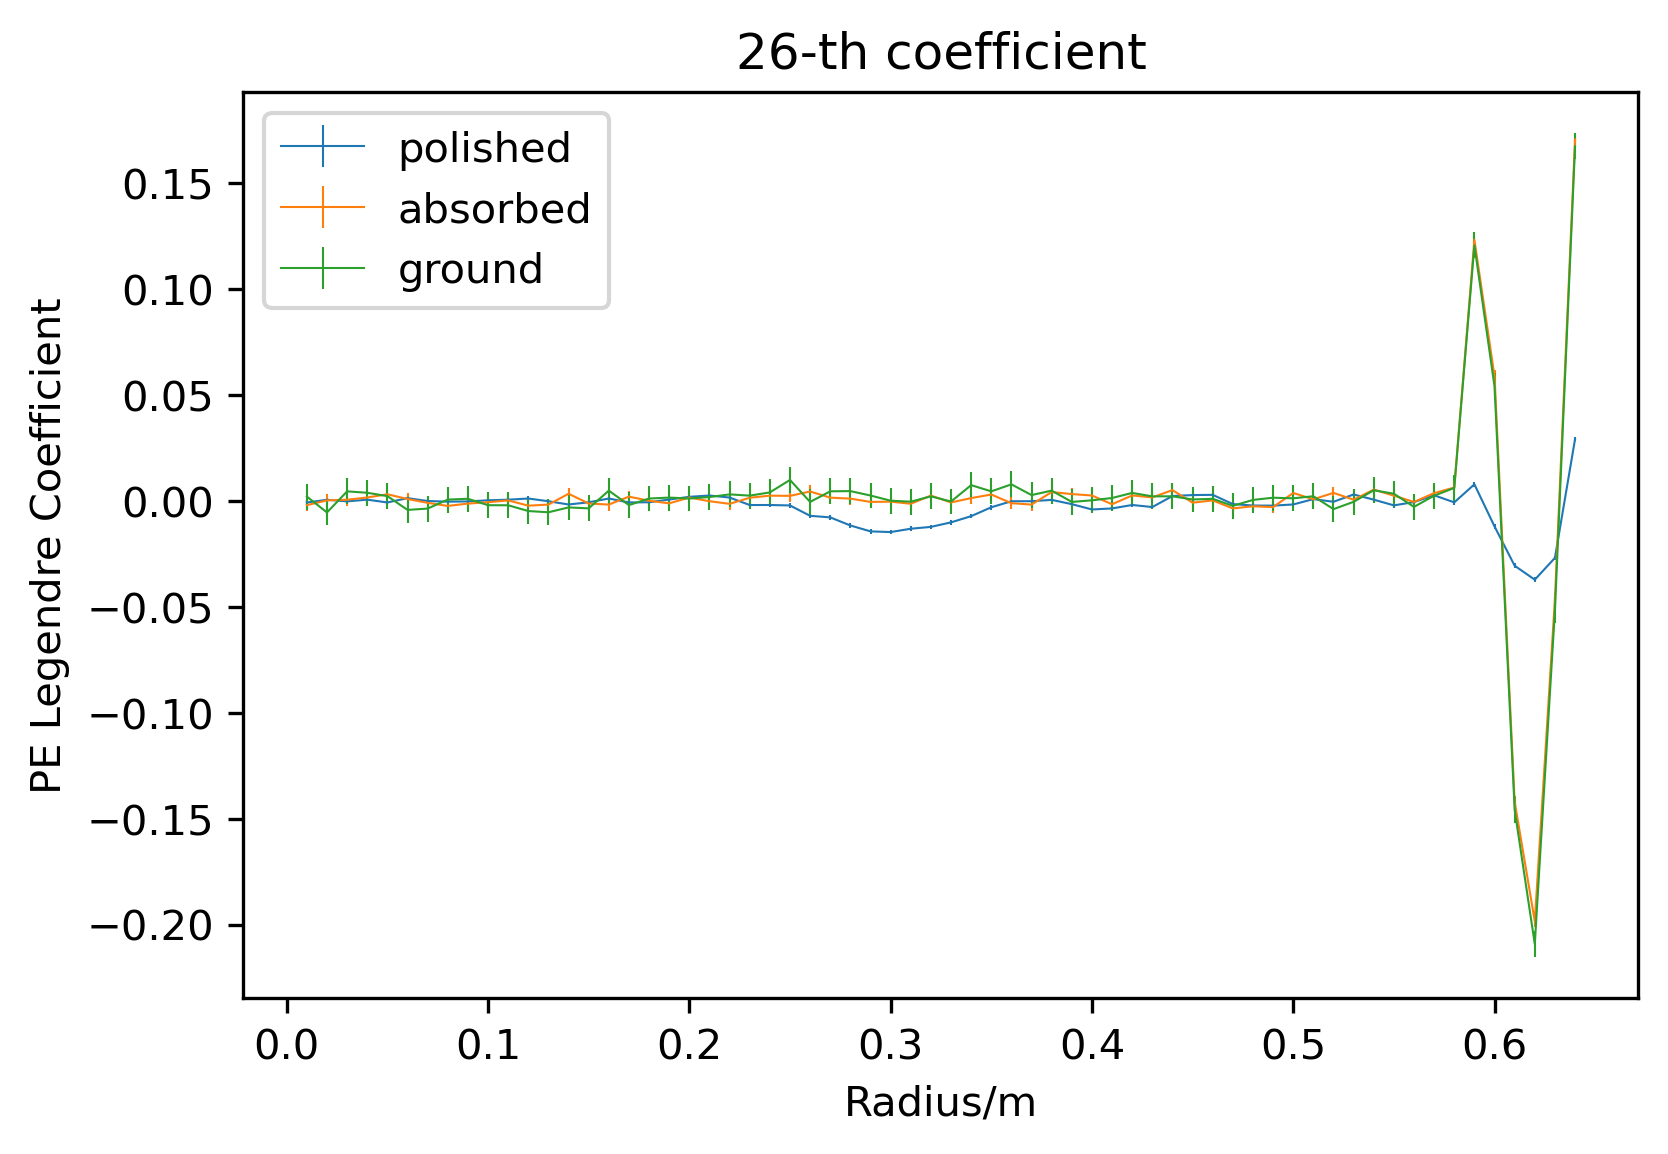

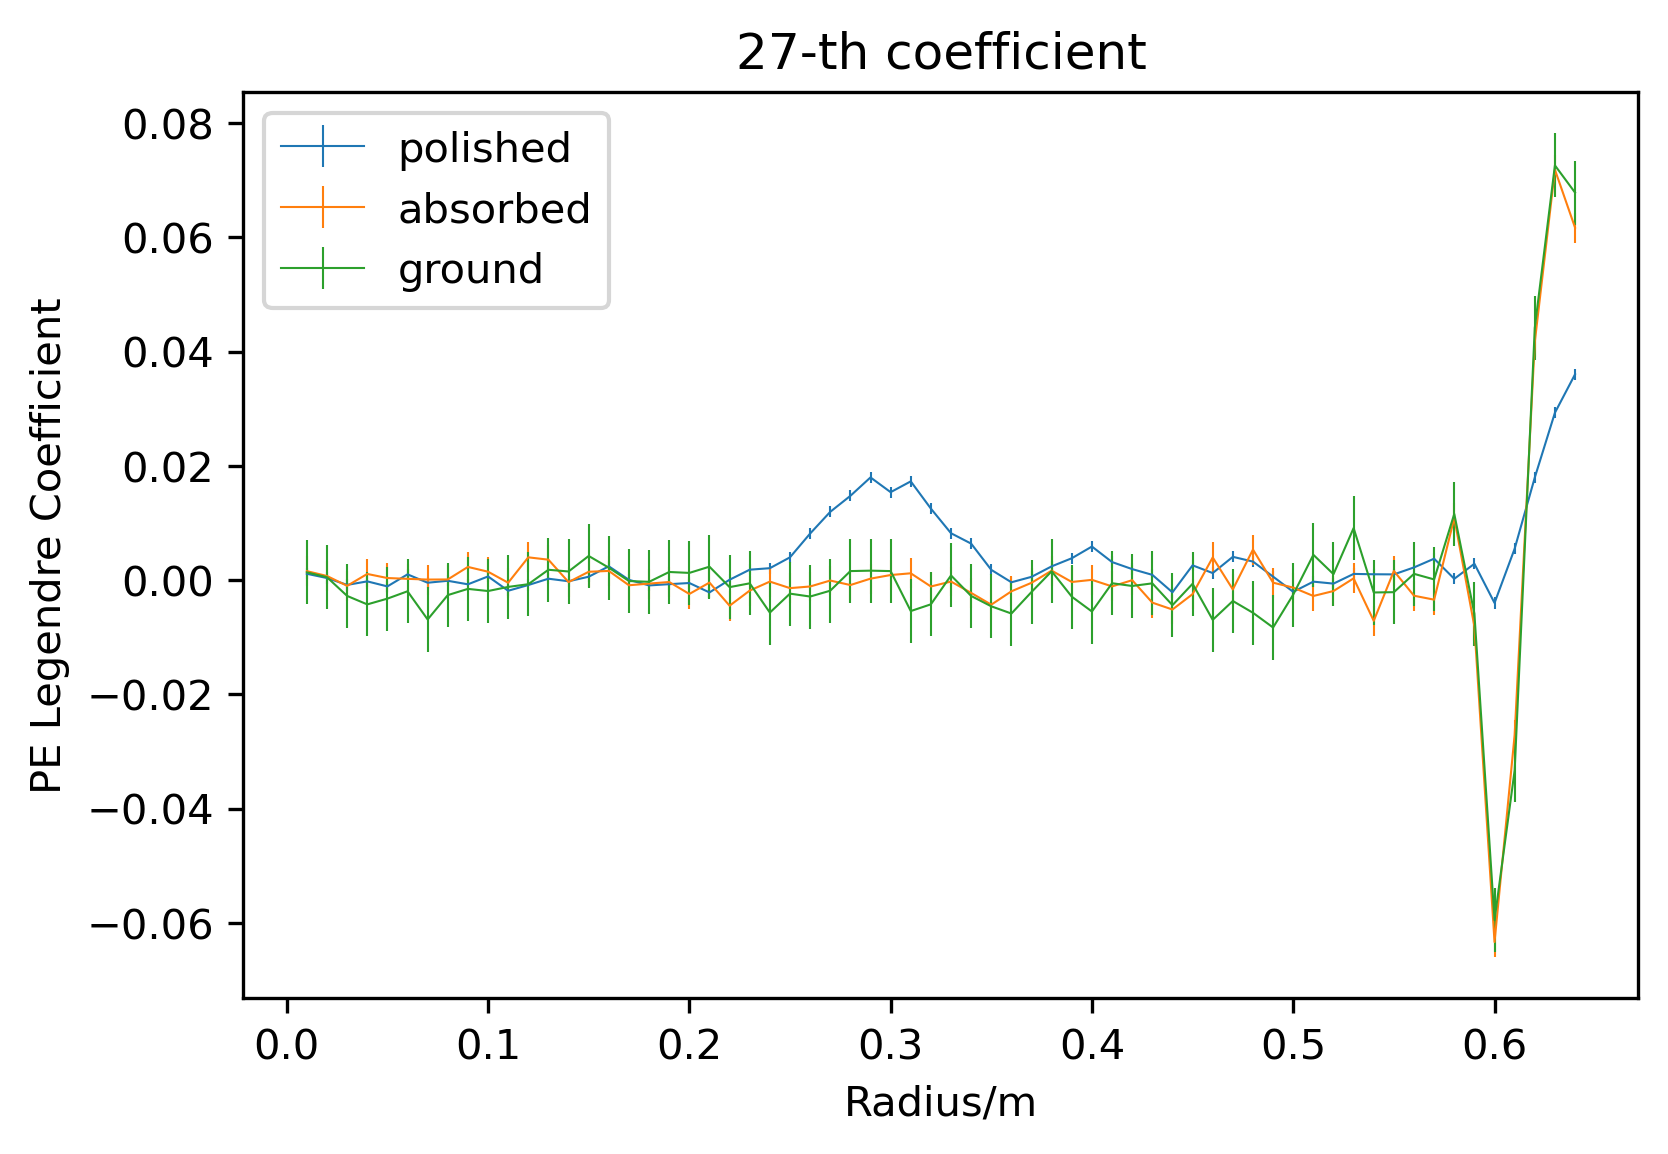

In [10]:
def LoadDataPE_TW(path, radius, order):
    data = []
    error = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    std = 'std' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    error = eval('np.array(h.root.'+ std + '[:])')
    h.close()
    return data, error

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    error_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff, error= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff))
        error_pe = np.hstack((error_pe, error))
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    error_pe = np.reshape(error_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe, error

order = 29
rd1, coeff_pe1, error_pe1 = main_photon('coeff_pe_1t_8.0MeV_shell/',order)
rd2, coeff_pe2, error_pe2 = main_photon('coeff_pe_1t_reflection0.00_30/',order)
rd3, coeff_pe3, error_pe3 = main_photon('coeff_pe_1t_reflection0.05_30/',order)
for i in np.arange(20,order-1):
    if(i==0):
        plt.figure(num=i+1, dpi=300)
        plt.errorbar(rd1, coeff_pe1[i] - np.log(4) - np.log(20000/4285),yerr=error_pe1[i],linewidth=0.5, markersize=2, label='polished')
        plt.errorbar(rd2, coeff_pe2[i] - np.log(20000/4285),yerr=error_pe2[i],linewidth=0.5, markersize=2, label='absorbed')
        plt.errorbar(rd3, coeff_pe3[i],yerr=error_pe3[i],linewidth=0.5, markersize=2, label='ground')
    else:
        plt.figure(num=i+1, dpi=300)
        plt.errorbar(rd1, coeff_pe1[i],yerr=error_pe1[i],linewidth=0.5, markersize=2, label='polished')
        plt.errorbar(rd2, coeff_pe2[i],yerr=error_pe2[i],linewidth=0.5, markersize=2, label='absorbed')
        plt.errorbar(rd3, coeff_pe3[i],yerr=error_pe3[i],linewidth=0.5, markersize=2, label='ground')

    plt.legend()
    plt.xlabel('Radius/m')
    plt.ylabel('PE Legendre Coefficient')
    plt.title('%d-th coefficient' % i)
    plt.savefig('Coeff%d.png' % i)
    plt.show()

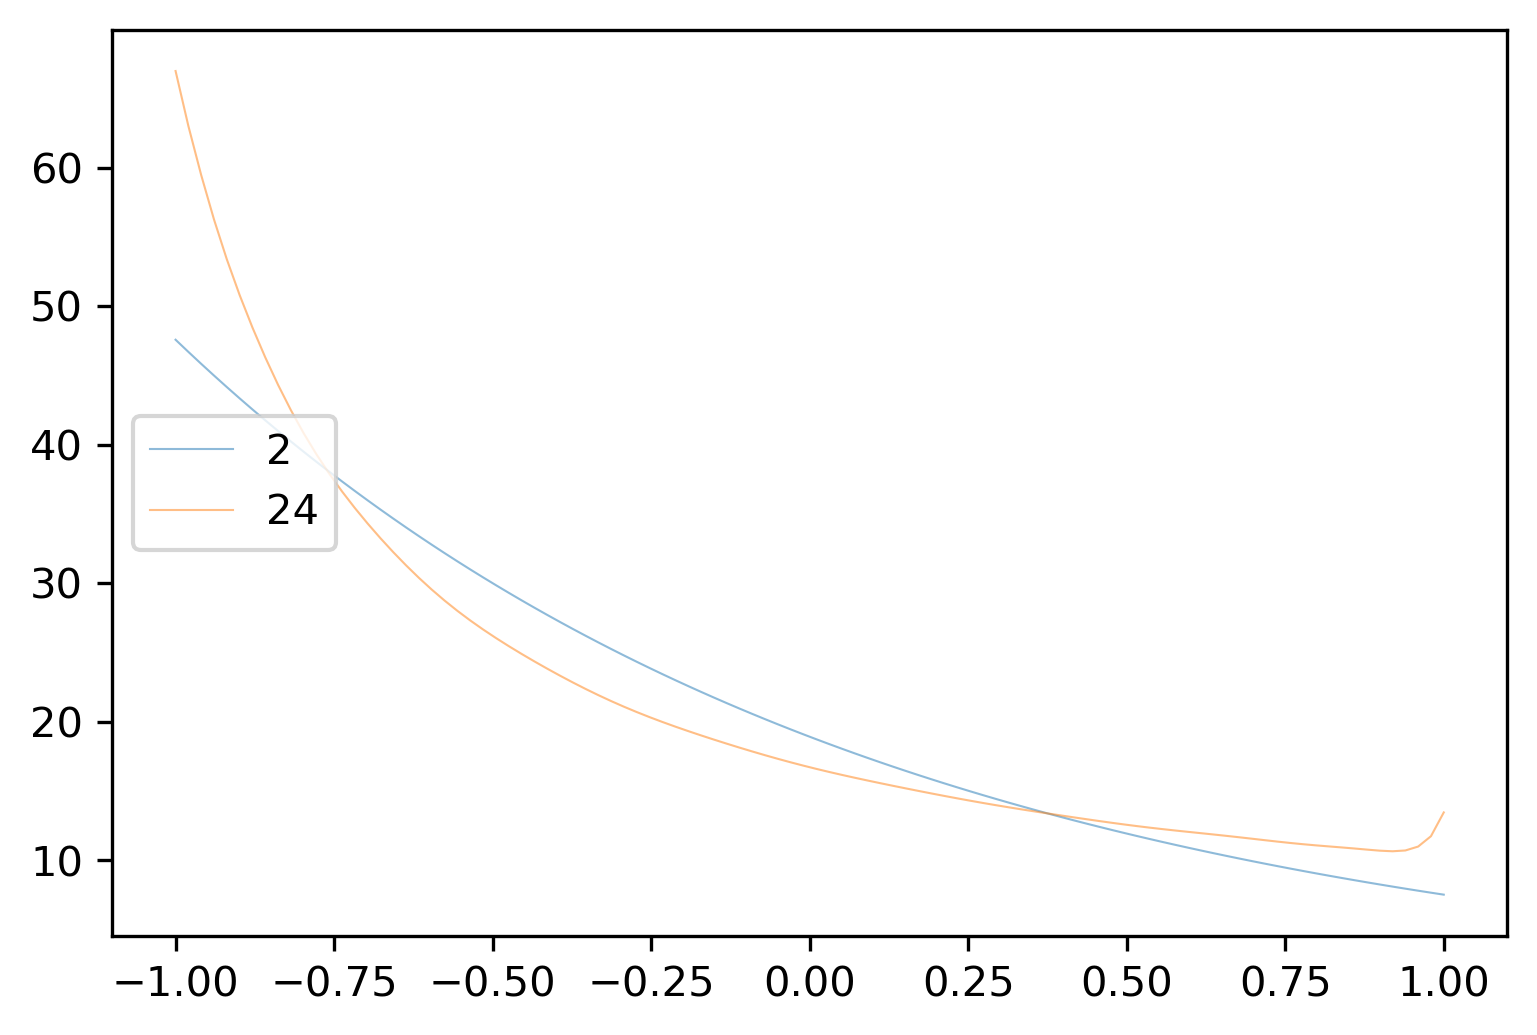

In [18]:
from numpy.polynomial import legendre as LG
plt.figure(dpi=300)
AIC = []
for i in np.arange(2,25,22):
    order = i
    h = tables.open_file('coeff_pe_1t_reflection0.00_30/file_+0.320.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(-1,1,100)
    k = LG.legval(z, eval('h.root.coeff%d[:]' % order))
    plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=0.5, linewidth=0.5)
plt.legend(loc="center left")

[]

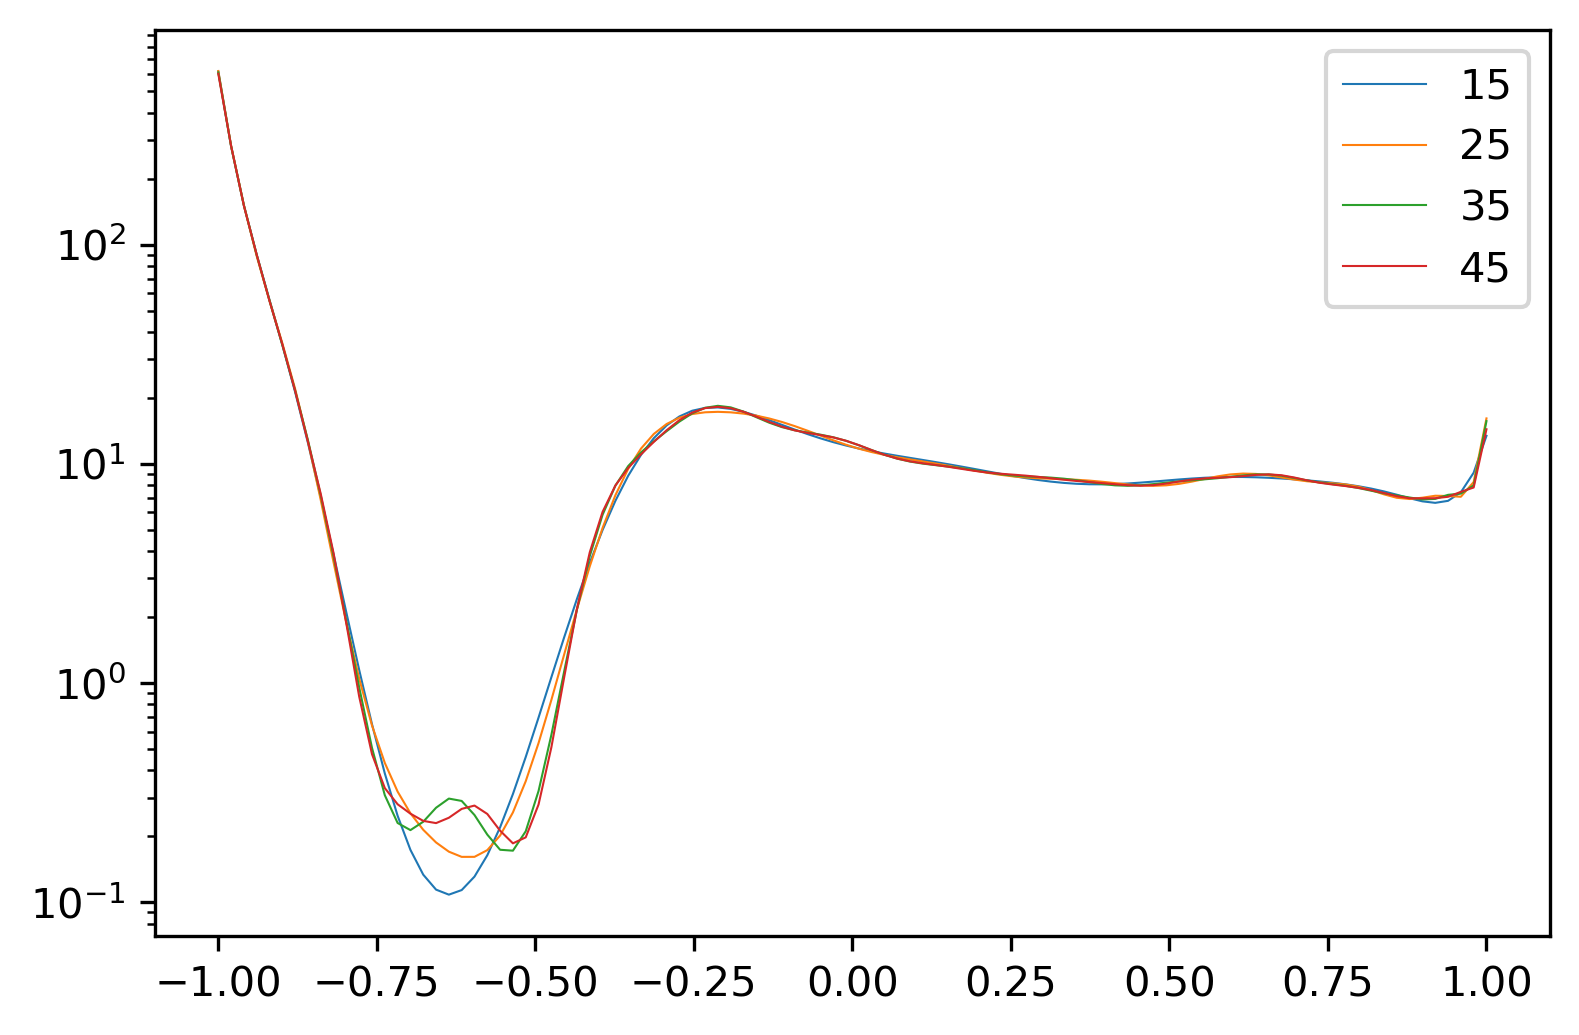

In [77]:
from numpy.polynomial import legendre as LG
plt.figure(dpi=300)
AIC = []
for i in np.arange(15,49,10):
    order = i
    h = tables.open_file('coeff_pe_1t_reflection0.00_50/file_+0.620.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(-1,1,100)
    k = LG.legval(z, eval('h.root.coeff%d[:]' % order))
    plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
plt.legend()
plt.semilogy()

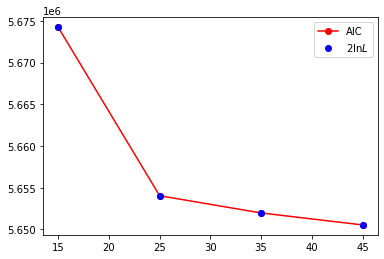

In [43]:
x = np.array((5674231.366371776, 5654040.225595552, 5651973.952609891, 5650540.483824864))
y = np.array((15,25,35,45))
plt.plot(y, x,'r-o',label='AIC')
plt.plot(y, x,'bo', label=r'2$\ln L$')
plt.legend()

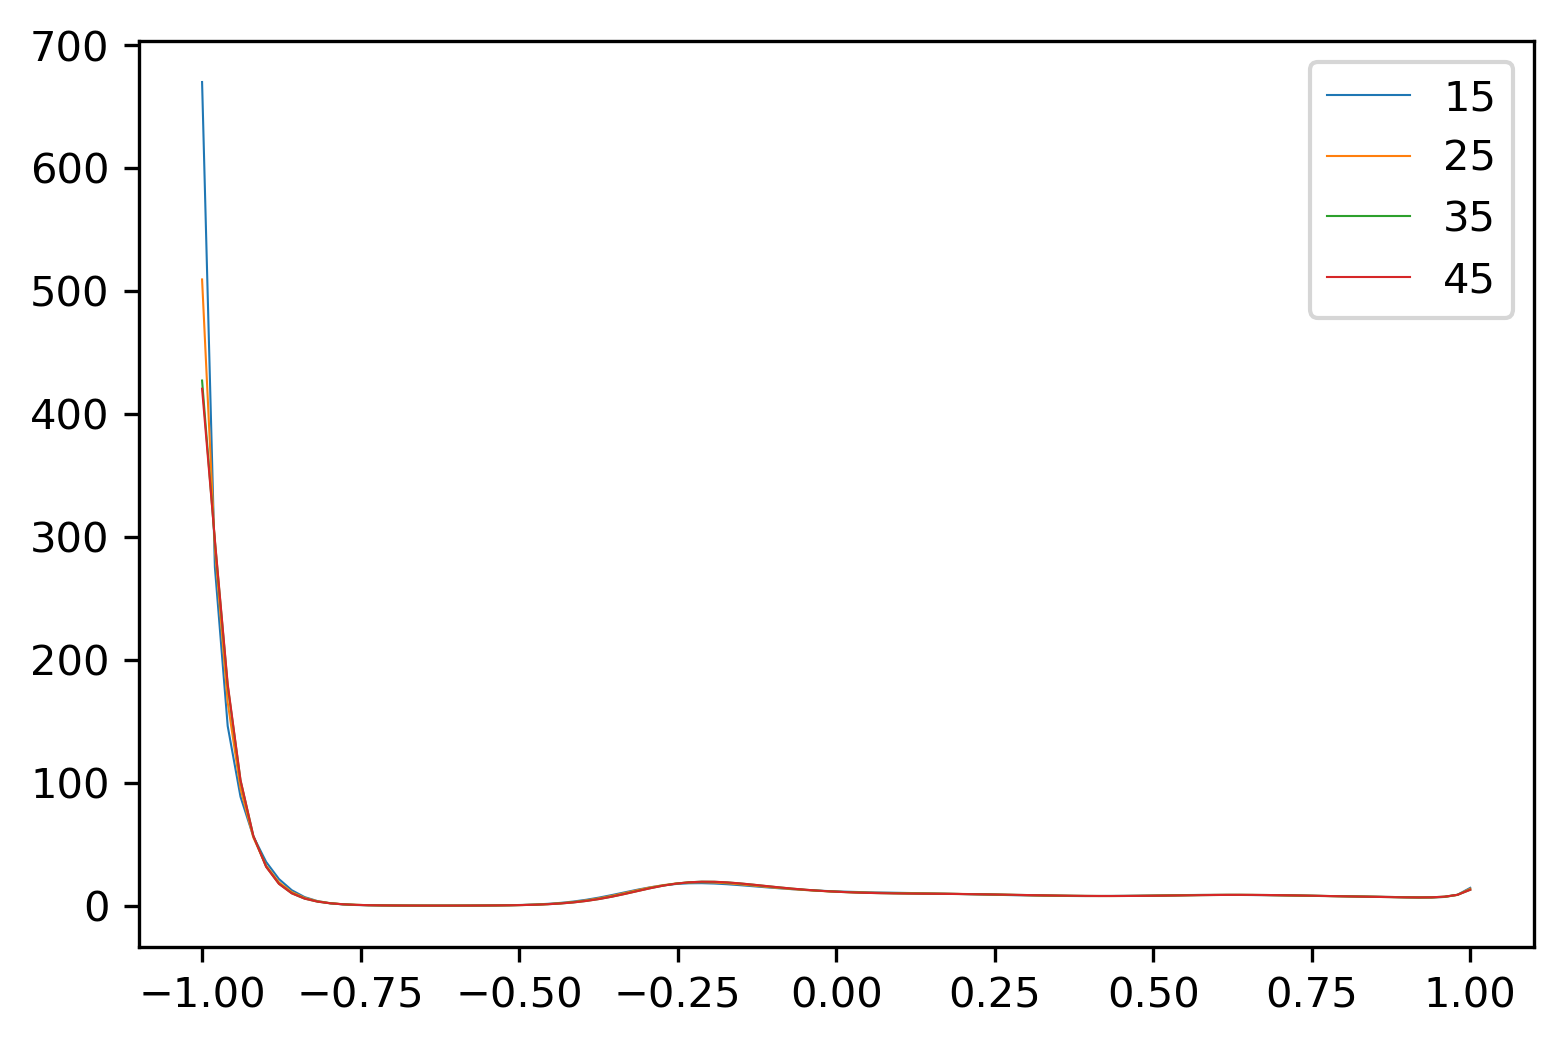

In [44]:
from numpy.polynomial import legendre as LG
plt.figure(dpi=300)
AIC = []
for i in np.arange(15,49,10):
    order = i
    h = tables.open_file('coeff_pe_1t_reflection0.00_50/file_+0.620.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(-1,1,100)
    k = LG.legval(z, eval('h.root.coeff%d[:][0:14]' % order))
    plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
plt.legend()

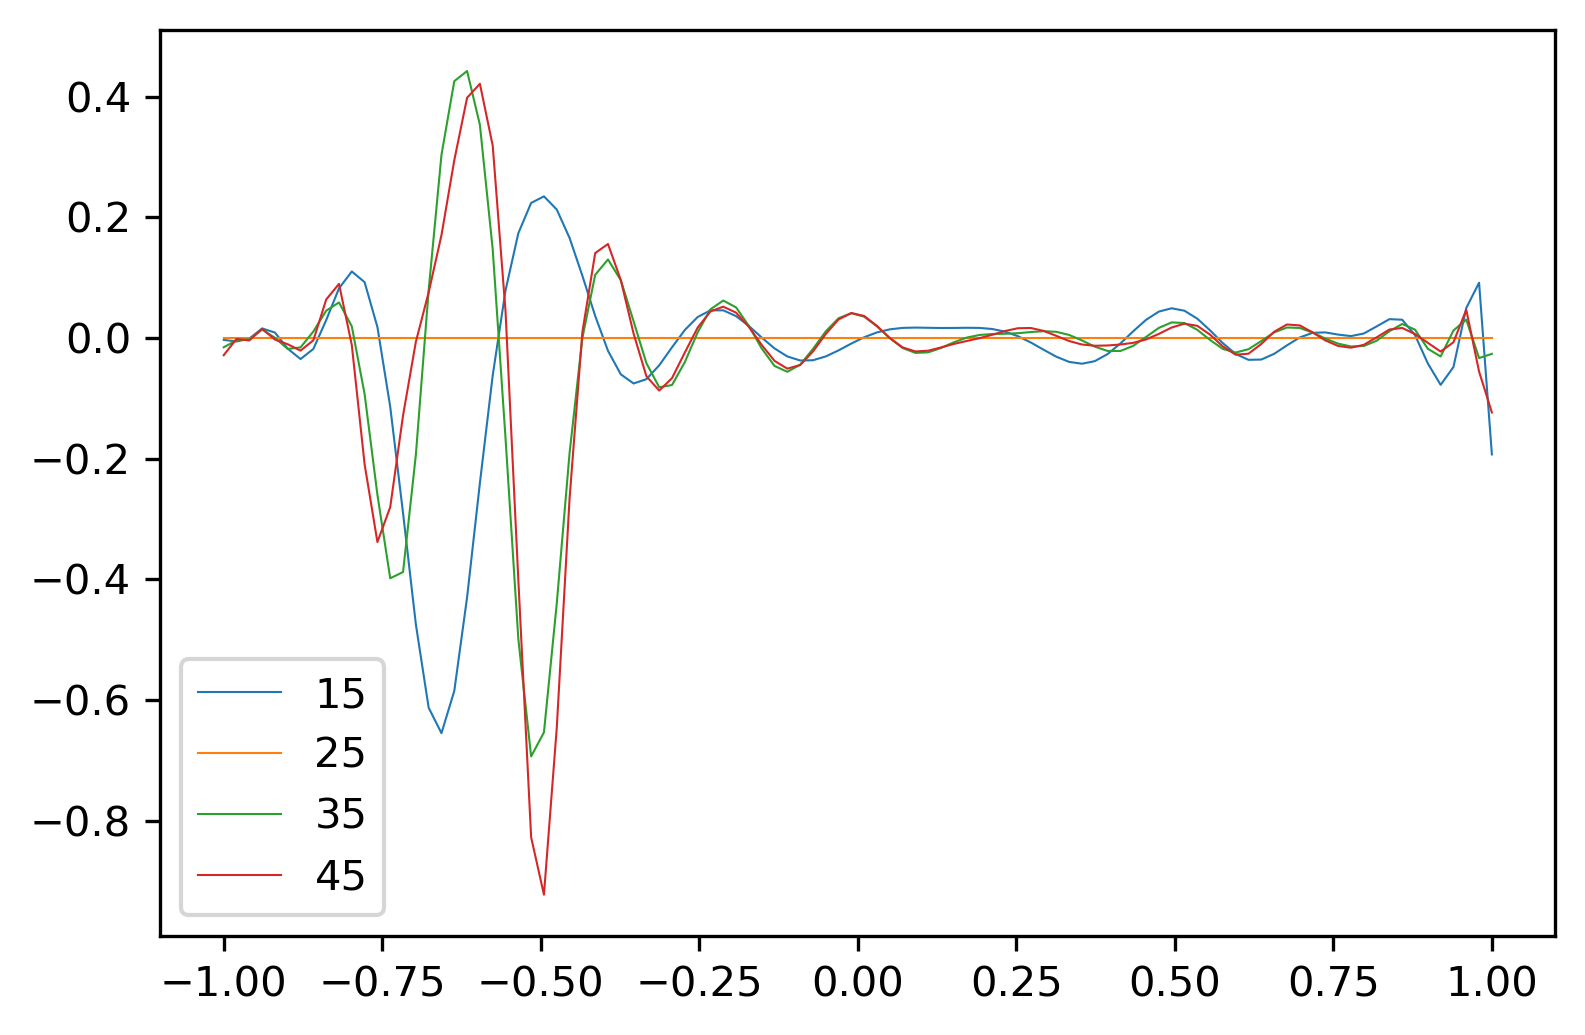

In [69]:
from numpy.polynomial import legendre as LG
plt.figure(dpi=300)
AIC = []
for i in np.arange(15,49,10):
    order = i
    h = tables.open_file('test.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(-1,1,100)
    k = LG.legval(z, eval('h.root.coeff%d[:]' % order))
    tmp =  LG.legval(z, eval('h.root.coeff%d[:]' % 25))
    #plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
    #plt.plot(z[-1::-1],np.exp(k) - np.exp(tmp), label =f'{order}', alpha=1, linewidth=0.5)
    plt.plot(z[-1::-1],(np.exp(k) - np.exp(tmp))/np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
plt.legend()

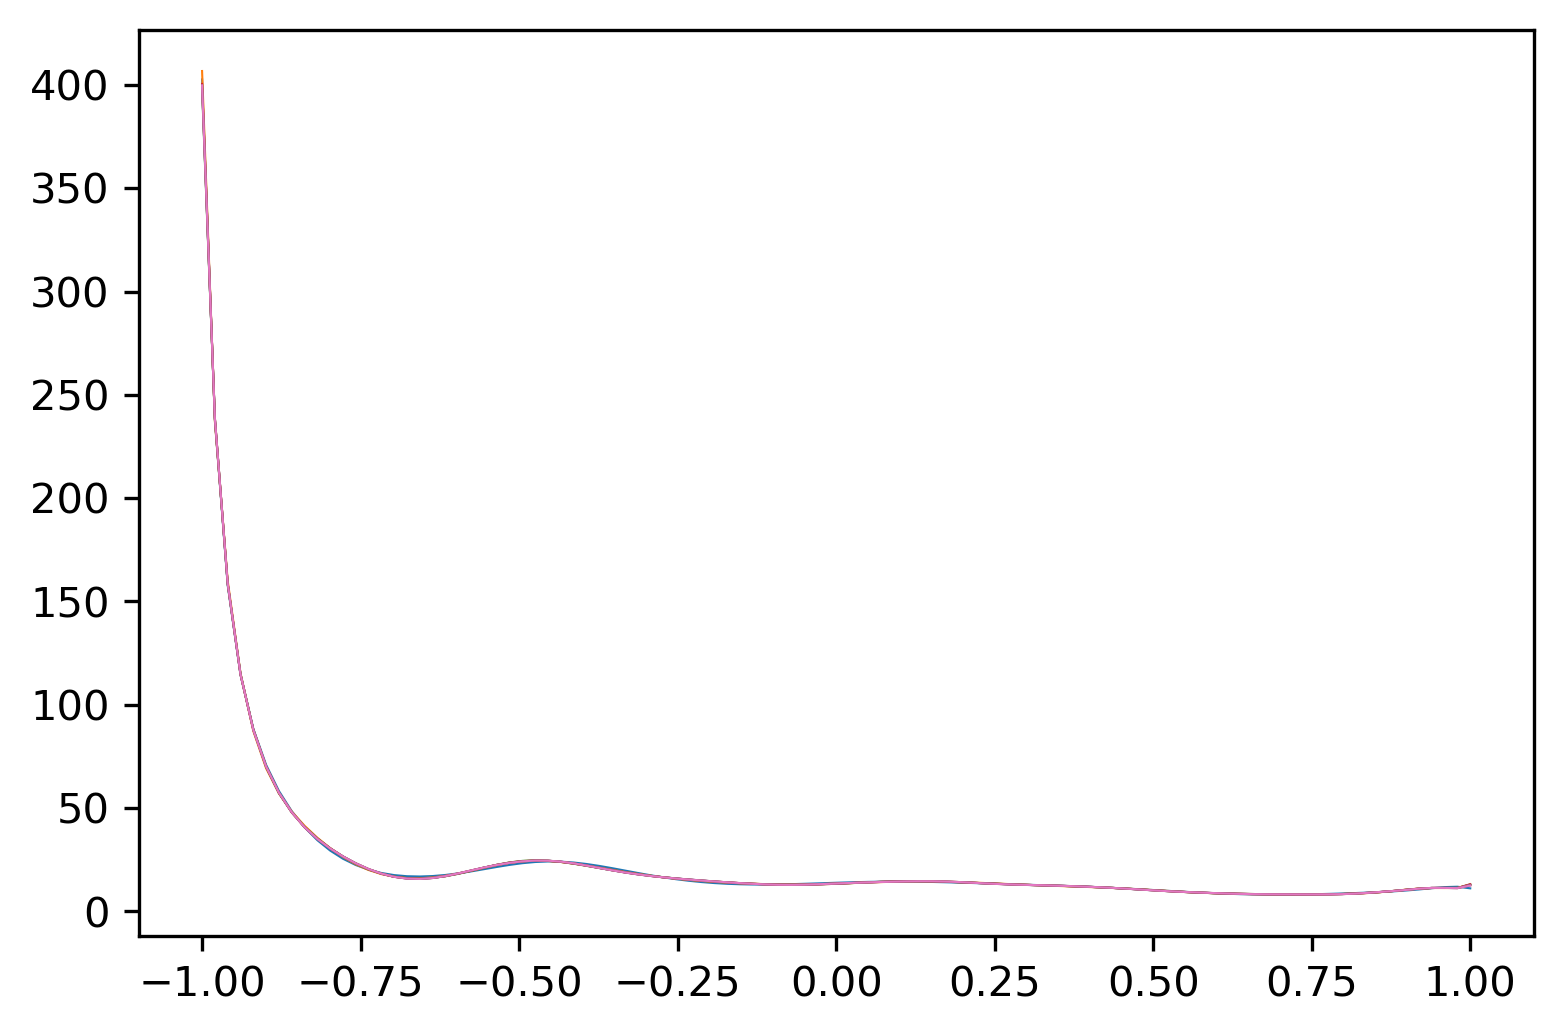

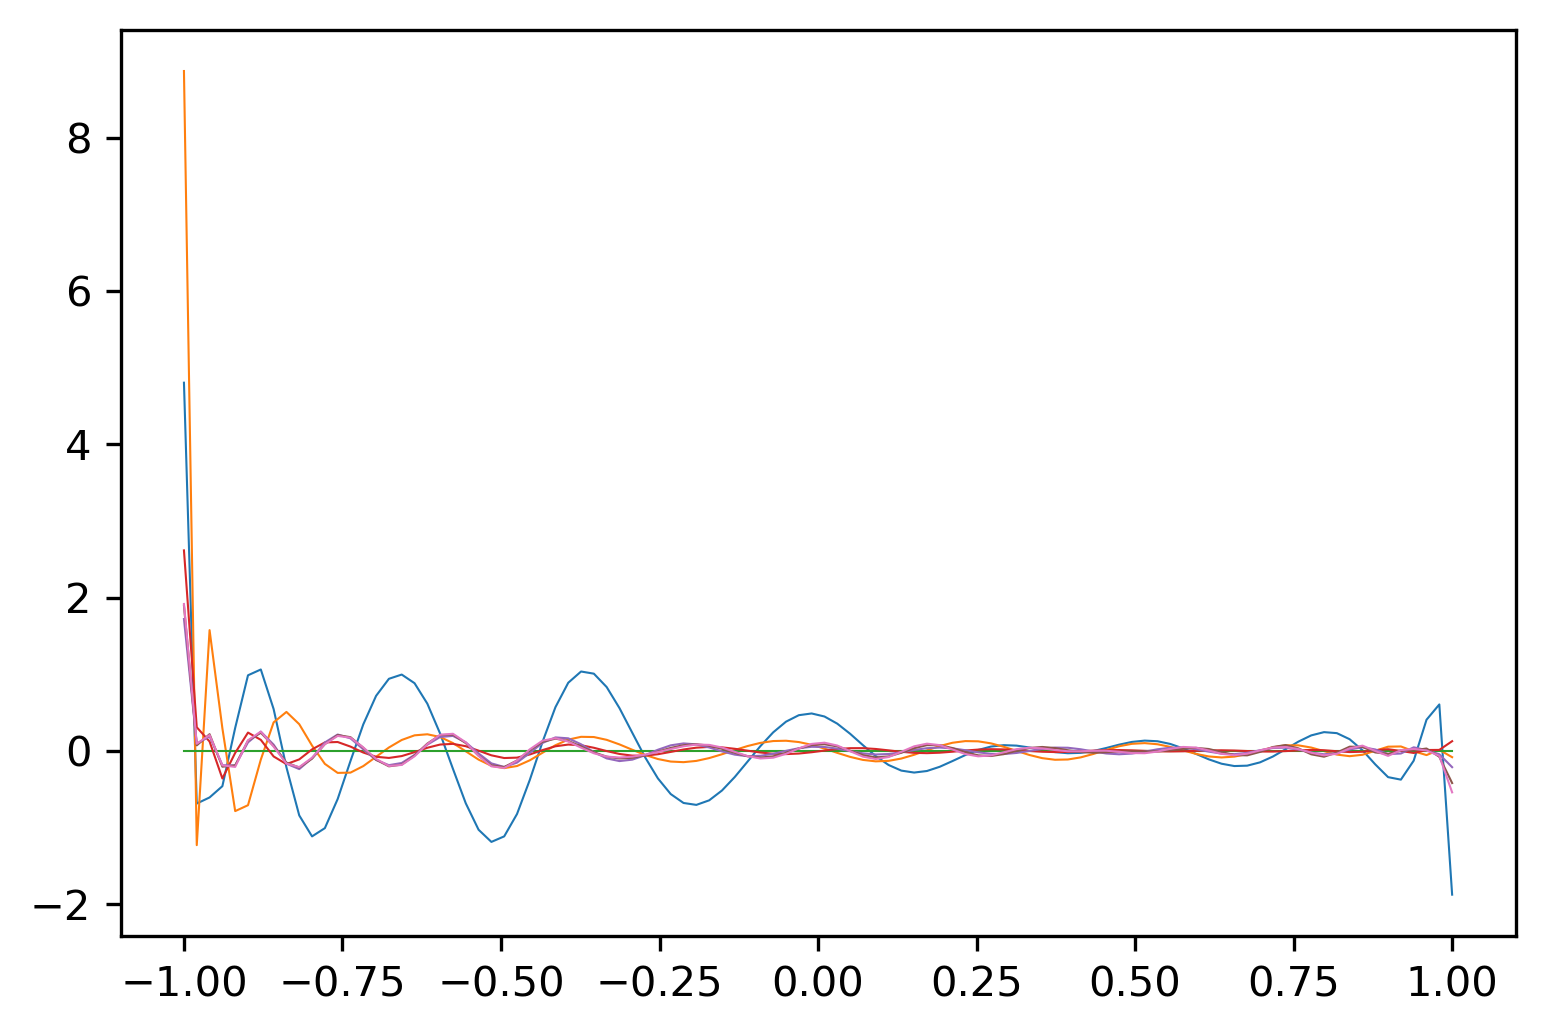

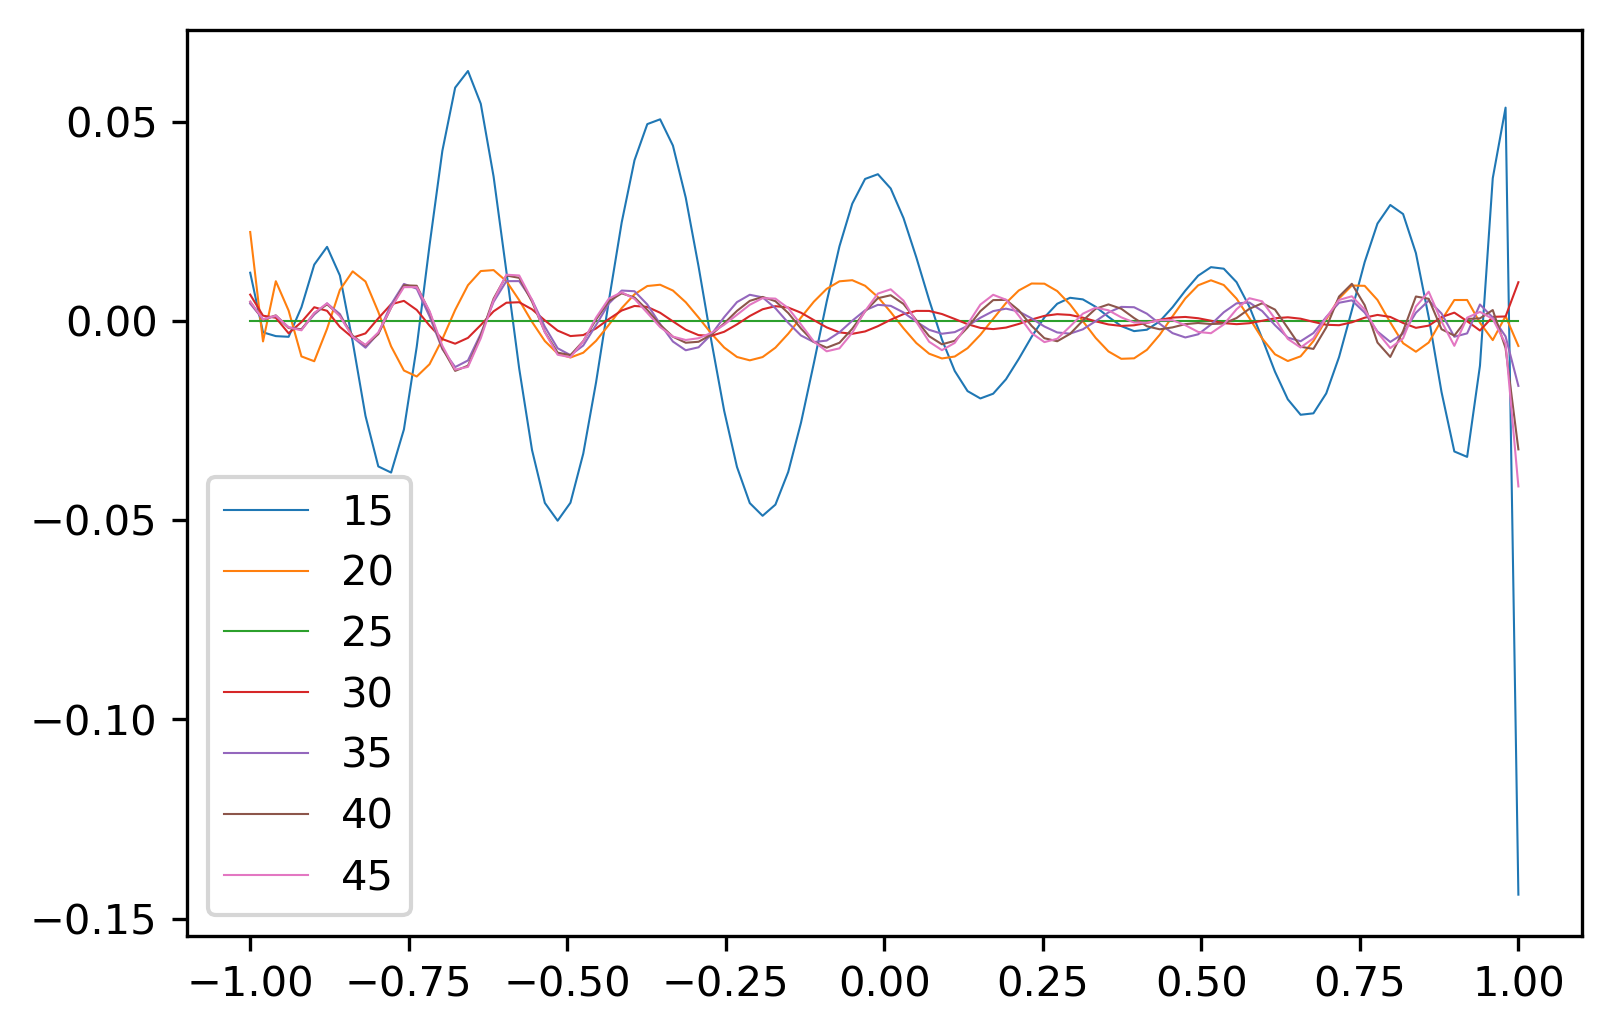

In [75]:
from numpy.polynomial import legendre as LG
plt.figure(1,dpi=300)
plt.figure(2,dpi=300)
plt.figure(3,dpi=300)
AIC = []
for i in np.arange(15,49,5):
    order = i
    h = tables.open_file('coeff_pe_1t_reflection0.00_50/file_+0.580.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(-1,1,100)
    k = LG.legval(z, eval('h.root.coeff%d[:]' % order))
    tmp = LG.legval(z, eval('h.root.coeff%d[:]' % 25))
    plt.figure(1)
    plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
    plt.figure(2)
    plt.plot(z[-1::-1],(np.exp(k) - np.exp(tmp)), label =f'{order}', alpha=1, linewidth=0.5)
    plt.figure(3)
    plt.plot(z[-1::-1],(np.exp(k) - np.exp(tmp))/np.exp(tmp), label =f'{order}', alpha=1, linewidth=0.5)
plt.legend()

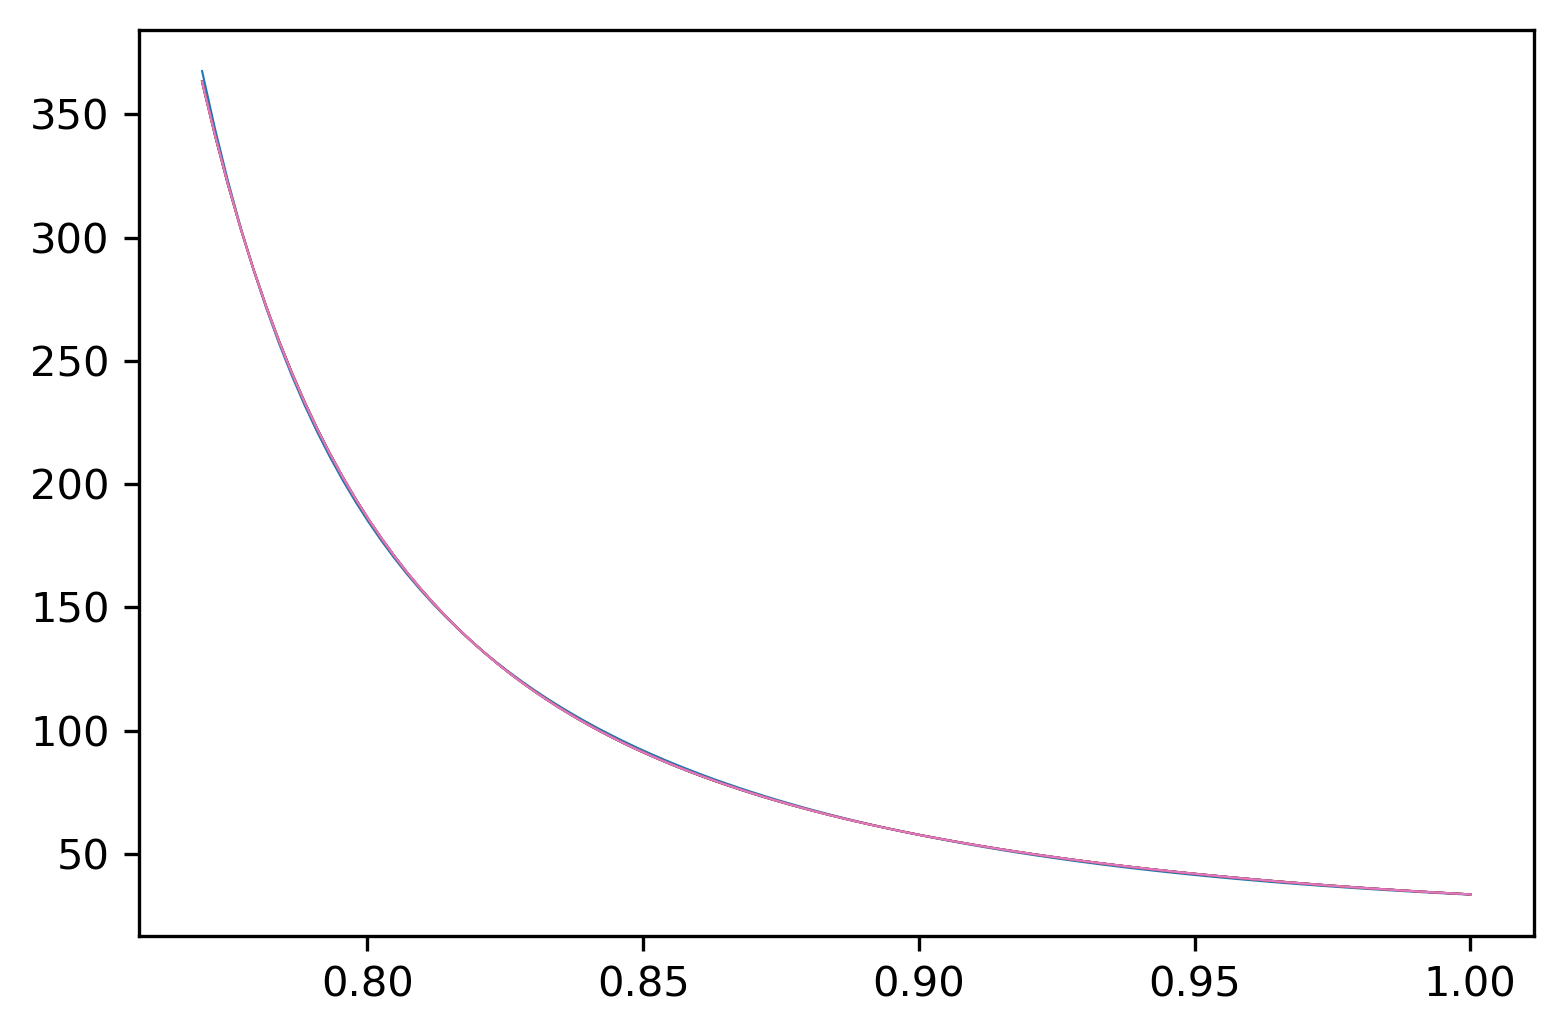

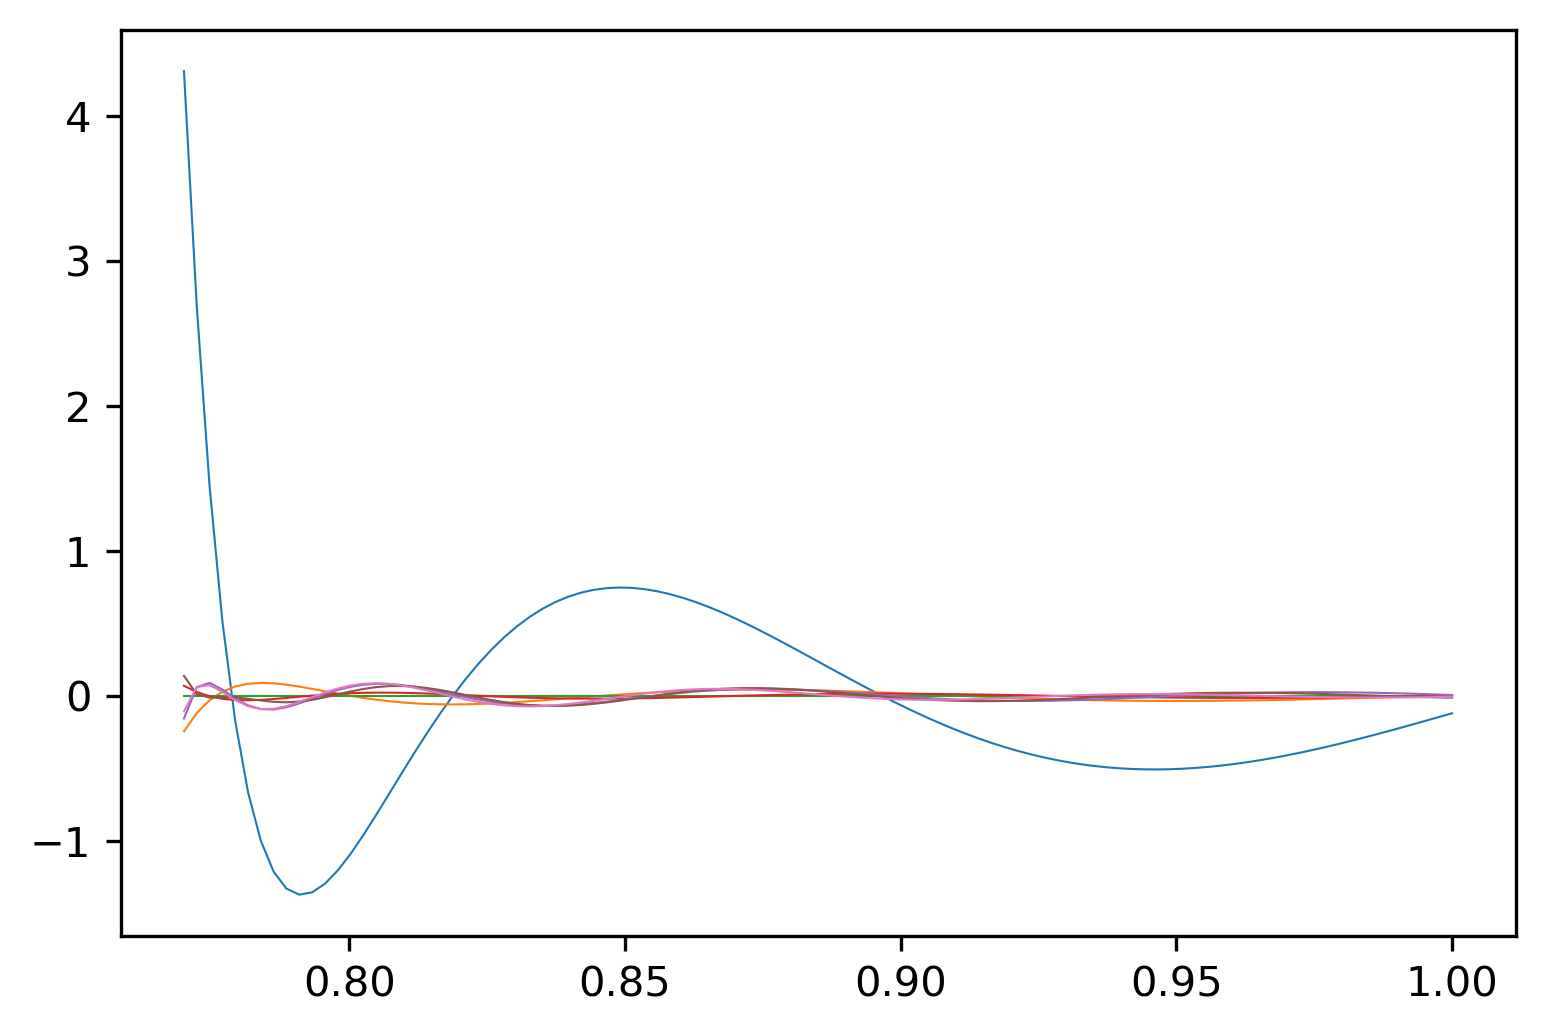

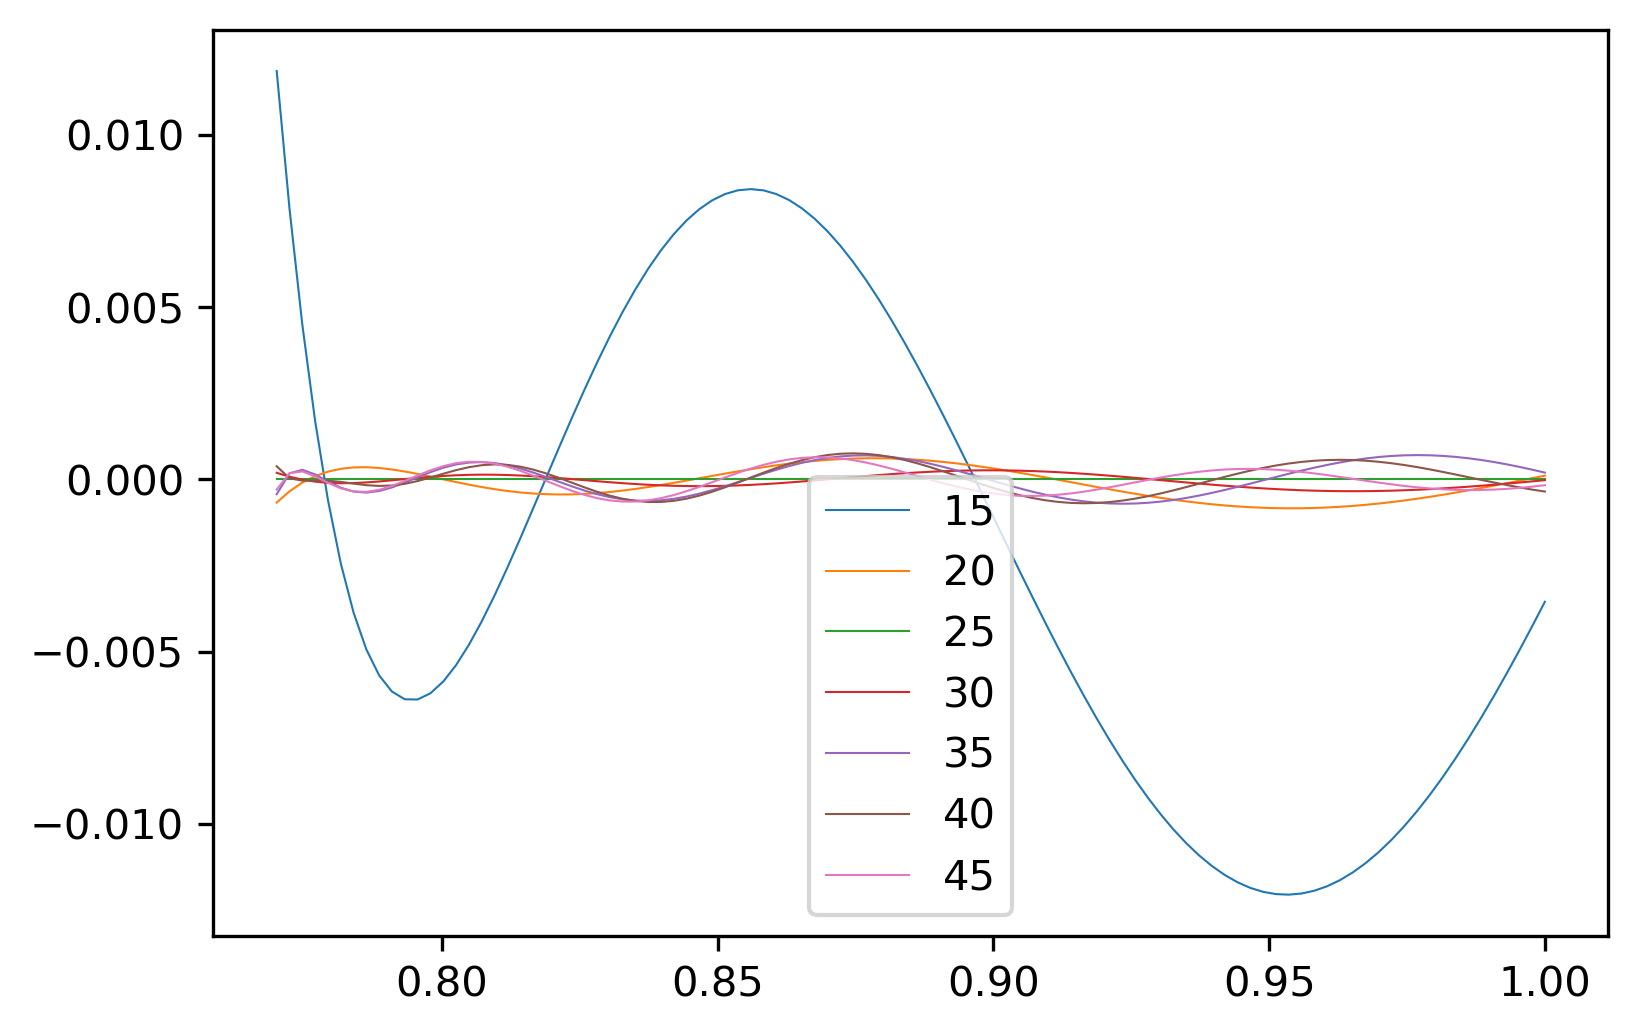

In [76]:
from numpy.polynomial import legendre as LG
plt.figure(1,dpi=300)
plt.figure(2,dpi=300)
plt.figure(3,dpi=300)
AIC = []
for i in np.arange(15,49,5):
    order = i
    h = tables.open_file('coeff_pe_1t_reflection0.00_50/file_+0.570.h5')
    AIC.append(eval('h.root.AIC%d[()]' % order))
    #print(eval('h.root.AIC%d[()]' % order)
    #print(eval('h.root.AIC%d[()]' % order)

    z = np.linspace(1, 0.77,100)
    k = LG.legval(z, eval('h.root.coeff%d[:]' % order))
    tmp = LG.legval(z, eval('h.root.coeff%d[:]' % 25))
    plt.figure(1)
    plt.plot(z[-1::-1],np.exp(k), label =f'{order}', alpha=1, linewidth=0.5)
    plt.figure(2)
    plt.plot(z[-1::-1],(np.exp(k) - np.exp(tmp)), label =f'{order}', alpha=1, linewidth=0.5)
    plt.figure(3)
    plt.plot(z[-1::-1],(np.exp(k) - np.exp(tmp))/np.exp(tmp), label =f'{order}', alpha=1, linewidth=0.5)
plt.legend()

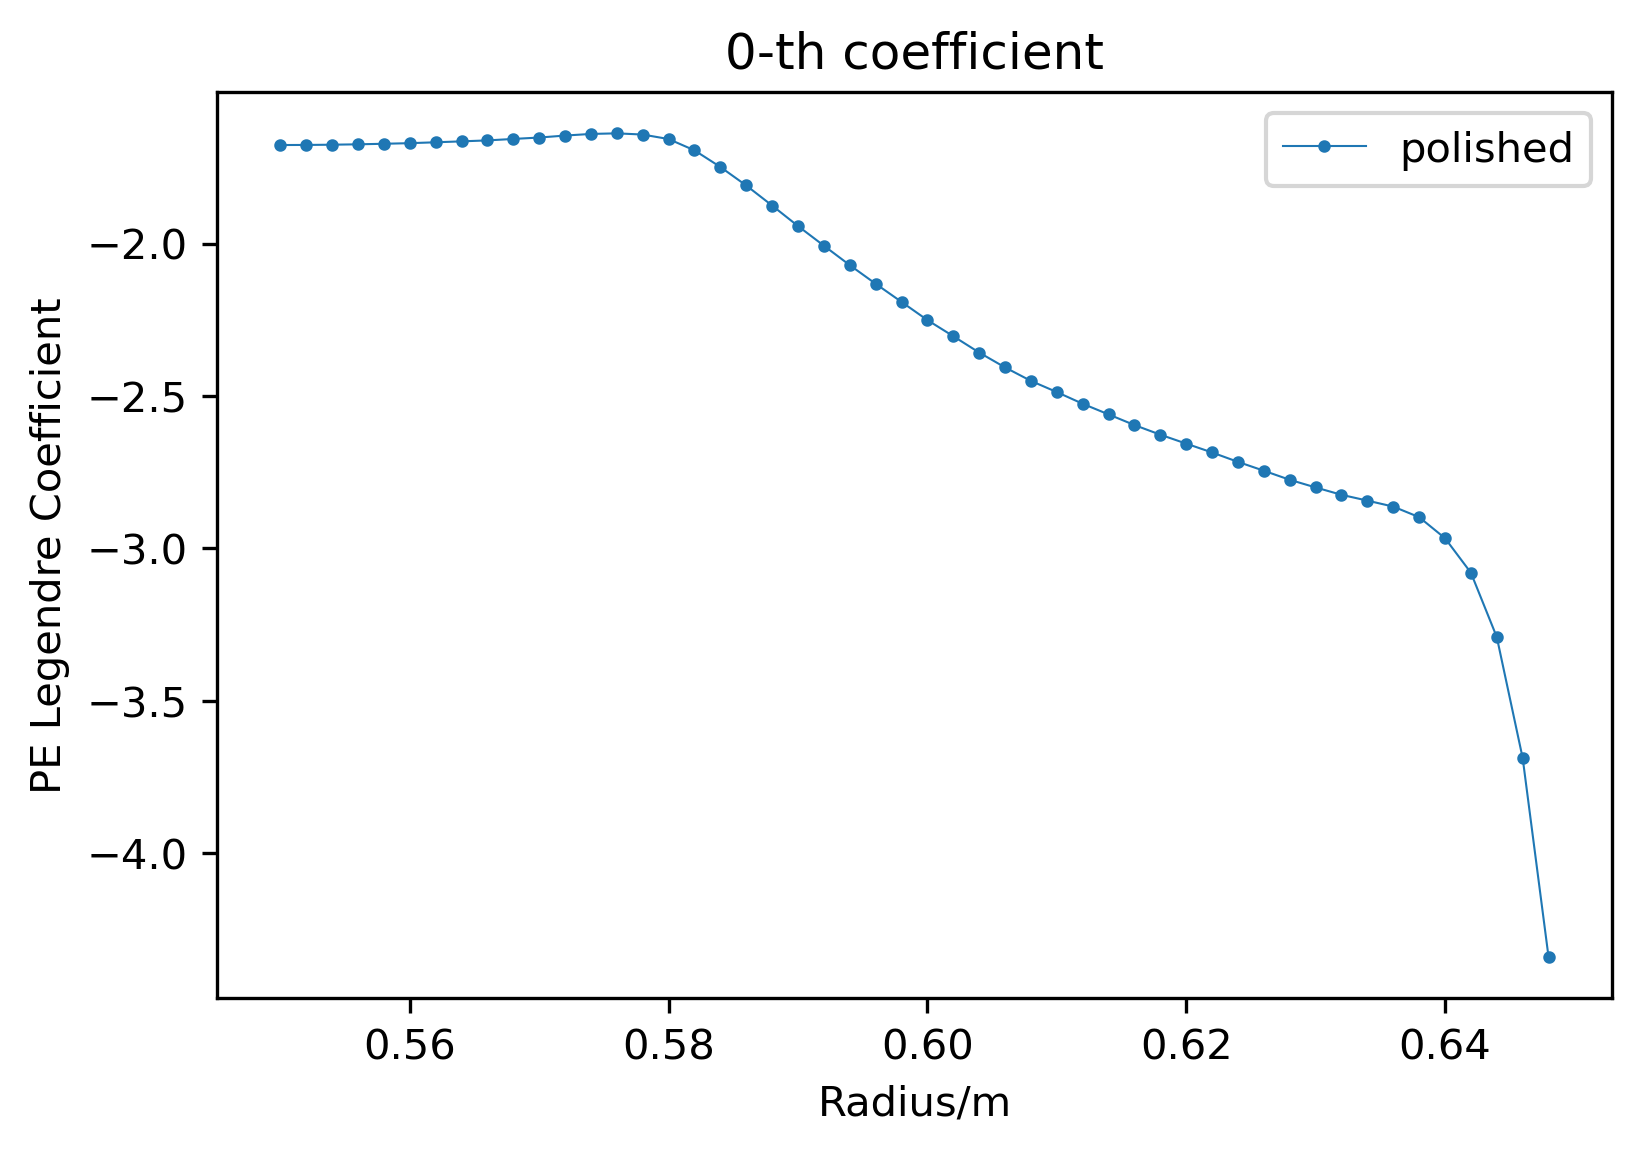

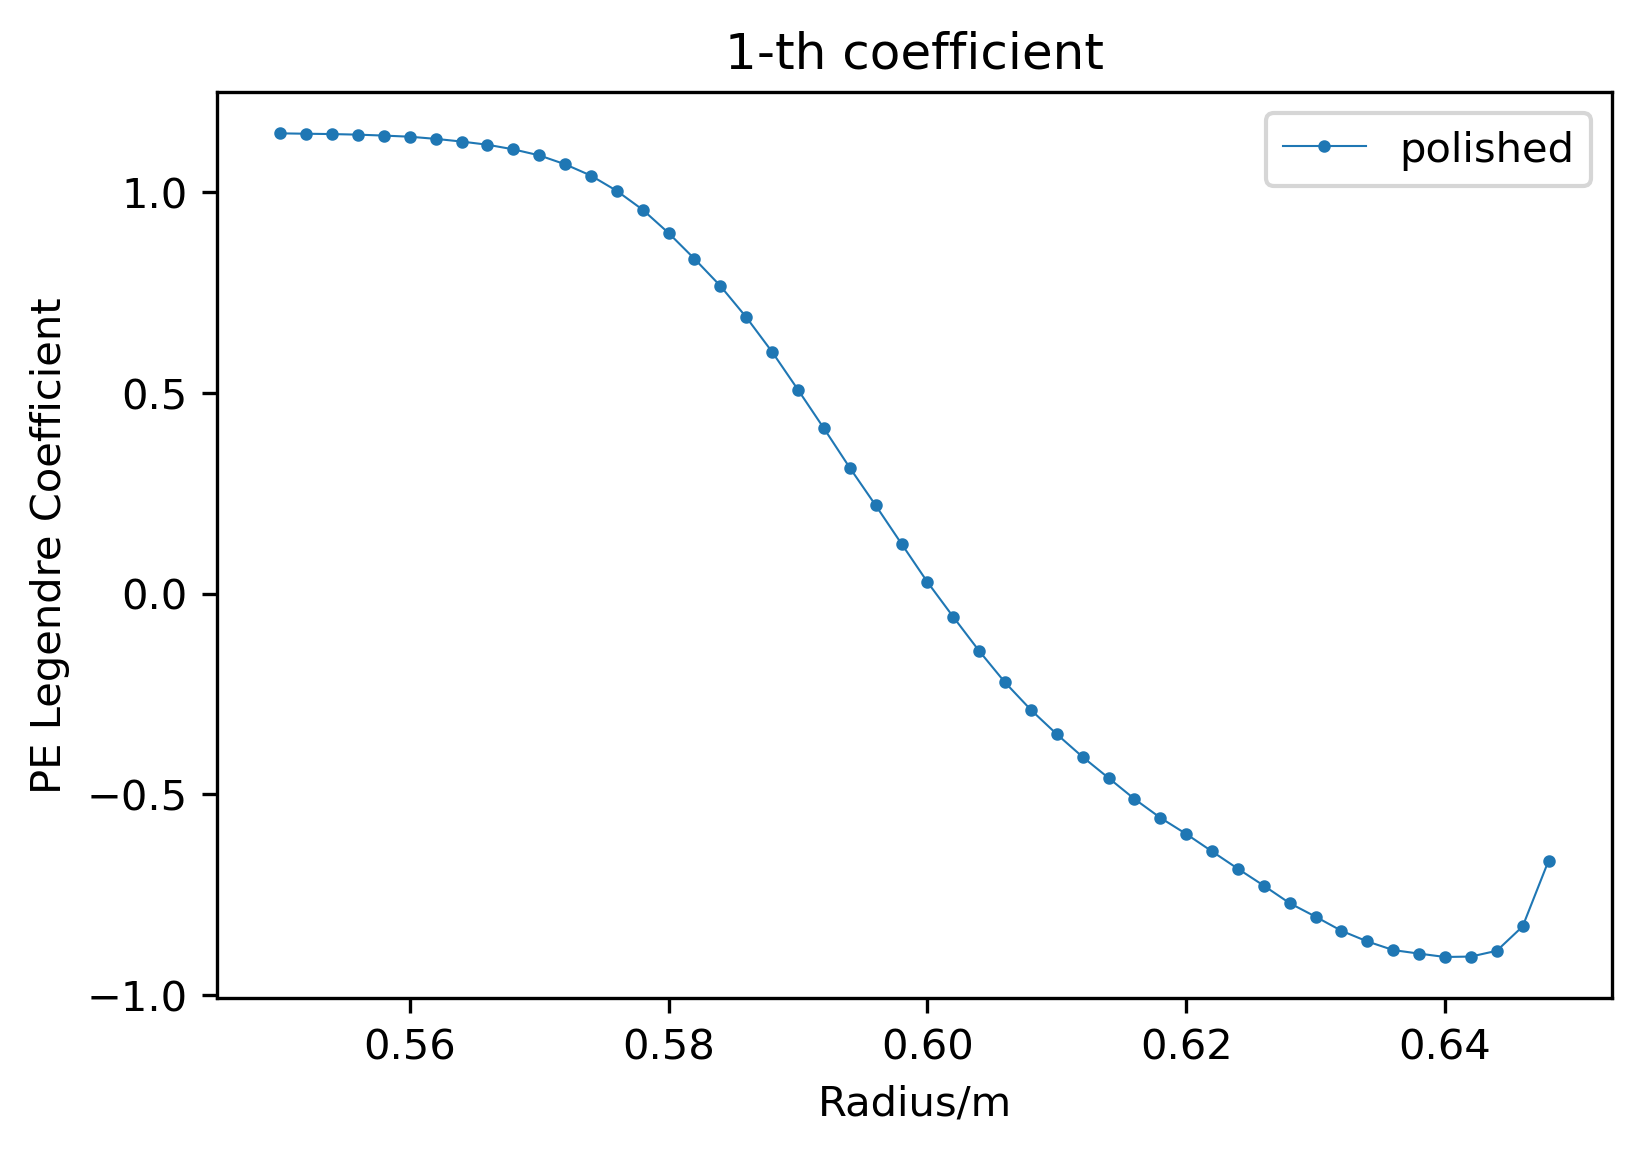

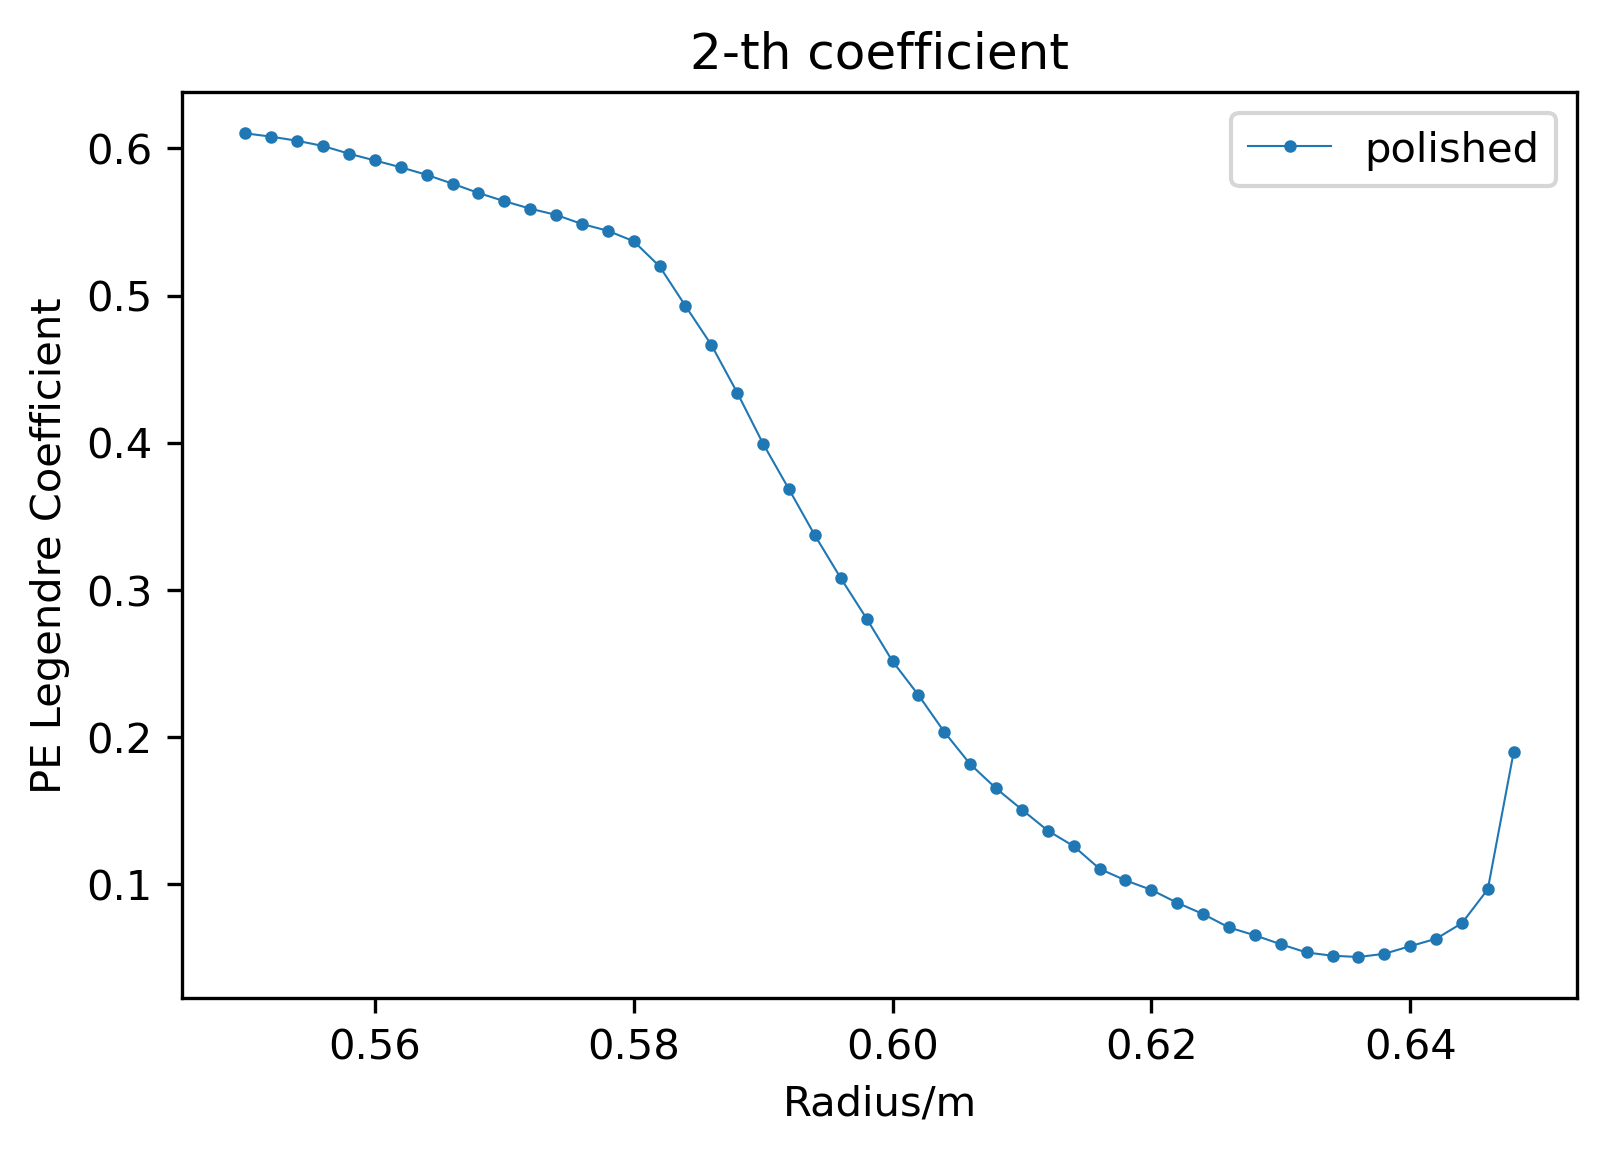

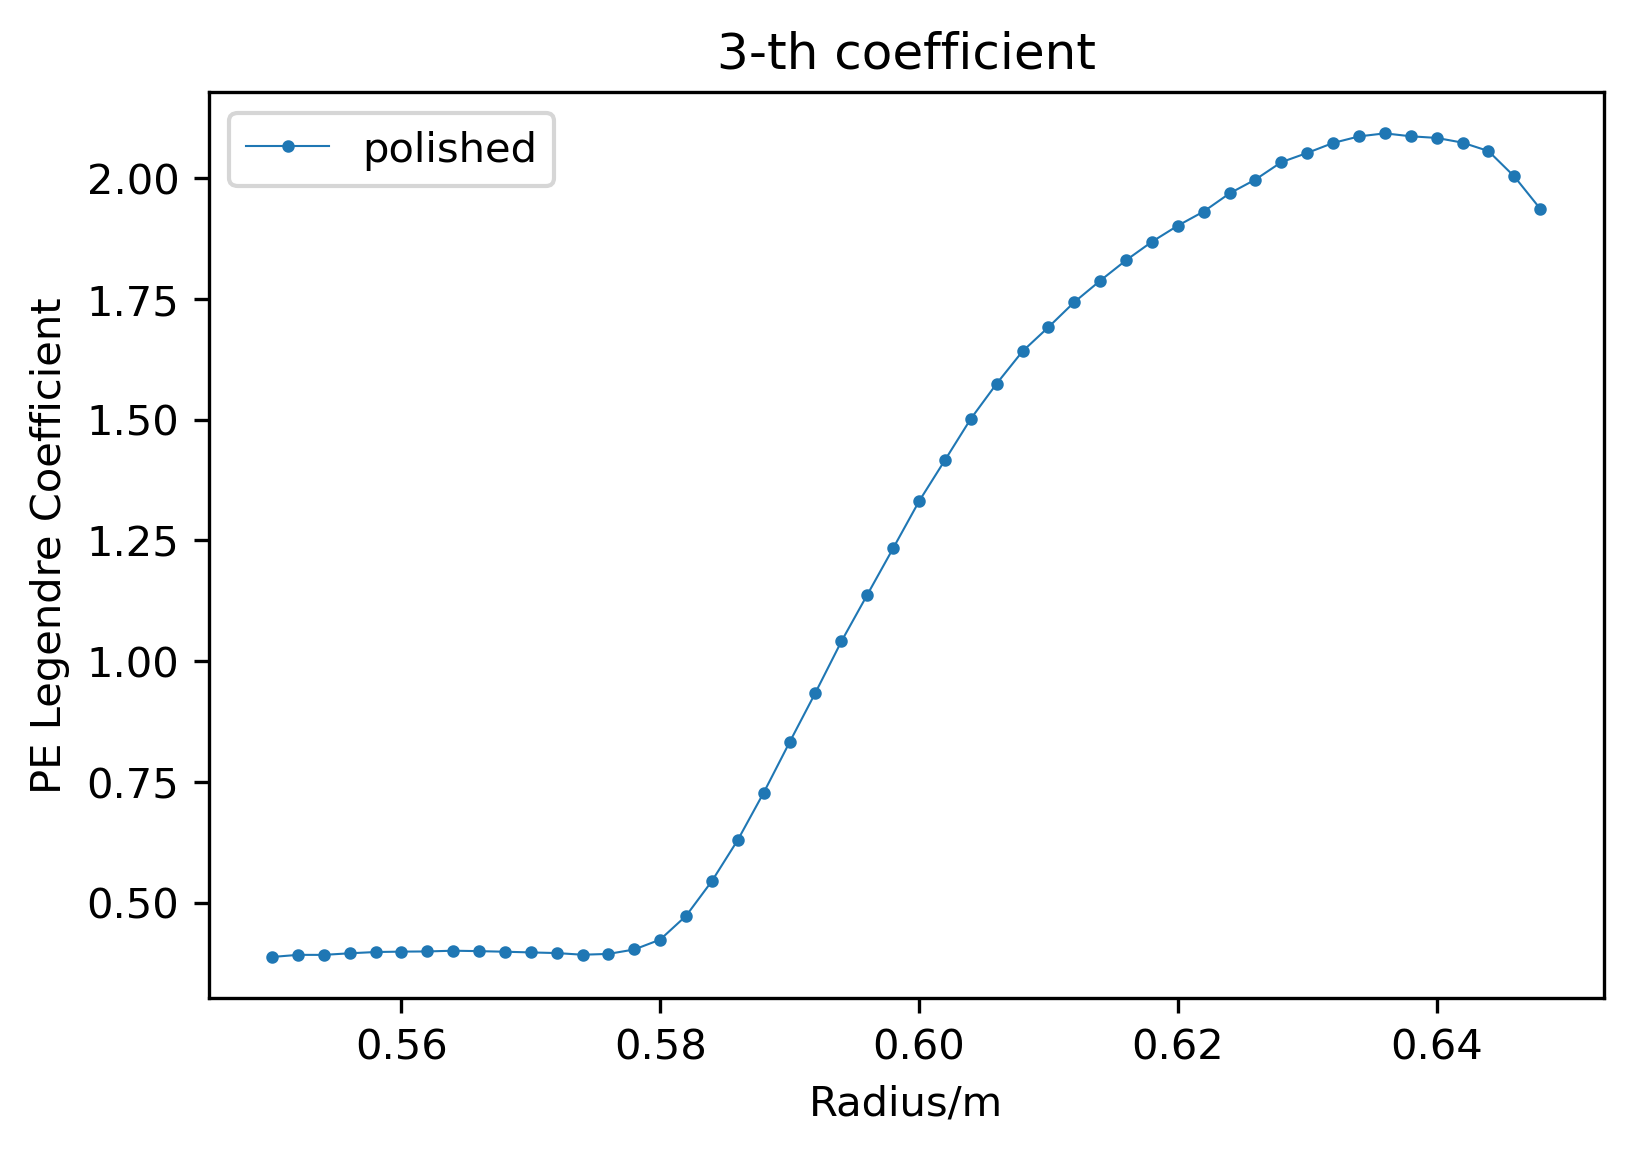

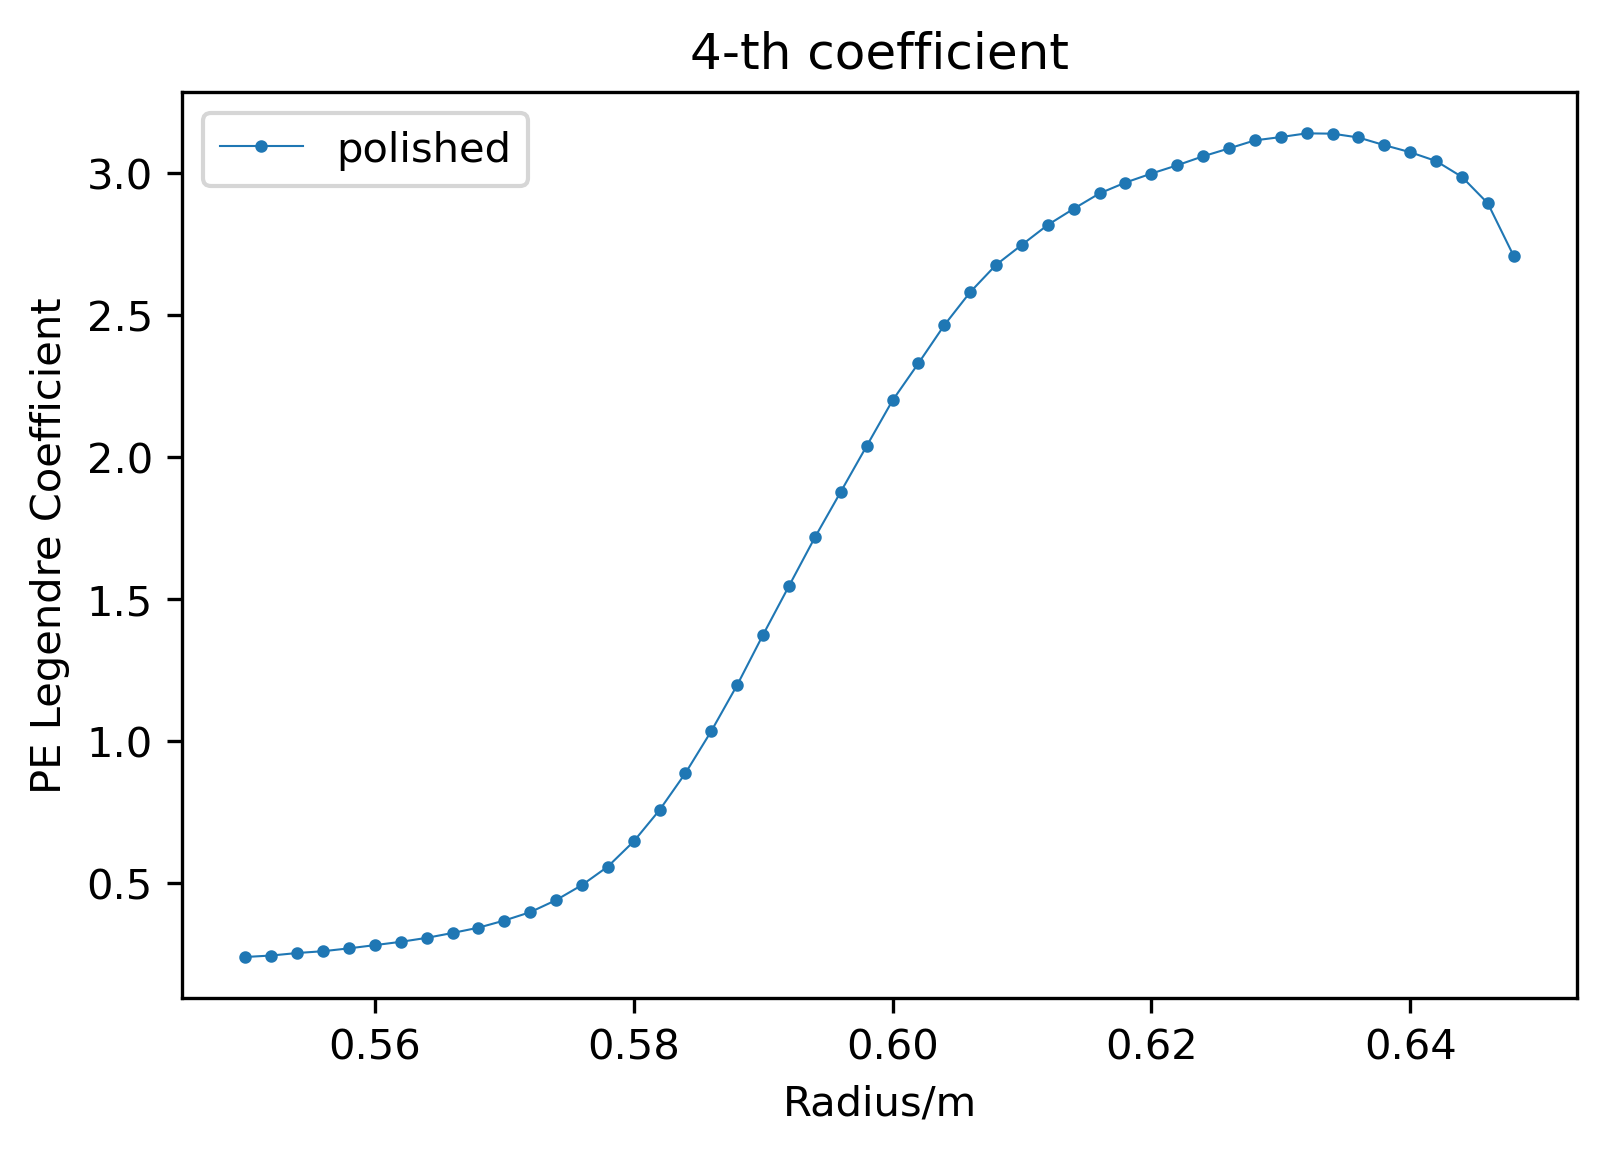

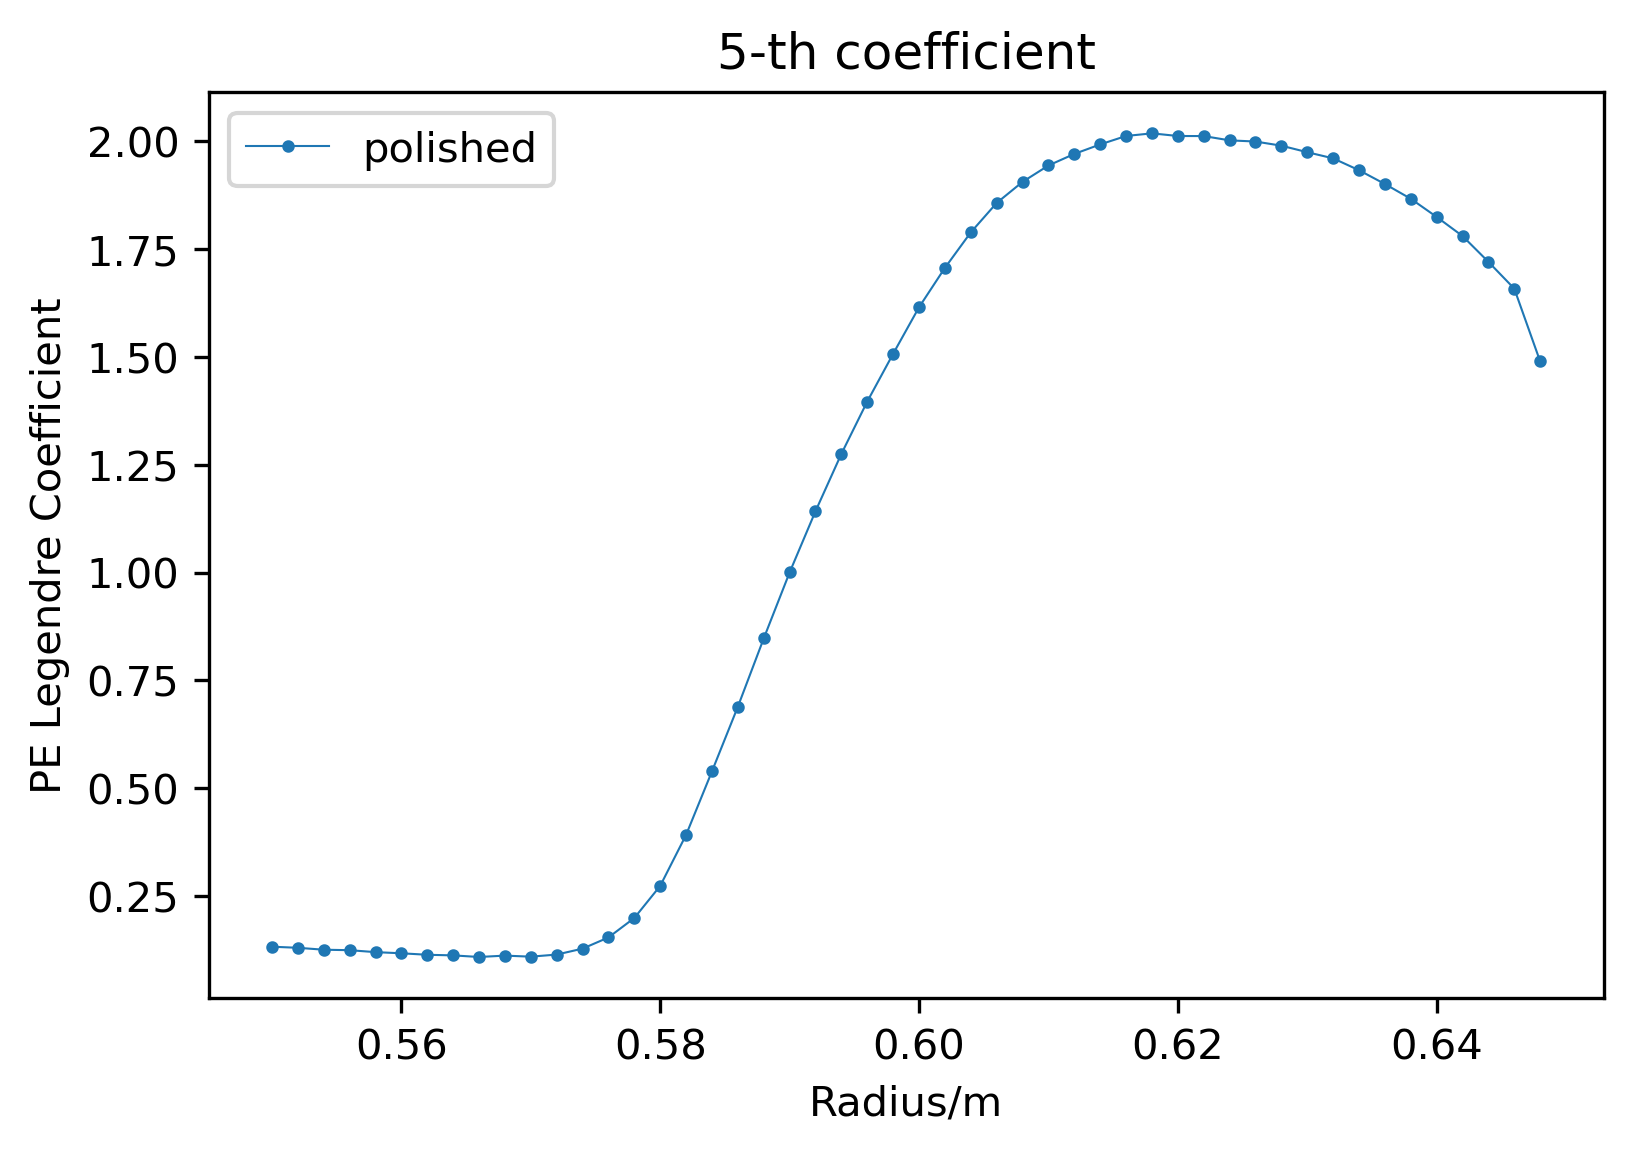

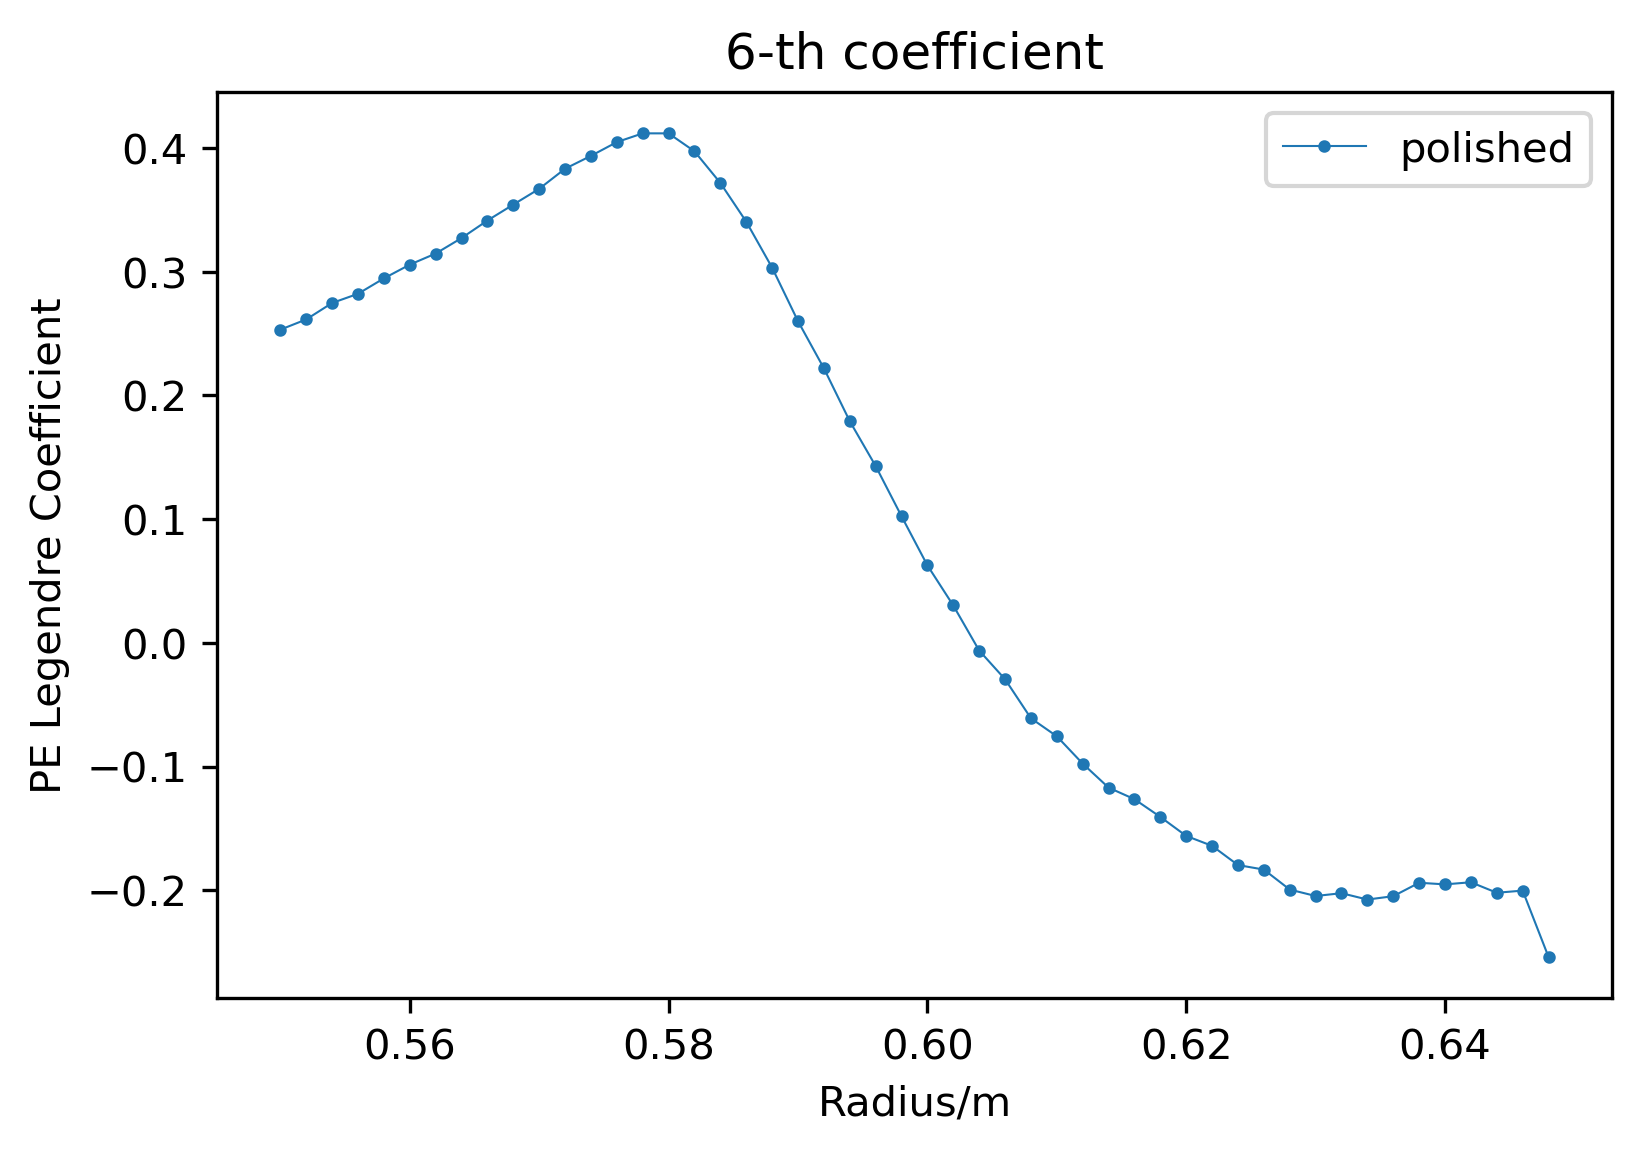

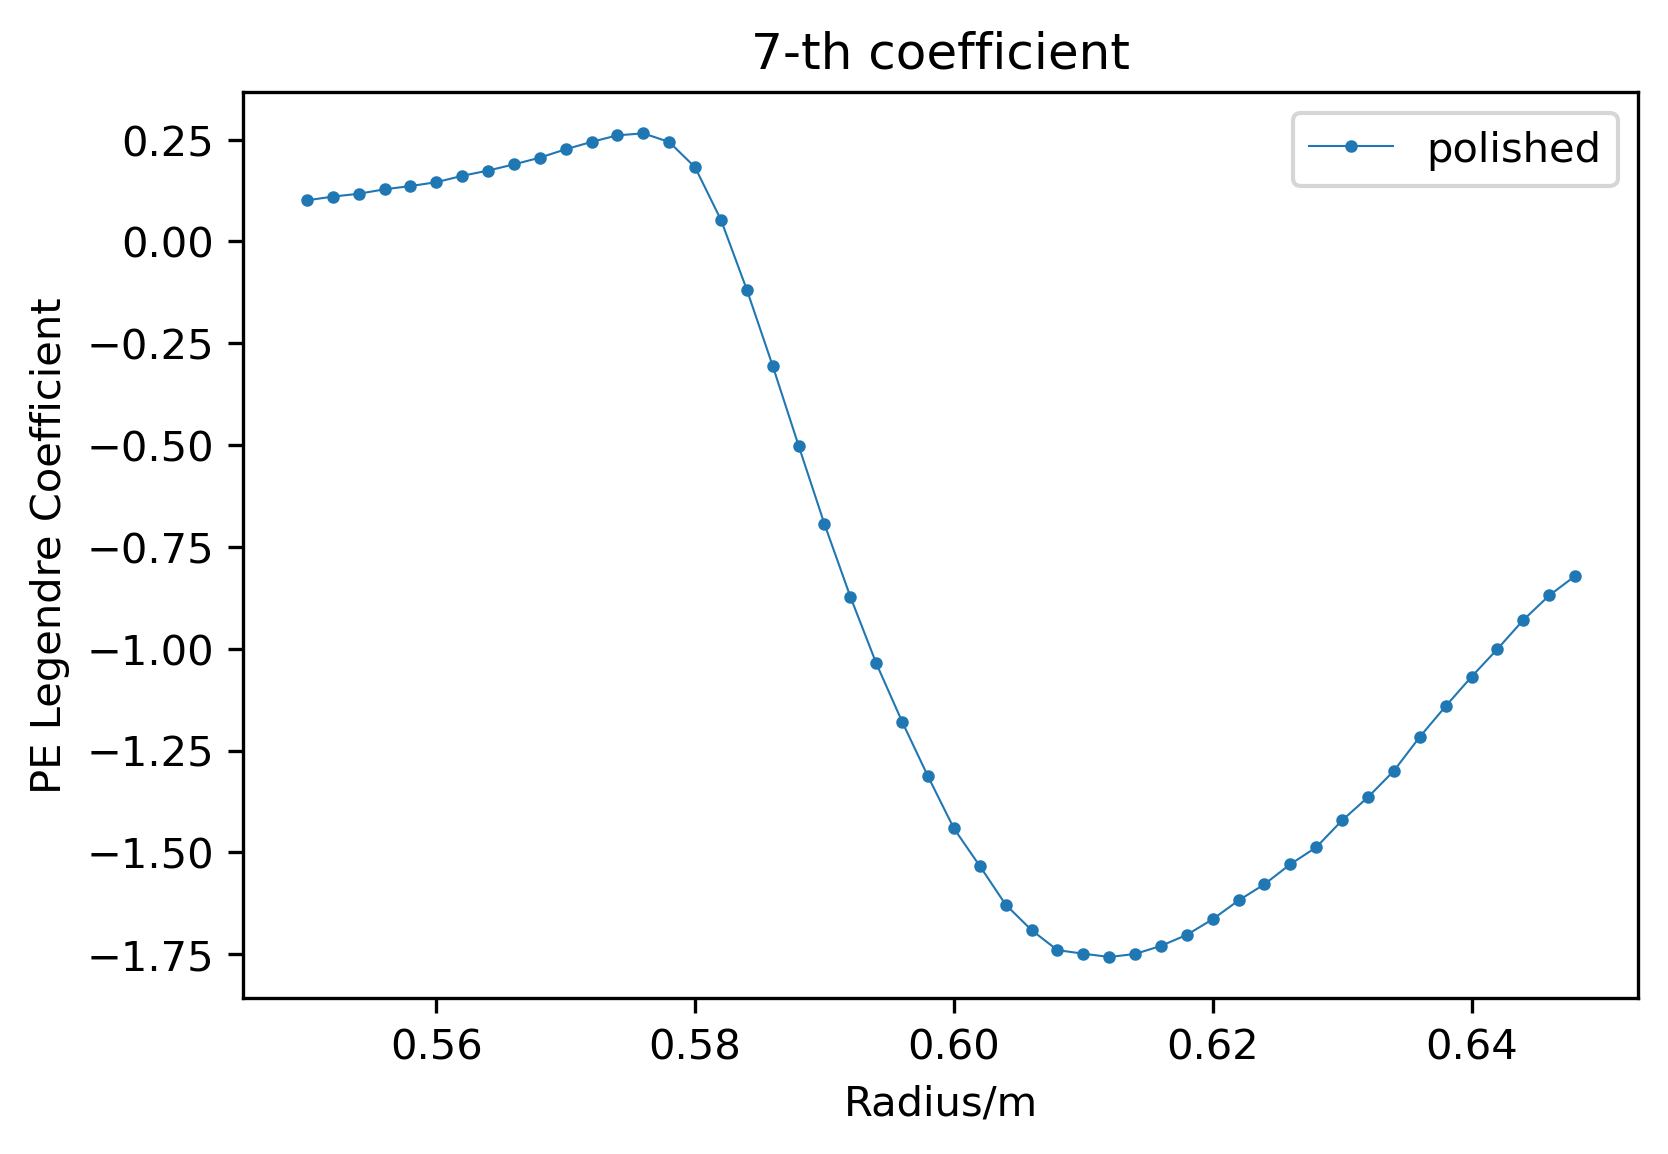

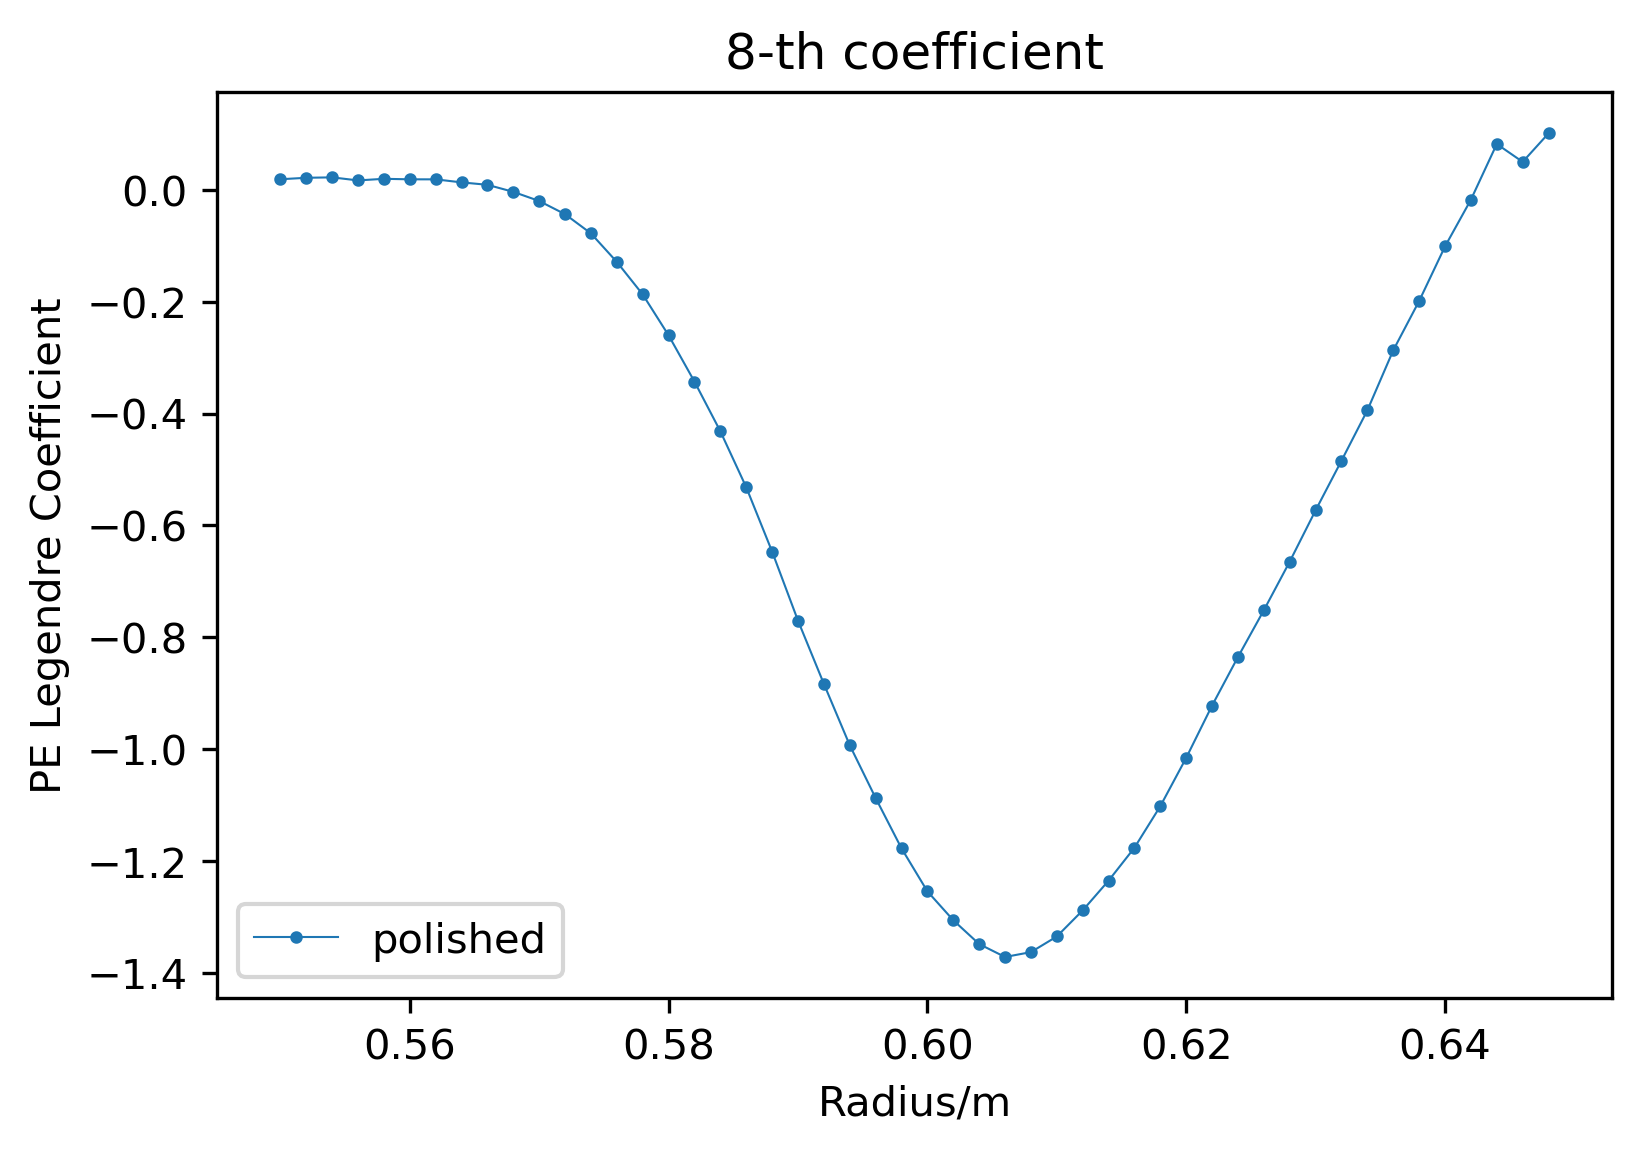

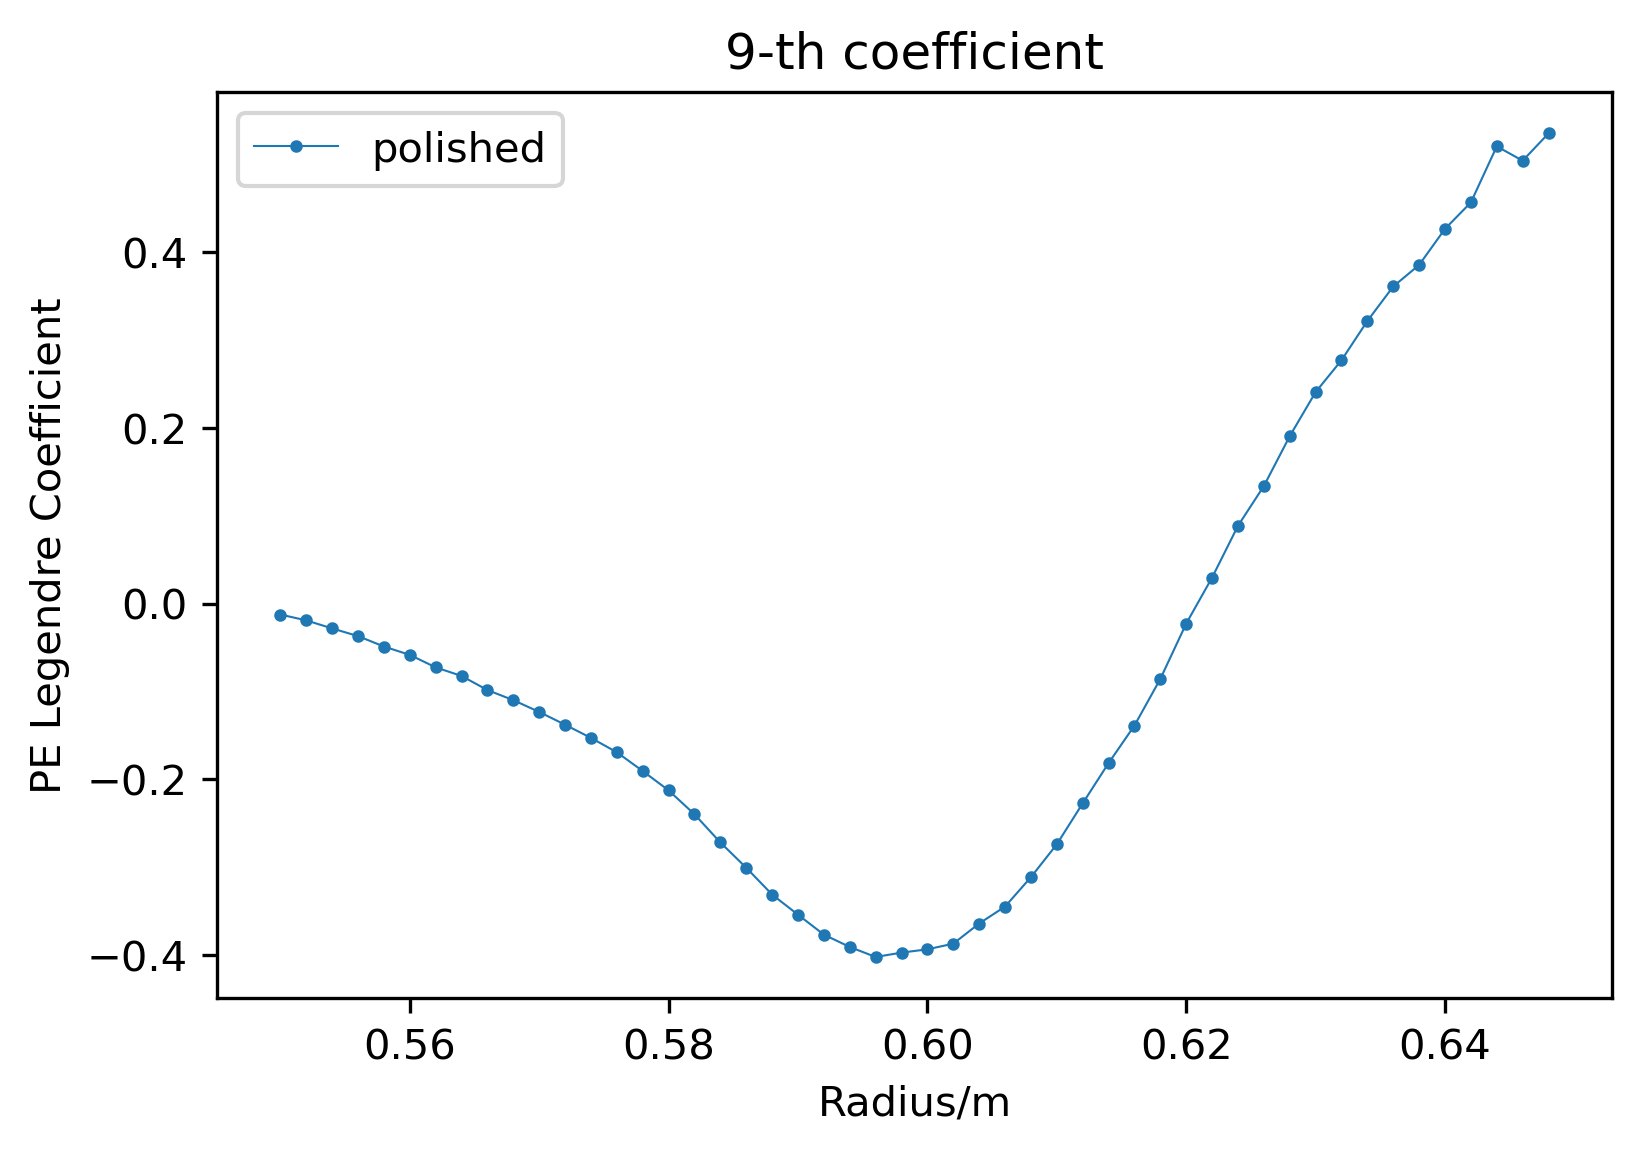

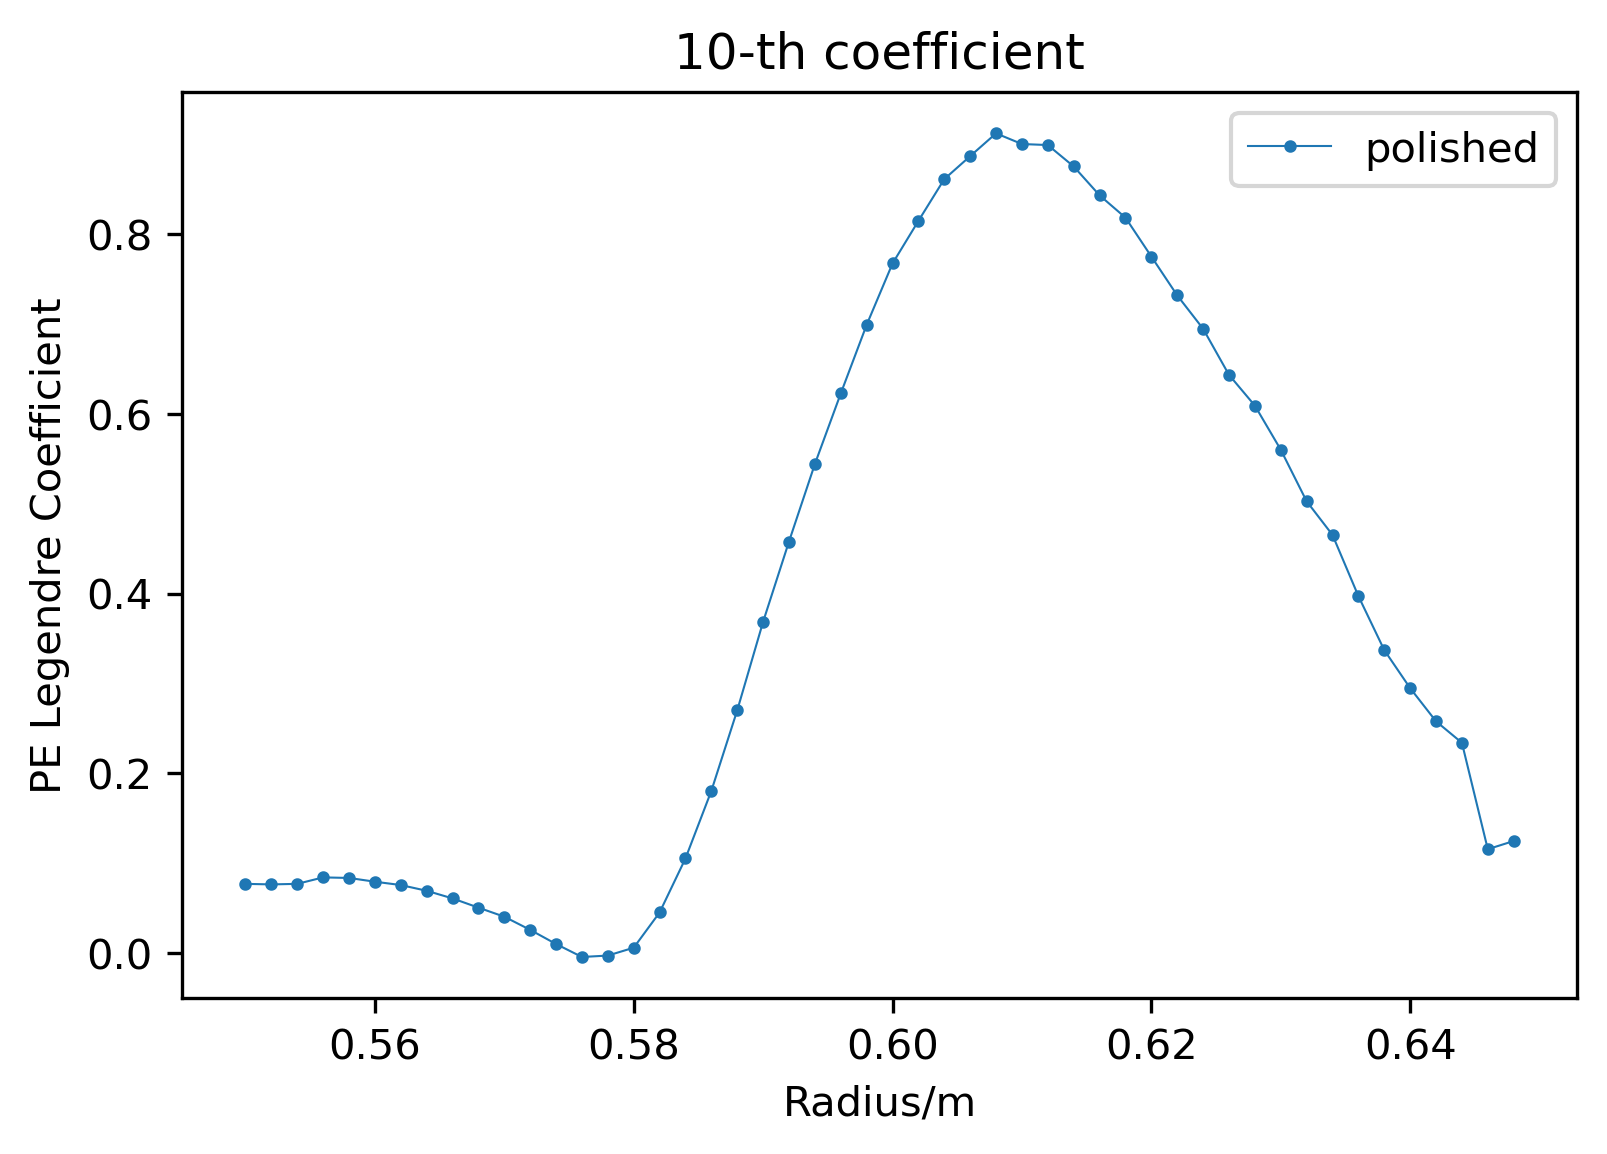

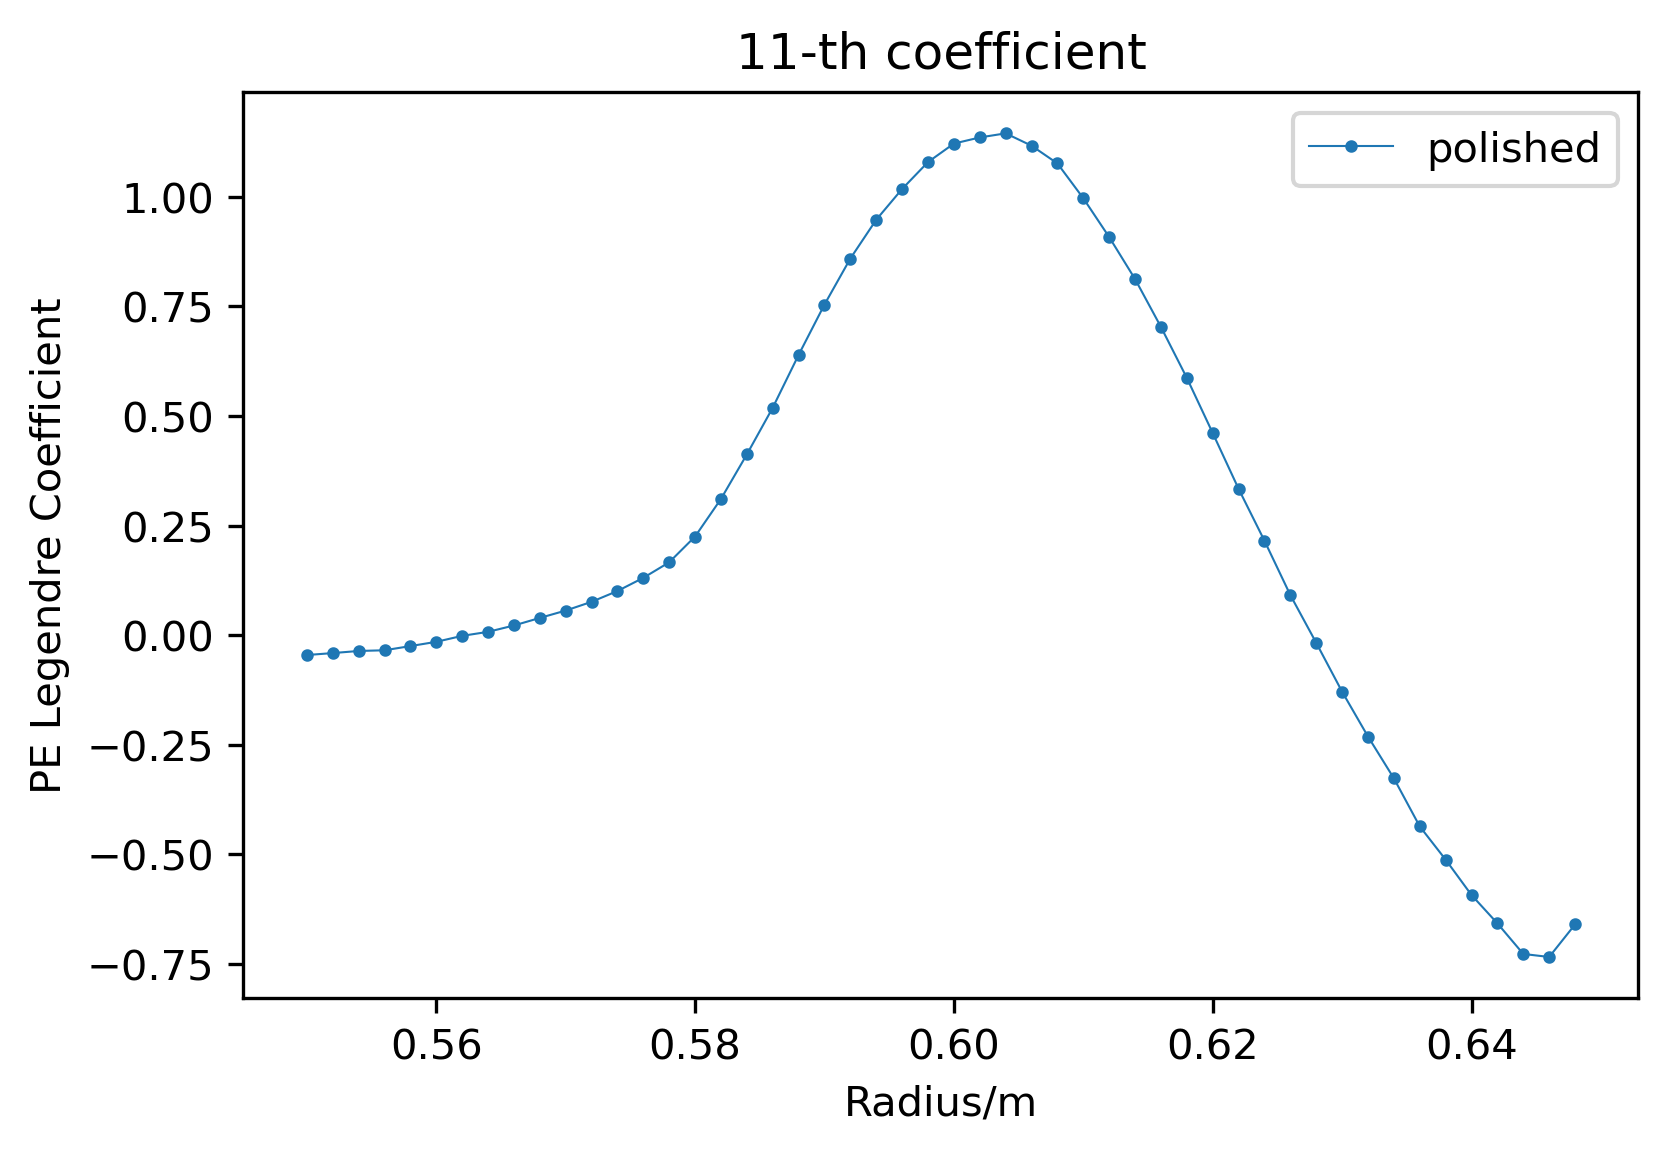

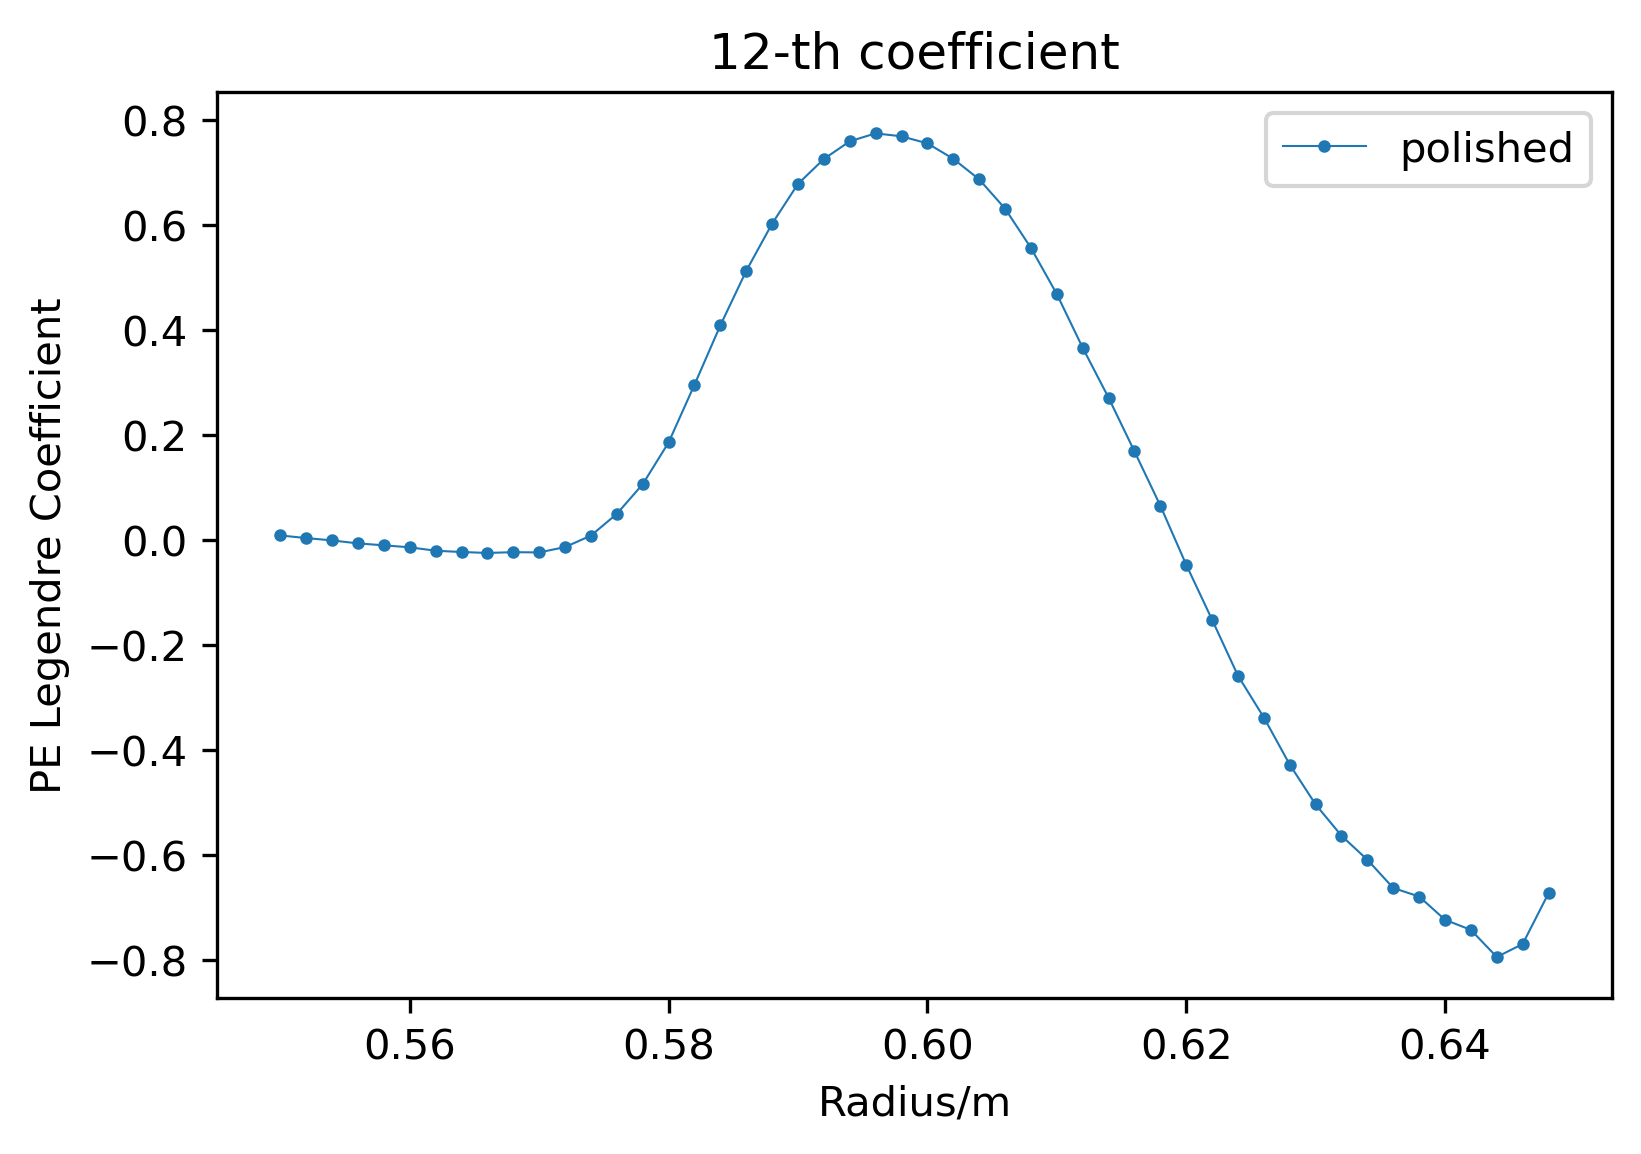

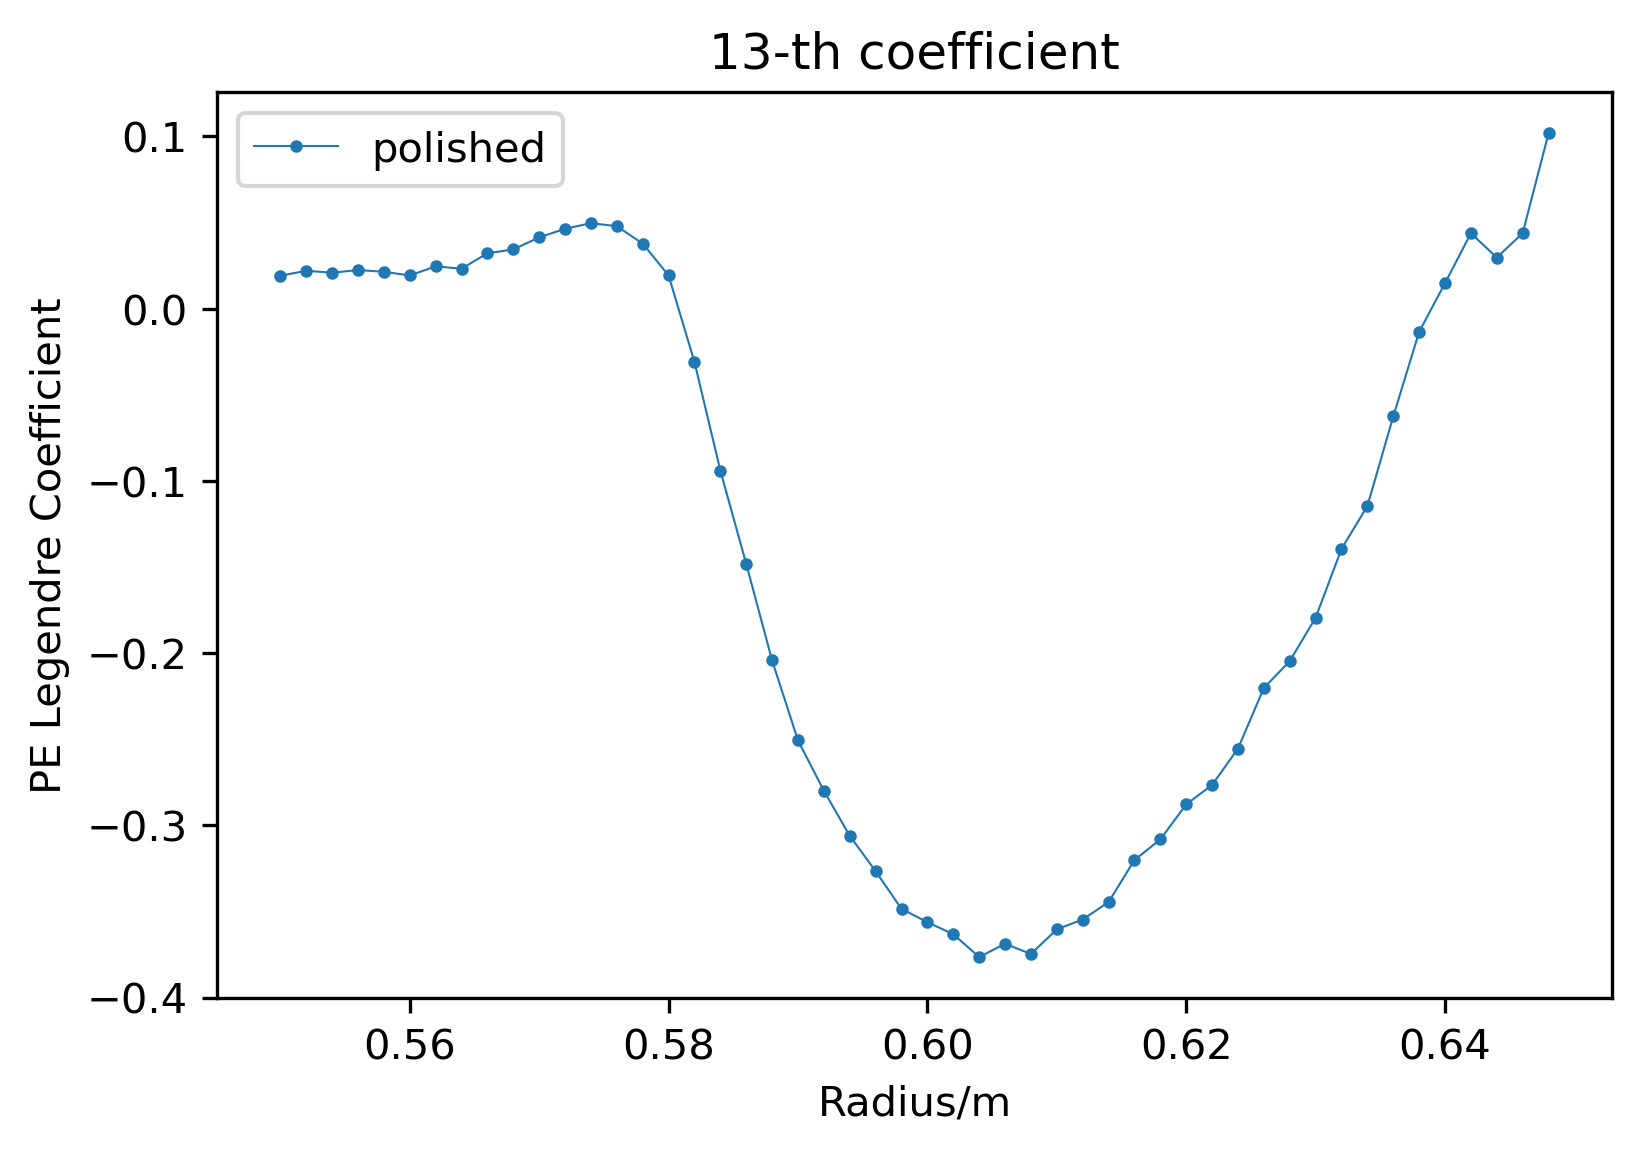

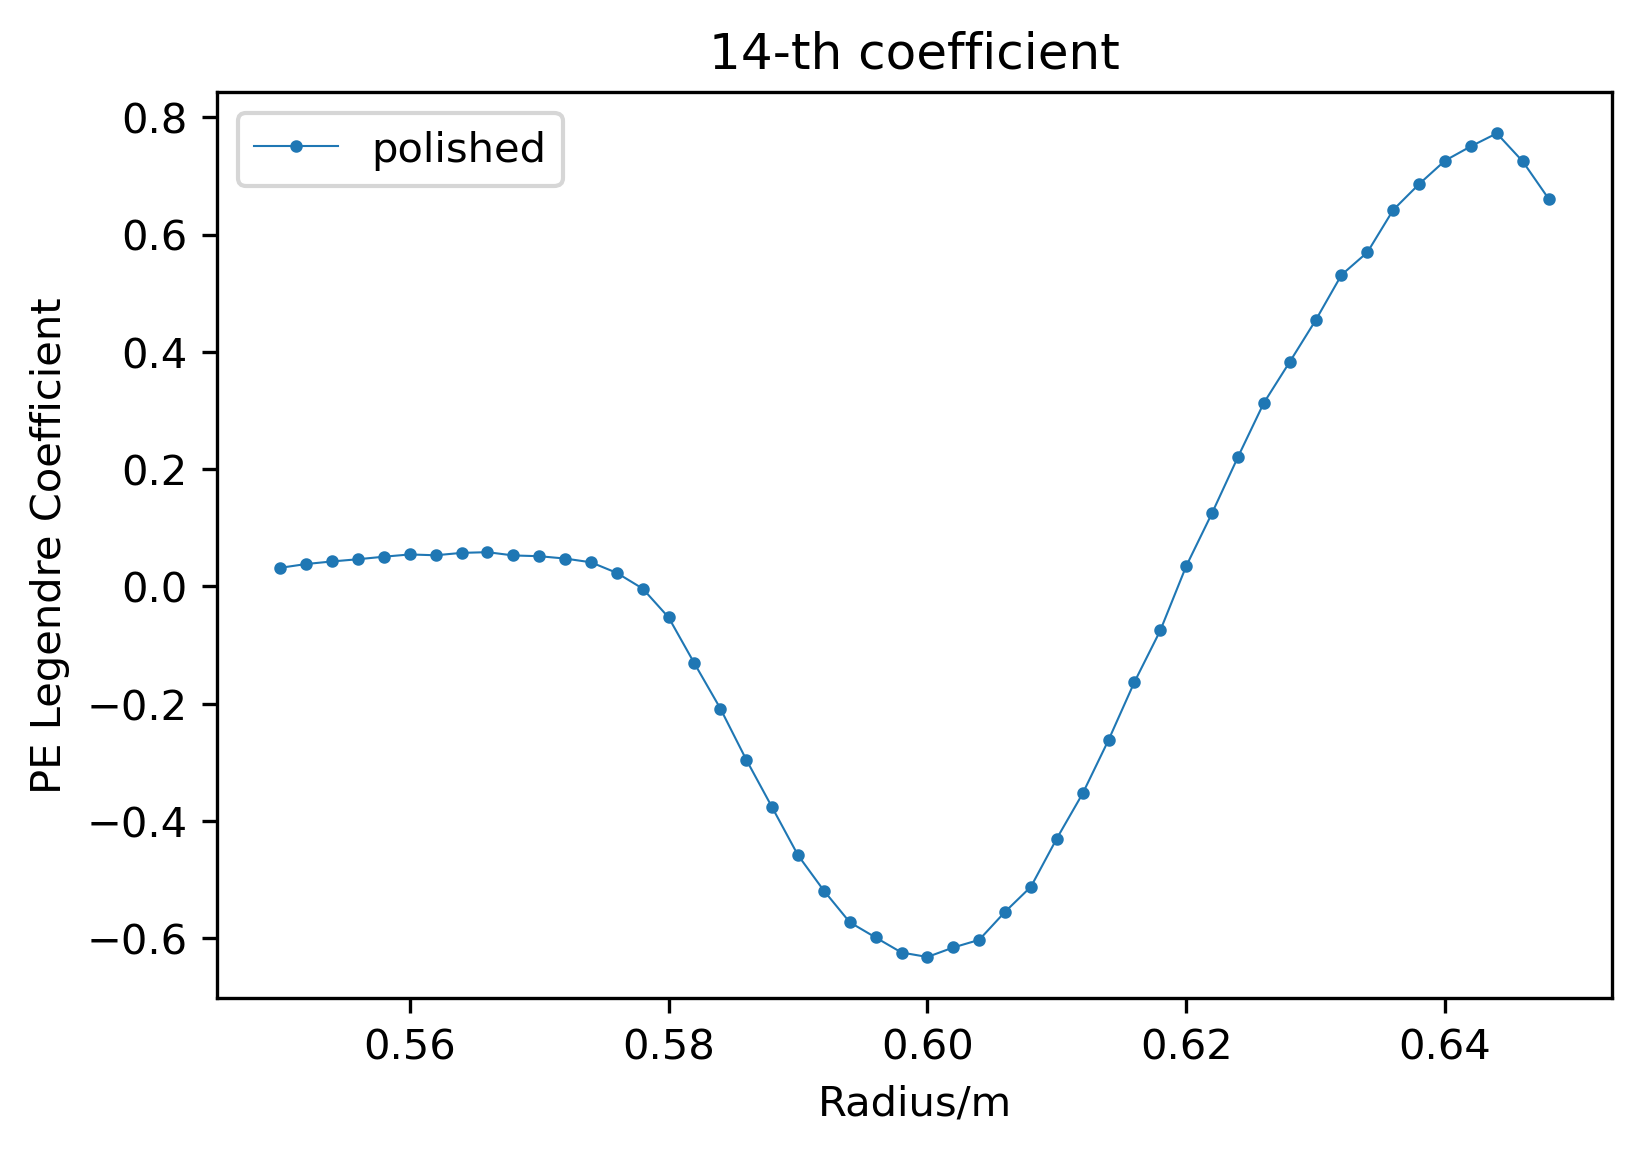

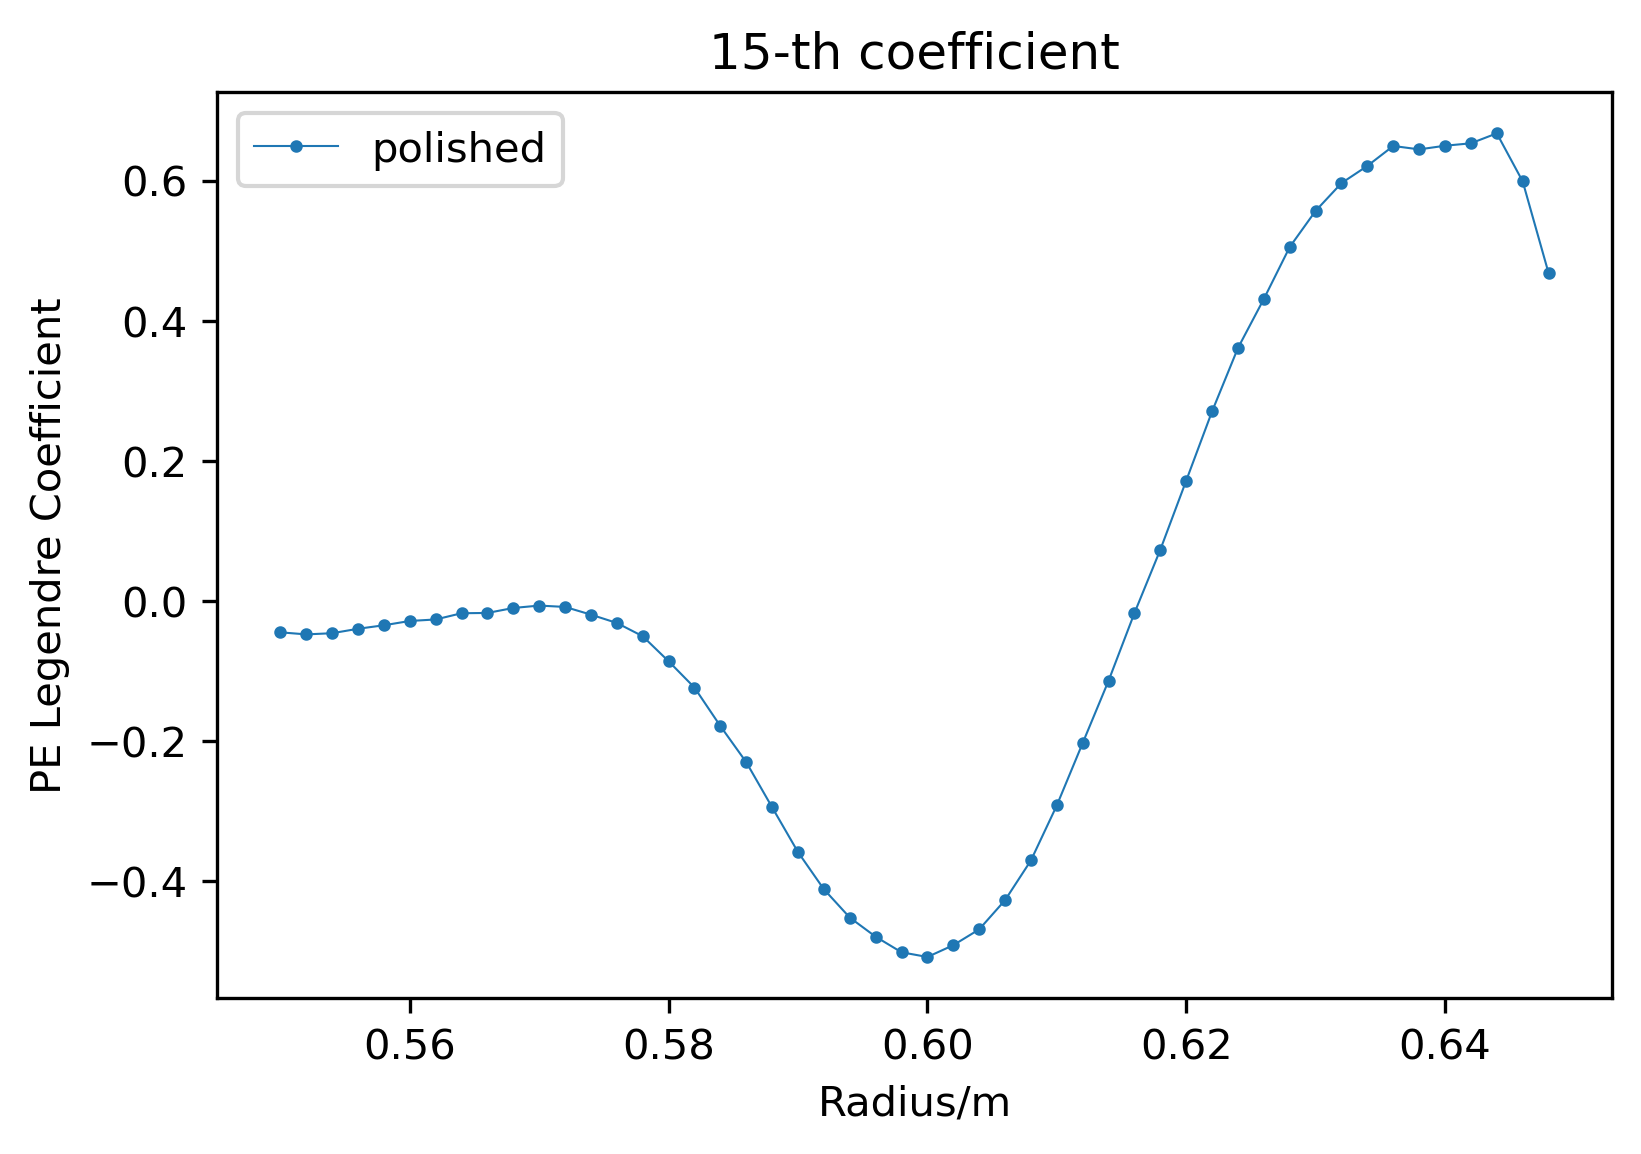

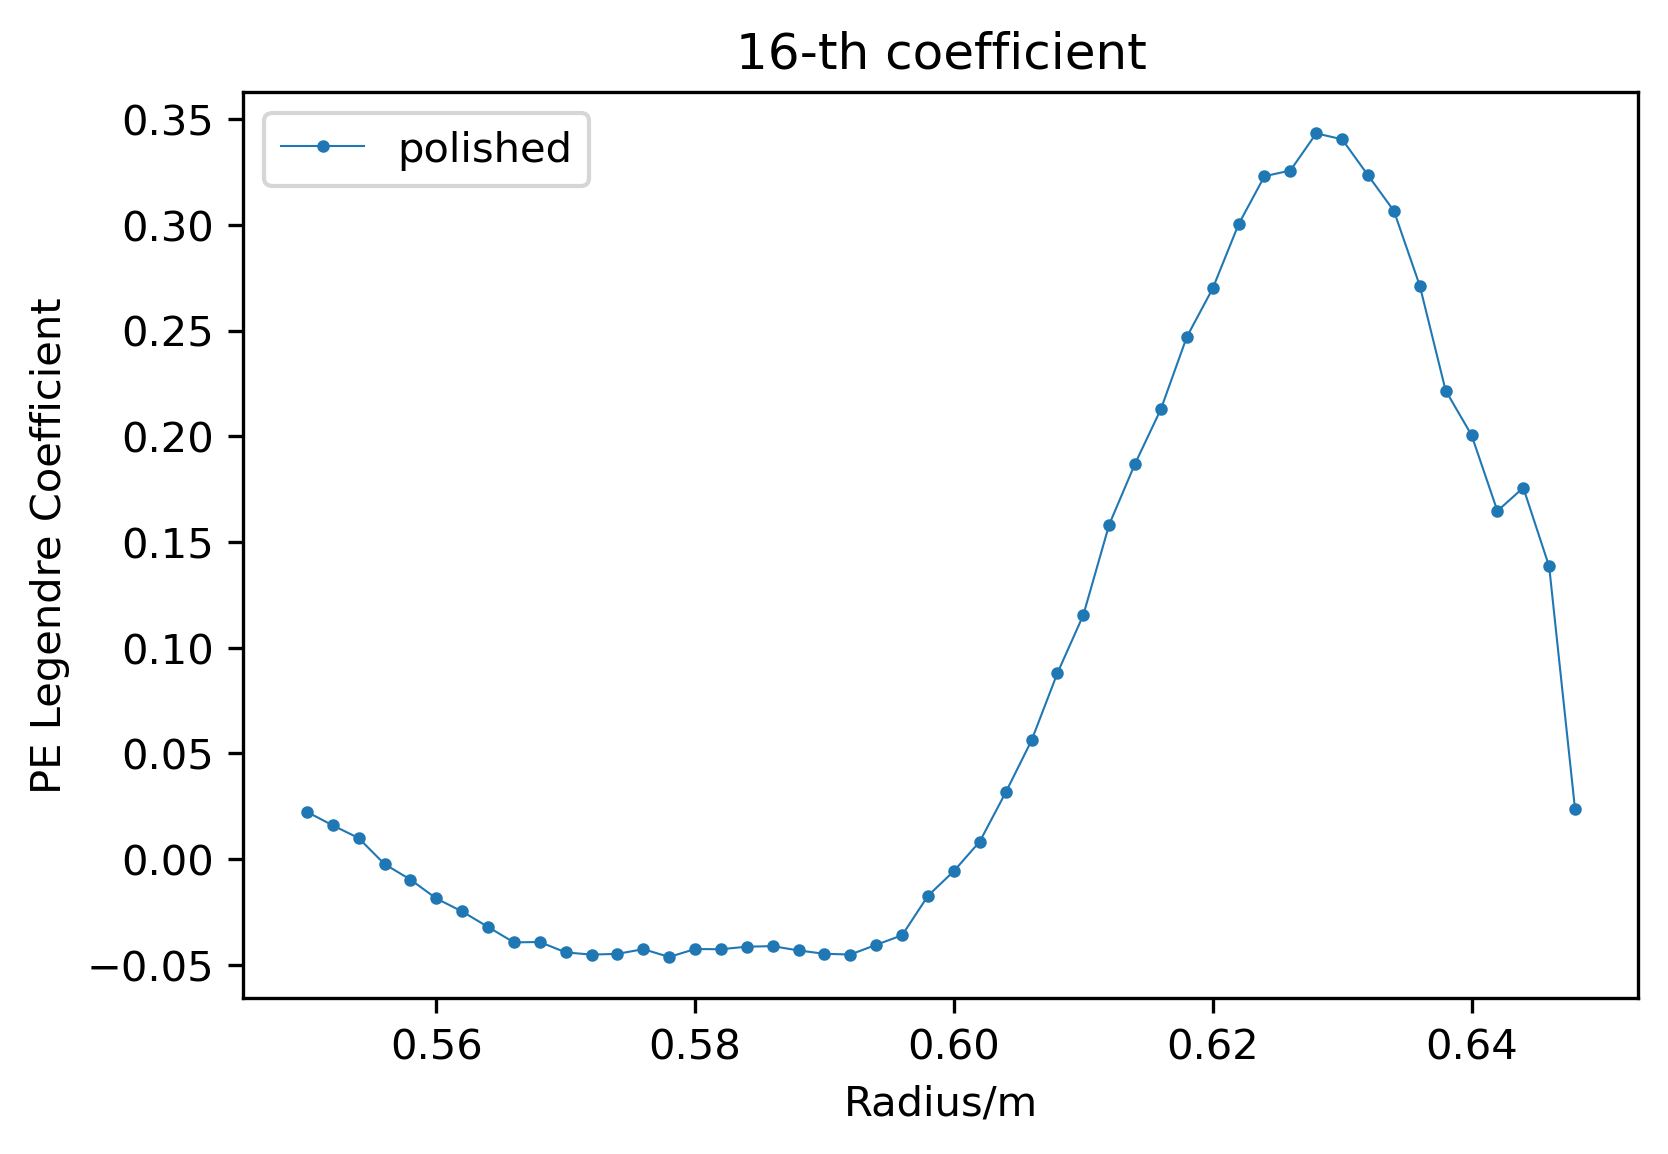

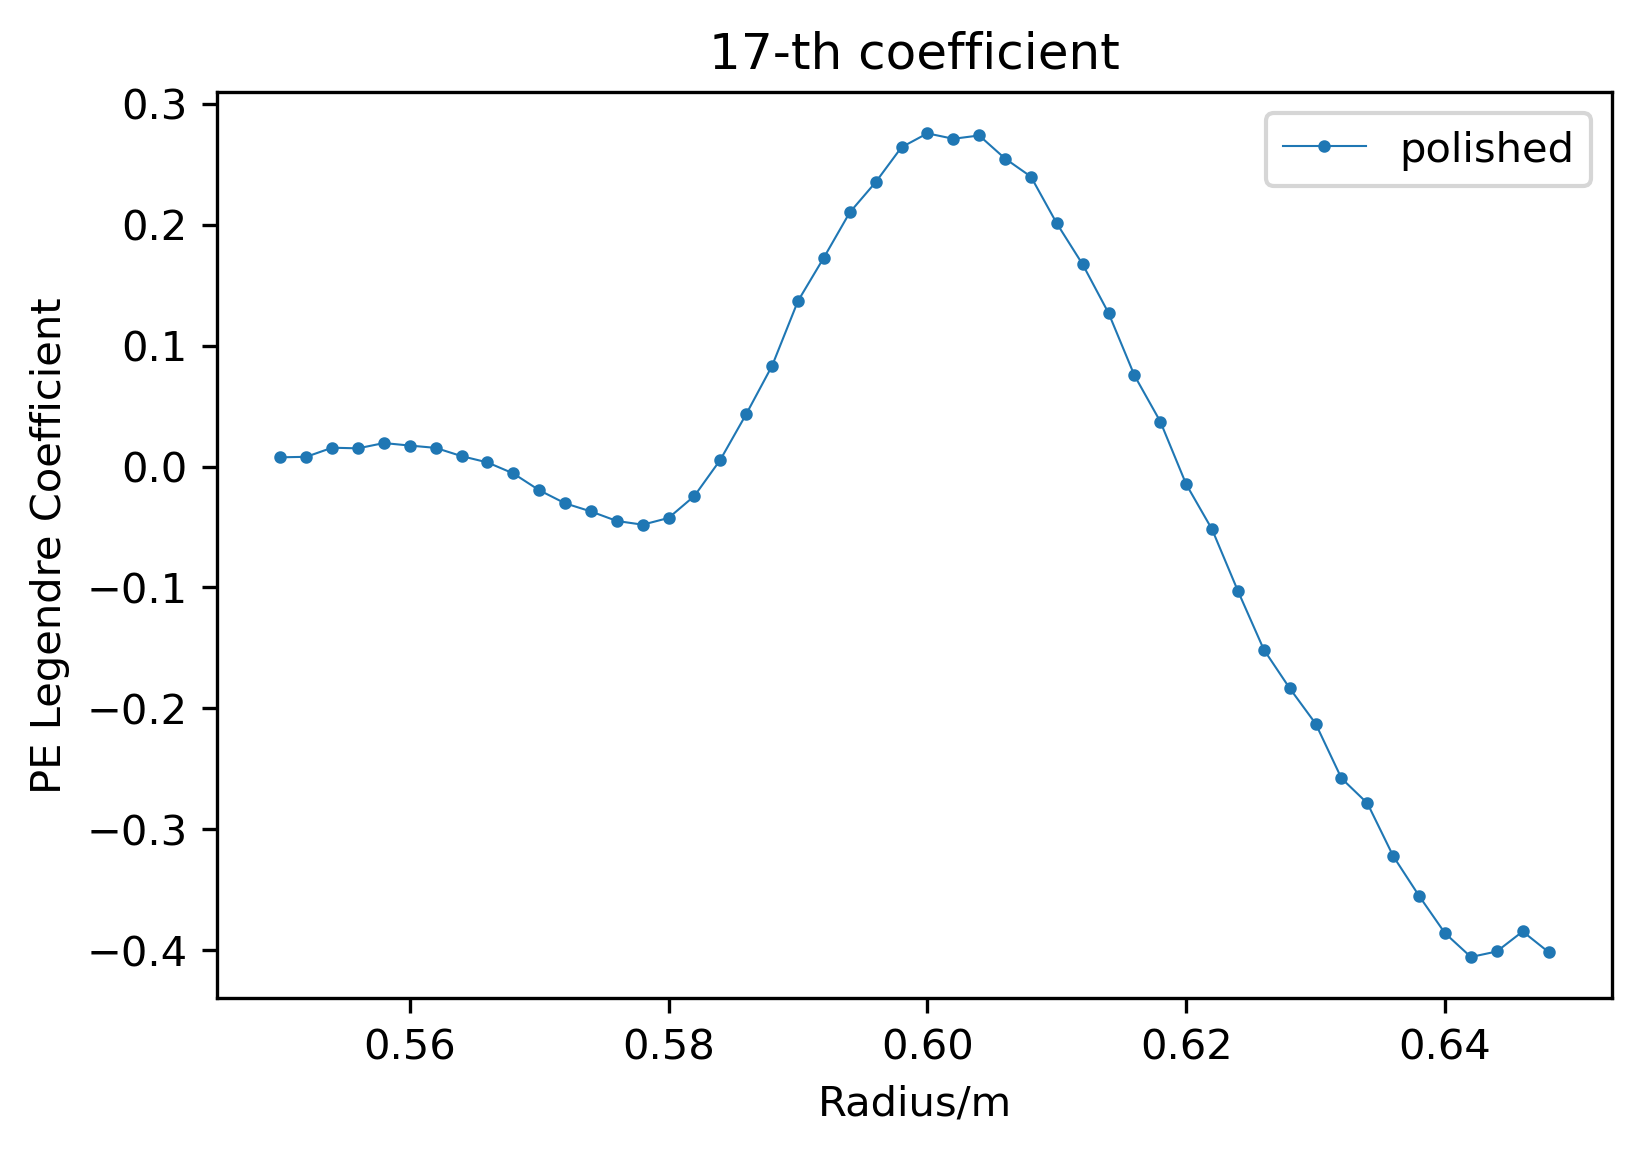

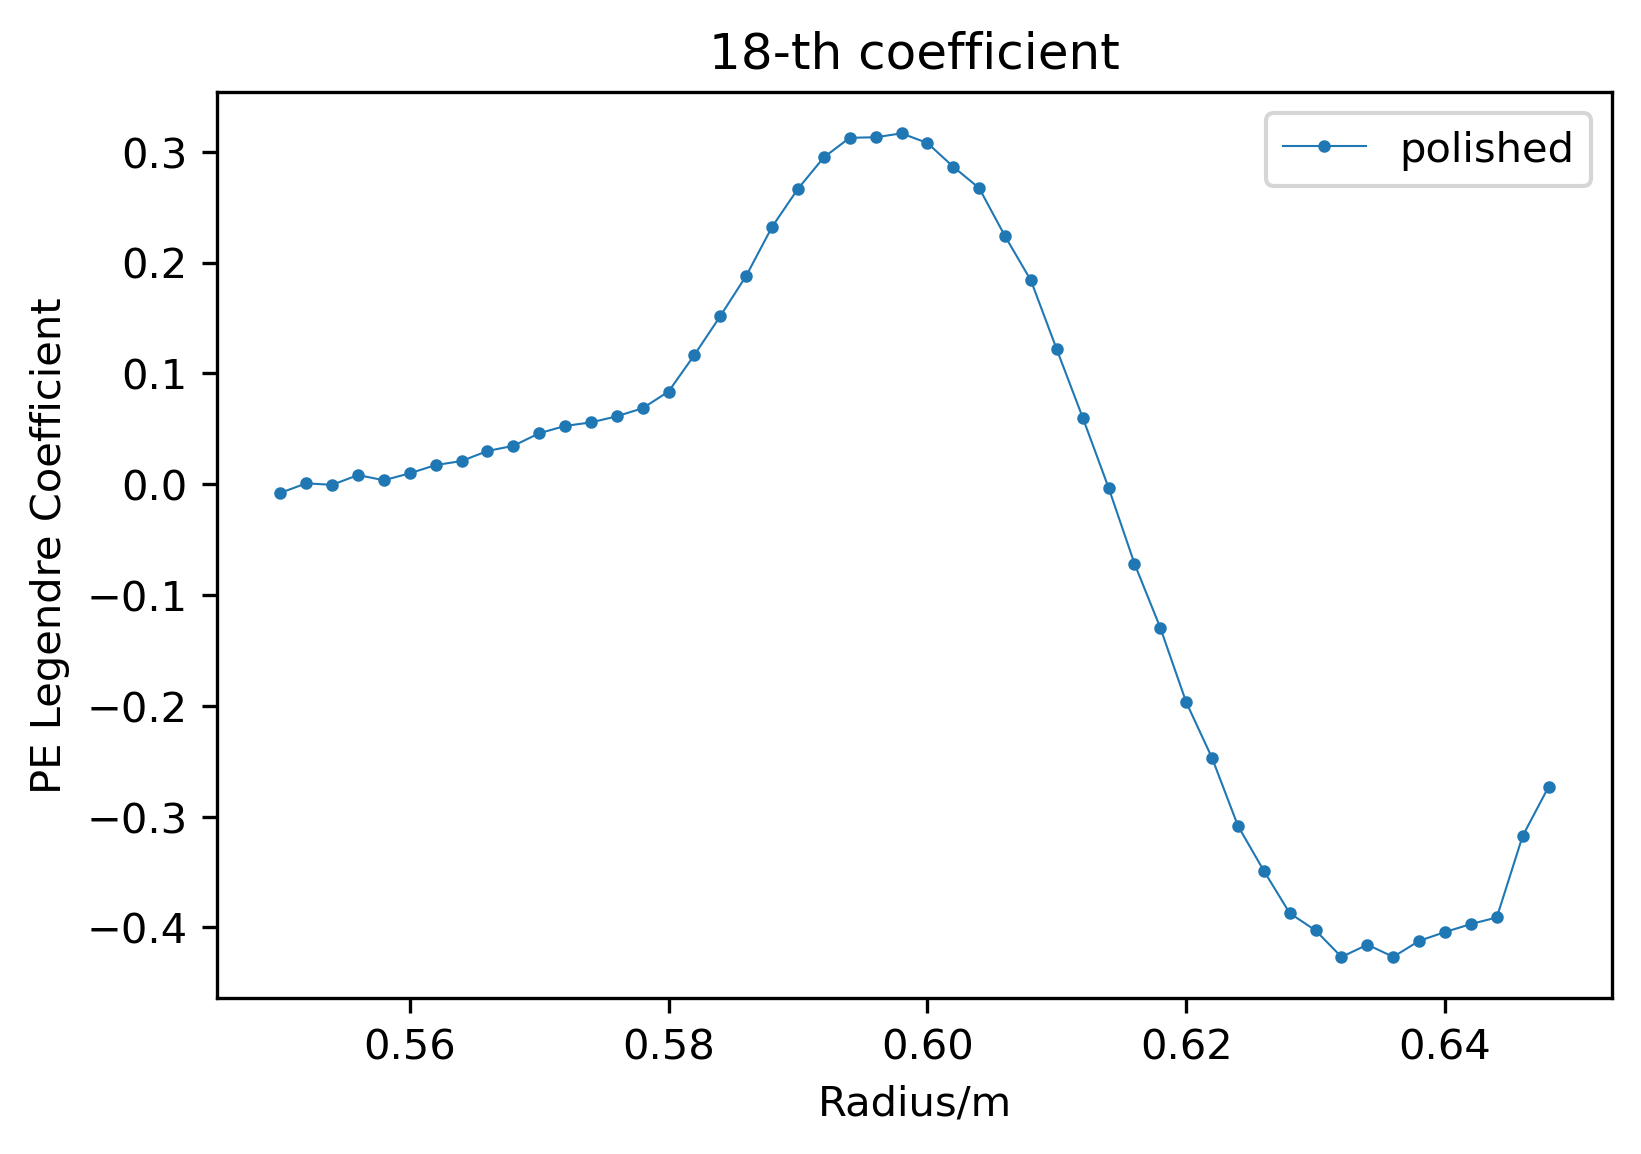

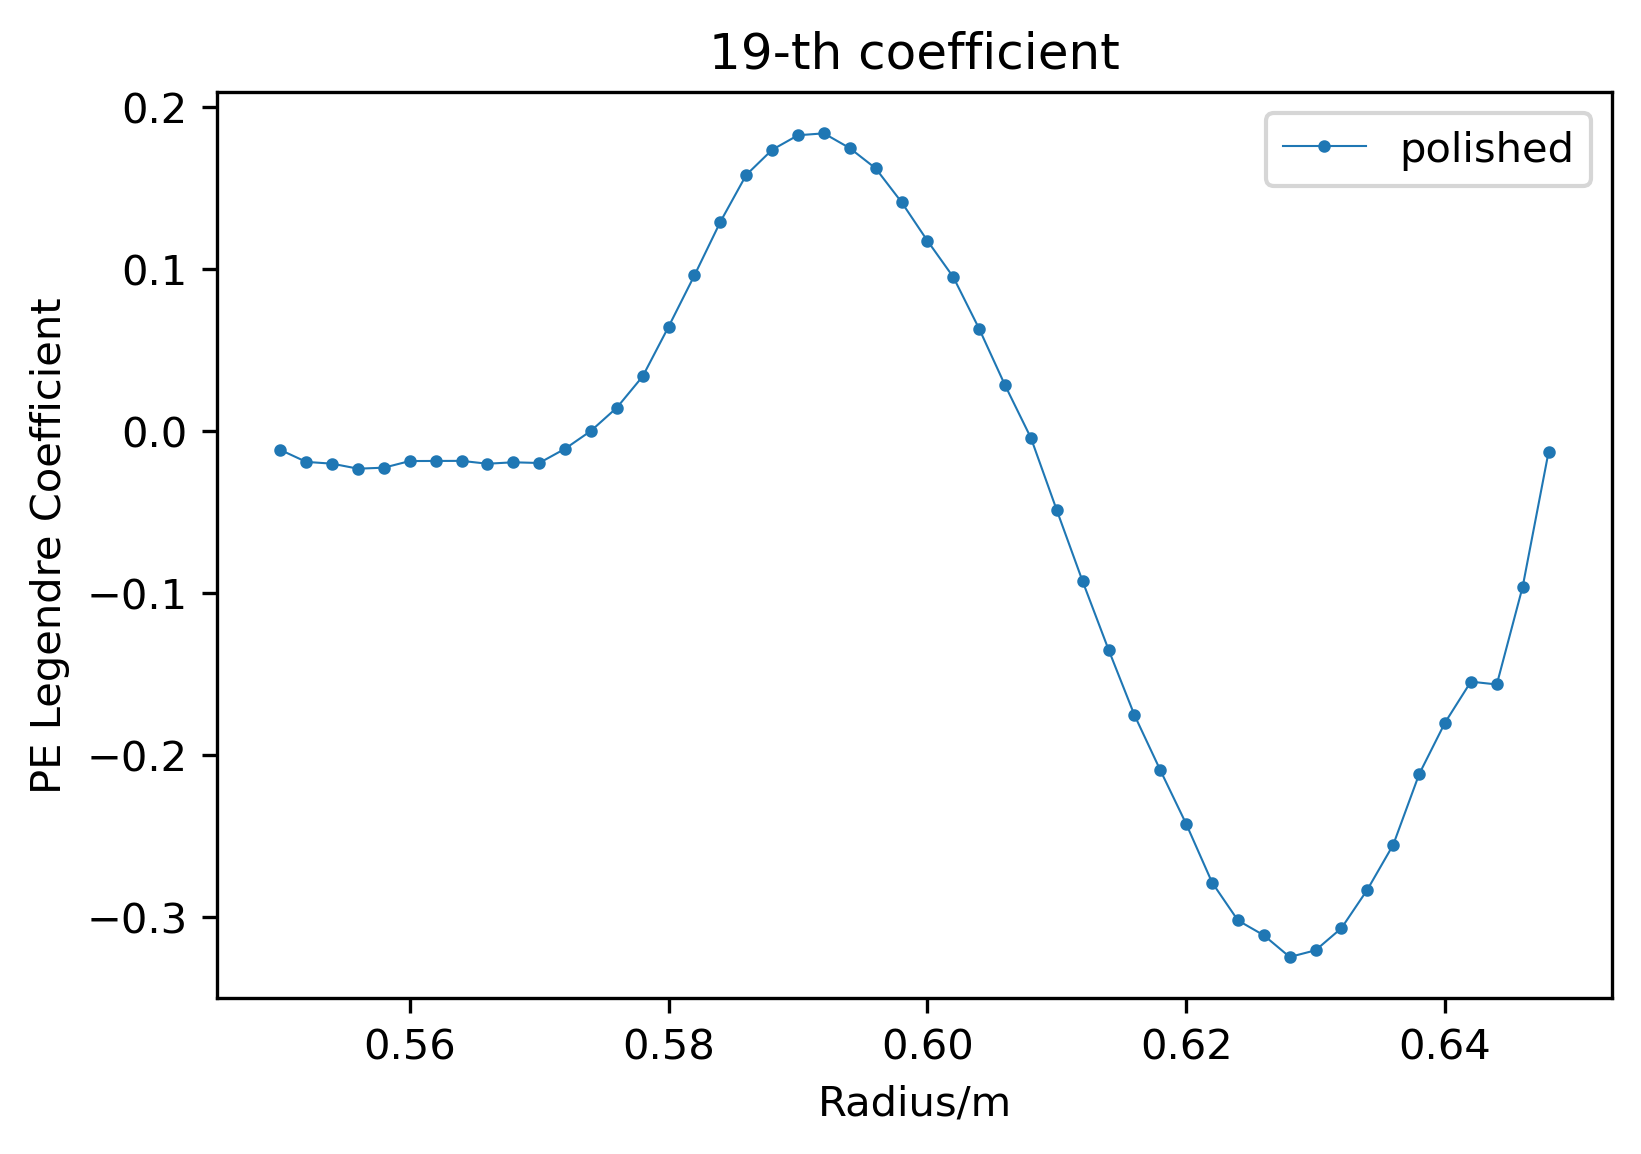

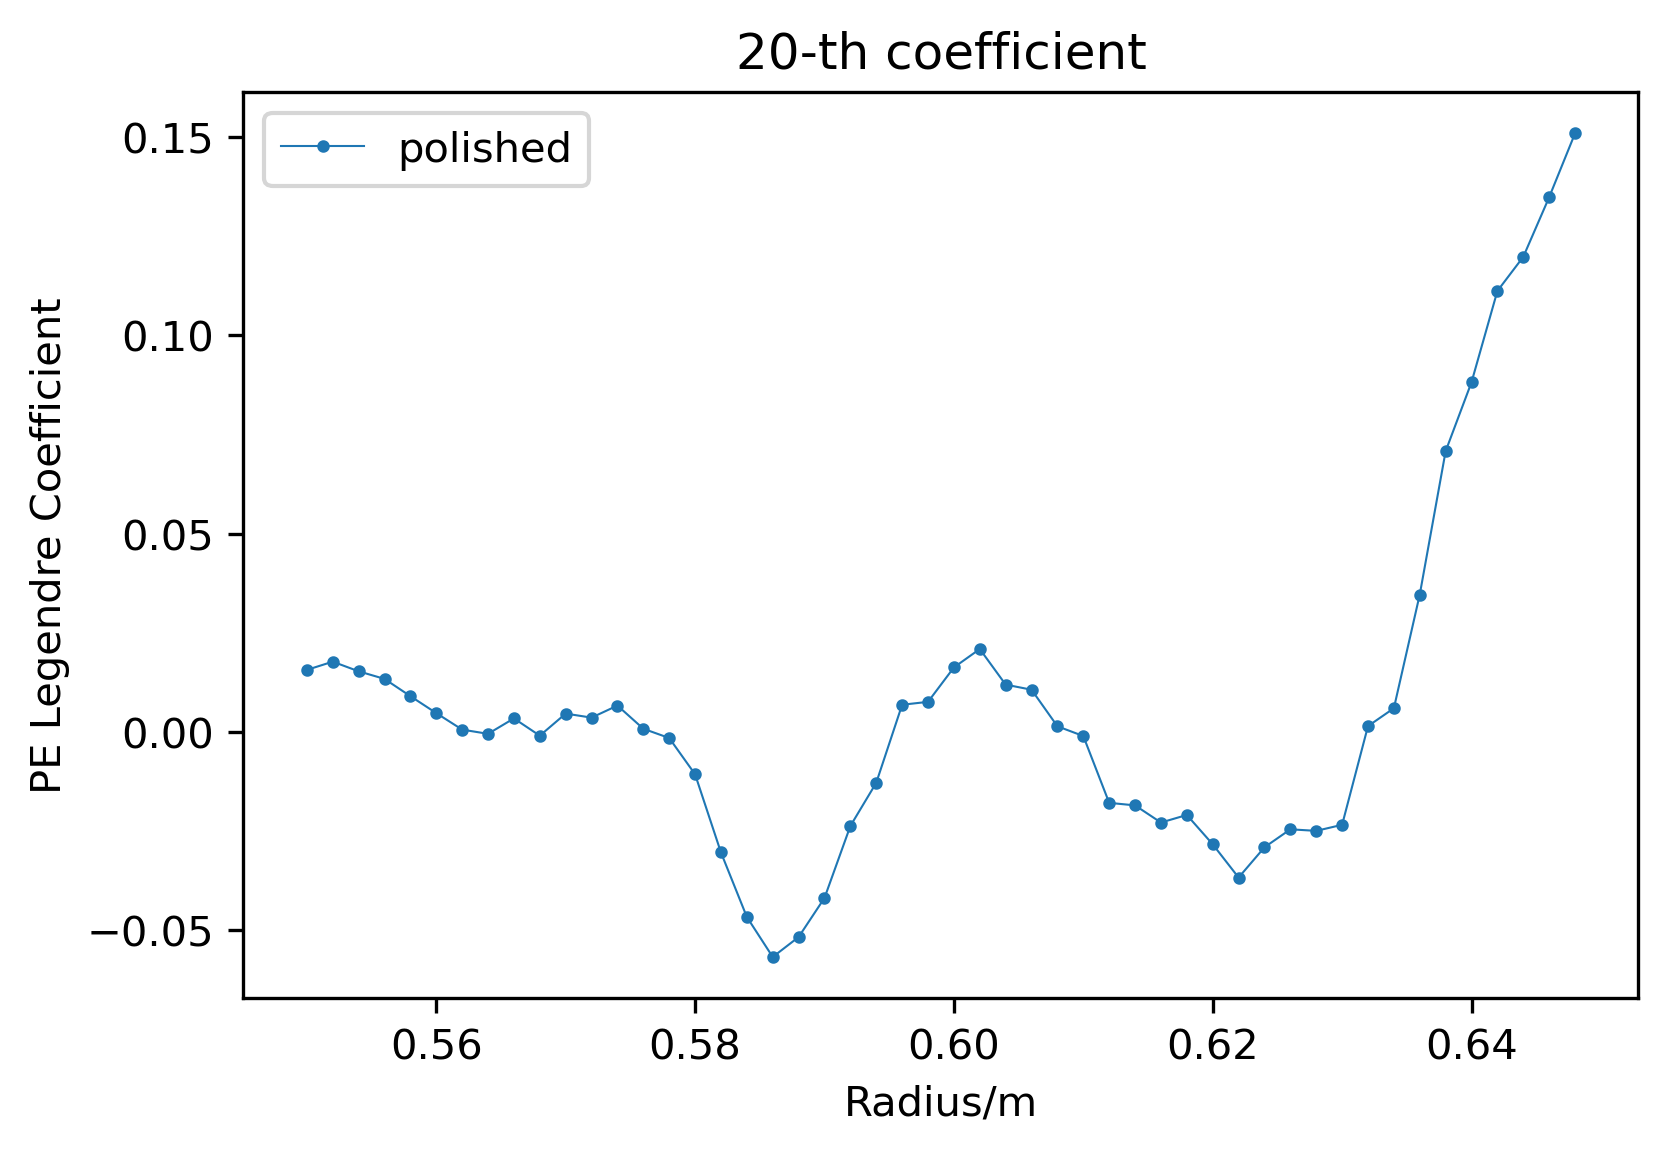

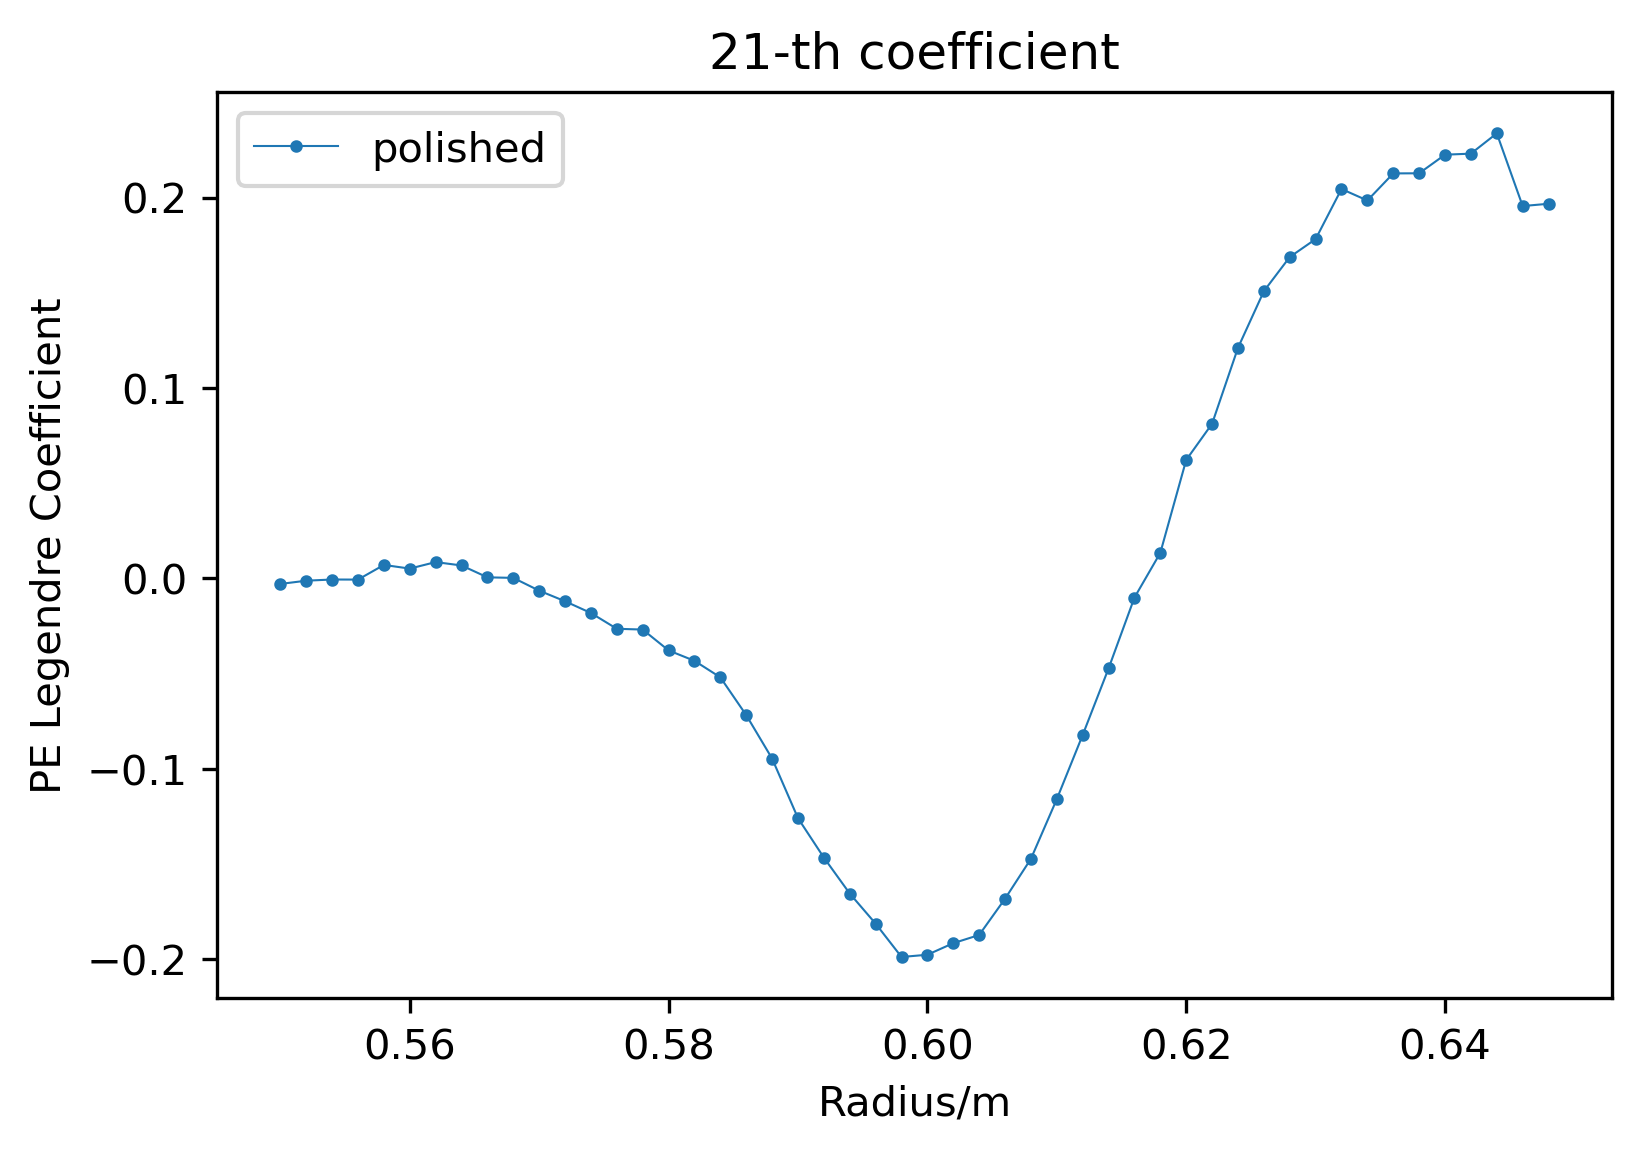

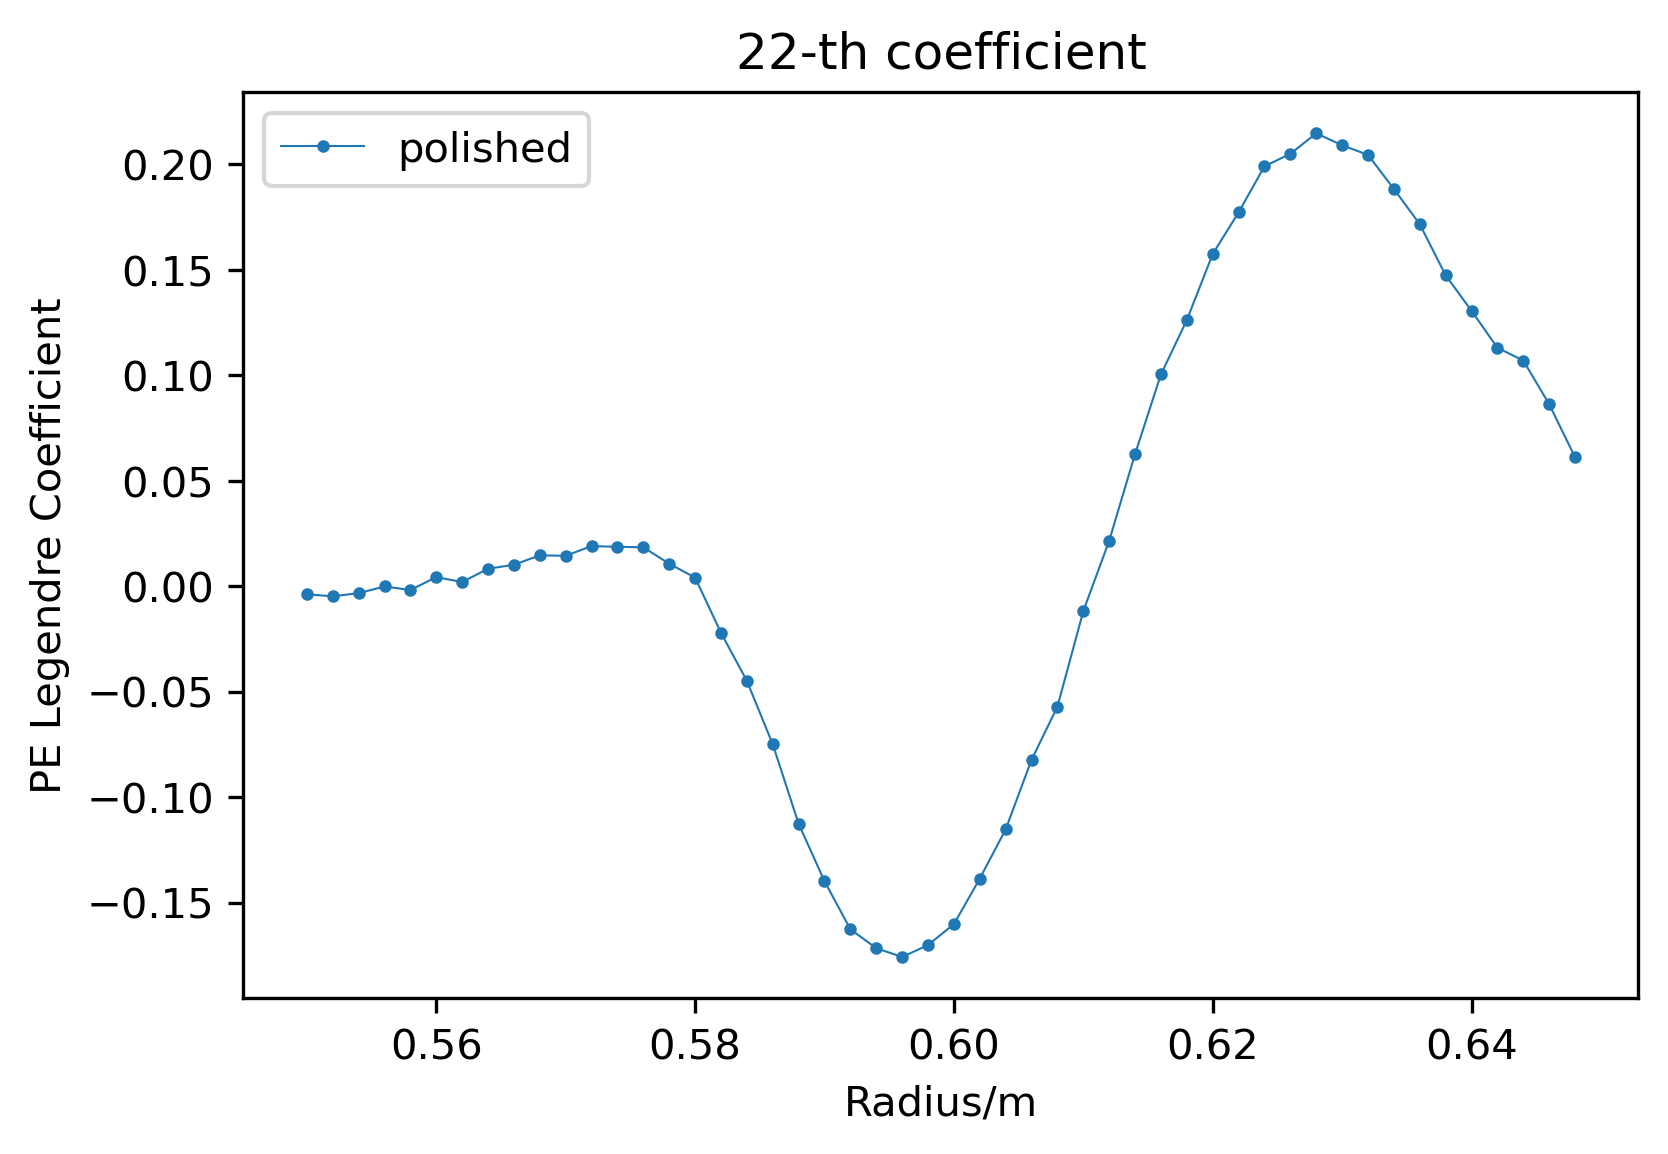

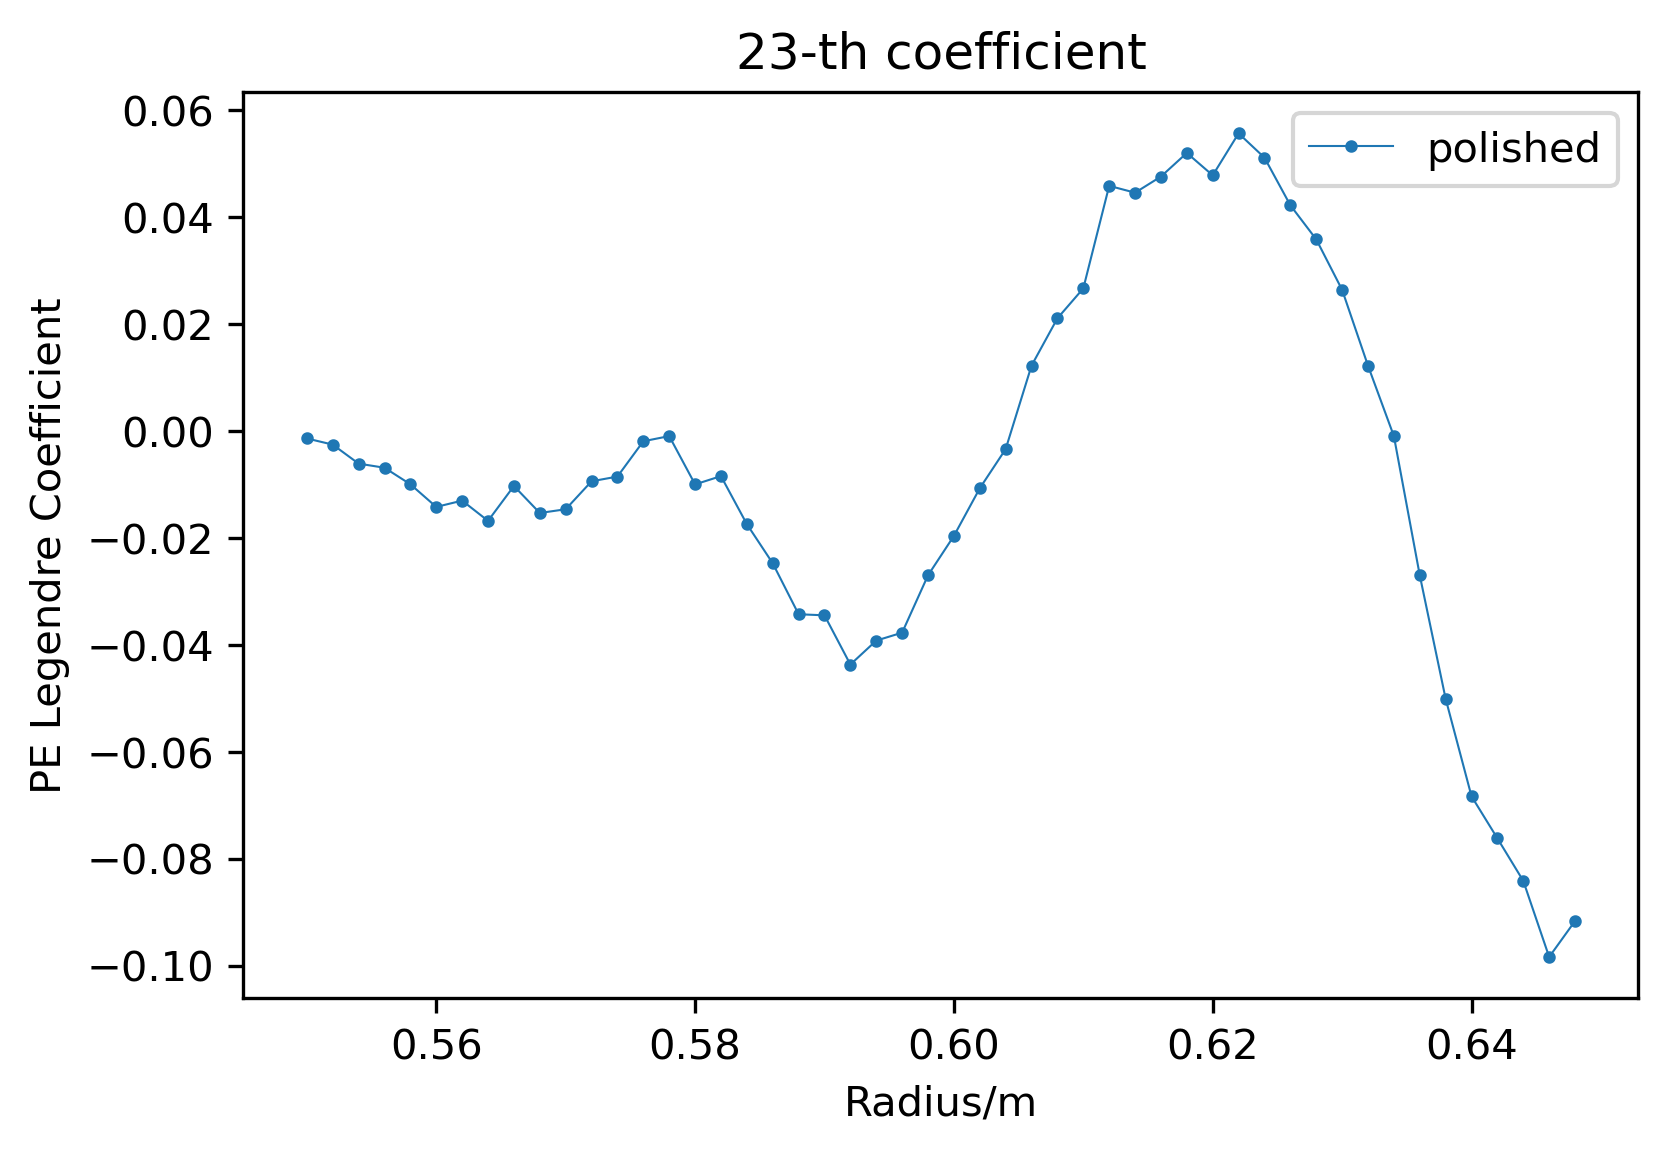

In [81]:
def LoadDataPE_TW(path, radius, order):
    data = []
    error = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    std = 'std' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    error = eval('np.array(h.root.'+ std + '[:])')
    h.close()
    return data, error

def main_photon(path, order):
    ra = np.arange(0.55, 0.65, 0.002)
    rd = []
    coeff_pe = []
    error_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff, error= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff))
        error_pe = np.hstack((error_pe, error))
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    error_pe = np.reshape(error_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe, error

order = 25
rd1, coeff_pe1, error_pe1 = main_photon('coeff_pe_1t_compact_30/',order)
for i in np.arange(order-1):
    if(i==0):
        plt.figure(num=i+1, dpi=300)
        plt.plot(rd1, coeff_pe1[i] - np.log(4) - np.log(20000/4285),'-o',linewidth=0.5, markersize=2, label='polished')
    else:
        plt.figure(num=i+1, dpi=300)
        plt.plot(rd1, coeff_pe1[i],'-o',linewidth=0.5, markersize=2, label='polished')

    plt.legend()
    plt.xlabel('Radius/m')
    plt.ylabel('PE Legendre Coefficient')
    plt.title('%d-th coefficient' % i)
    plt.savefig('Coeff%d.png' % i)
    plt.show()